# CA2 AgriData Assignment 2022/23 for sba22232

## Going to import the libaries I plan on using through my assignment first - 

In [93]:
import pandas as pd # for the Exploratory Data analysis
import numpy as np # for any numerical calculations that i will use
import seaborn as sns # for my visualisations of the data
import matplotlib.pyplot as plt # for my visualisations of the data
import missingno as msno 
import plotly.io as pio
import plotly.graph_objects as go
pio.renderers.default = 'browser'
import panel as pn
pn.extension('tabulator')
pn.extension(sizing_mode='stretch_width')
import holoviews as hv
import hvplot.pandas
import json
import plotly.express as px
from scipy import stats

## My Project Plan and Timeline

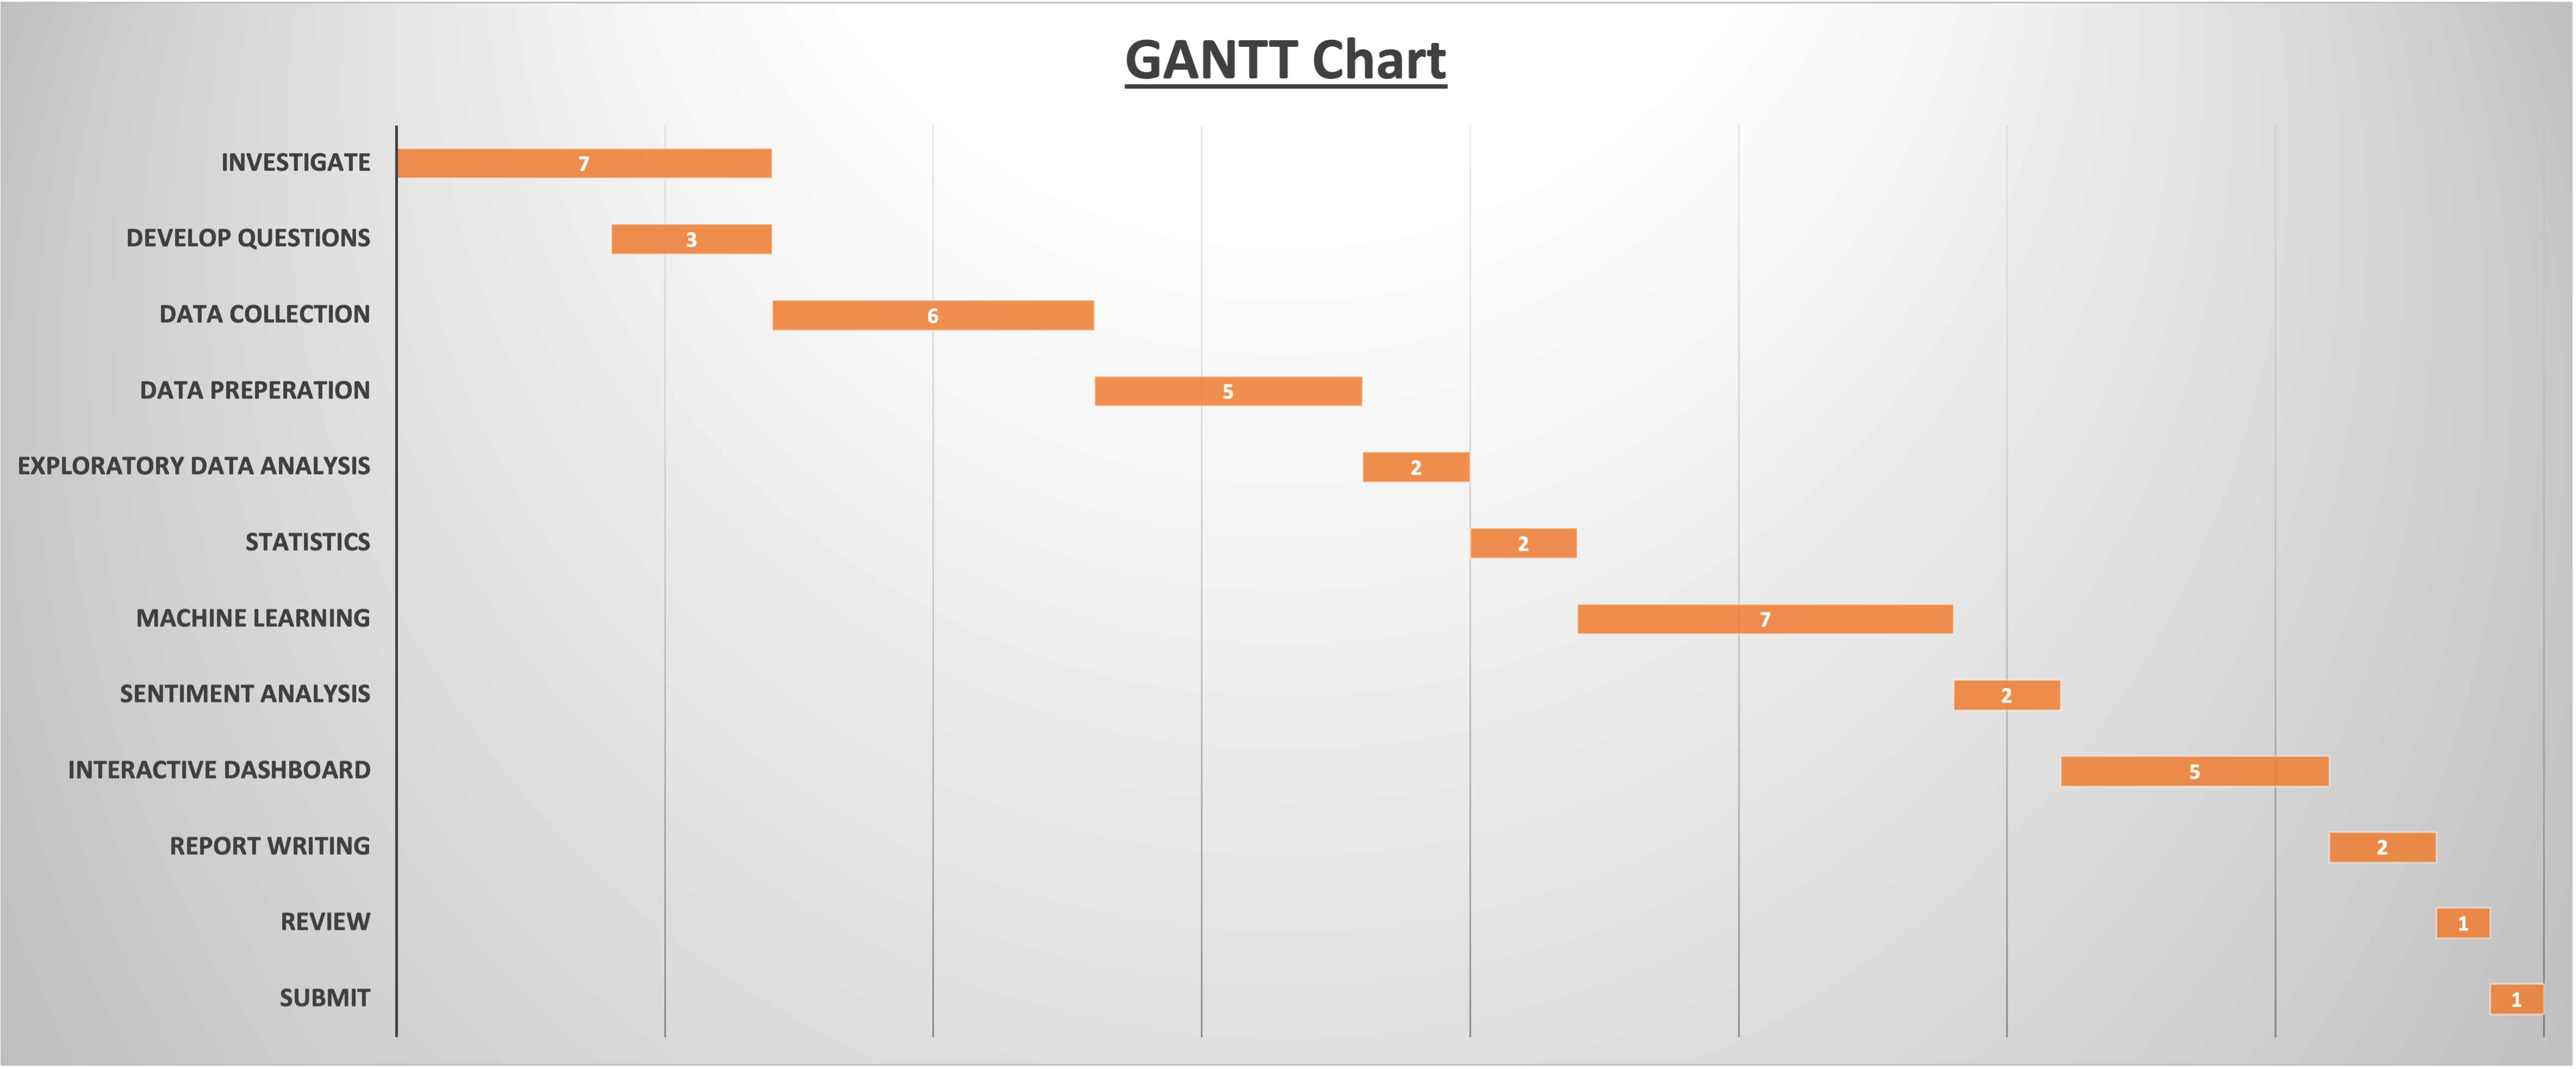

In [94]:
# Reads my GANTT Image into the notebook
from IPython.display import Image
Image(filename =r'GANTT.png', width = 900, height = 400)

## Reading Datasets and naming of the new Dataframes

In [95]:
# Reading first dataset into my initial Dataframe using pandas
# My first dataset is the Dairy production volume data for each country in the EU from 1961 to 2019 and my naming choice for this dataframe is based on Dairy Production so "dprod"
dprod = pd.read_csv('FAOSTAT_data_en_12-17-2022.csv');

# My second dataset is the Dairy import, export and Value data for each country in the EU from 2010 to 2020
# As with above my naming choice for this dataframe is based on Dairy Import, Export and Value so "diev"
diev = pd.read_csv('FAOSTAT_data_en_12-17-2022-1.csv');

# 1.	Structural investigation

## Here I am going to focus on the data clean up and analysis of the two datasets, both will prepared in tandem.

## I use the .head() to review the first 5 columns of the dataset to get an understanding of columns and type of data included. I will also have a look at the different data types to ensure they are recorded correctly and give me chance to correct any incorrect types now.

## The .select_dtypes(exclude="number").head() and .describe(exclude="number") enables me to dive deeper into the different types of non numerical available in my datasets. I can see the most frequent entry and volumes of the categorical data. 

In [96]:
# Displays the first 5 rows of the dataset
dprod.head()

Domain Code                        Domain  Area Code (M49)     Area  \
0         QCL  Crops and livestock products                8  Albania   
1         QCL  Crops and livestock products                8  Albania   
2         QCL  Crops and livestock products                8  Albania   
3         QCL  Crops and livestock products                8  Albania   
4         QCL  Crops and livestock products                8  Albania   

   Element Code     Element  Item Code (CPC)                Item  Year Code  \
0          5510  Production         22241.01  Butter of cow milk       1961   
1          5510  Production         22241.01  Butter of cow milk       1962   
2          5510  Production         22241.01  Butter of cow milk       1963   
3          5510  Production         22241.01  Butter of cow milk       1964   
4          5510  Production         22241.01  Butter of cow milk       1965   

   Year    Unit   Value Flag Flag Description  
0  1961  tonnes   880.0    E  Estimated value  
1  1962  tonnes   900.0    E  Estimated value  
2  1963  tonnes   960.0    E  Estimated value  
3  1964  tonnes  1000.0    E  Estimated value  
4  1965  tonnes  1100.0    E  Estimated value

In [97]:
# Displays only non-numerical data for the first 5 rows of the dataset 
dprod.select_dtypes(exclude="number").head()

Domain Code                        Domain     Area     Element  \
0         QCL  Crops and livestock products  Albania  Production   
1         QCL  Crops and livestock products  Albania  Production   
2         QCL  Crops and livestock products  Albania  Production   
3         QCL  Crops and livestock products  Albania  Production   
4         QCL  Crops and livestock products  Albania  Production   

                 Item    Unit Flag Flag Description  
0  Butter of cow milk  tonnes    E  Estimated value  
1  Butter of cow milk  tonnes    E  Estimated value  
2  Butter of cow milk  tonnes    E  Estimated value  
3  Butter of cow milk  tonnes    E  Estimated value  
4  Butter of cow milk  tonnes    E  Estimated value

In [98]:
# Displays how many unique values for each non-numerical feature and the frequency of the most common value
dprod.describe(exclude="number")

Domain Code                        Domain    Area     Element  \
count        22847                         22847   22847       22847   
unique           1                             1      45           1   
top            QCL  Crops and livestock products  Europe  Production   
freq         22847                         22847    1325       22847   

                      Item    Unit   Flag Flag Description  
count                22847   22847  22847            22847  
unique                  23       1      5                5  
top     Butter of cow milk  tonnes      A  Official figure  
freq                  1862   22847   8880             8880

In [99]:
# Displays the first 5 rows of the dataset
diev.head()

Domain Code                 Domain  Reporter Country Code (M49)  \
0          TM  Detailed trade matrix                            8   
1          TM  Detailed trade matrix                            8   
2          TM  Detailed trade matrix                            8   
3          TM  Detailed trade matrix                            8   
4          TM  Detailed trade matrix                            8   

  Reporter Countries  Partner Country Code (M49) Partner Countries  \
0            Albania                          40           Austria   
1            Albania                          40           Austria   
2            Albania                          40           Austria   
3            Albania                          40           Austria   
4            Albania                          40           Austria   

   Element Code          Element  Item Code (FAO)  \
0          5610  Import Quantity              886   
1          5610  Import Quantity              886   
2          5622     Import Value              886   
3          5622     Import Value              886   
4          5610  Import Quantity              893   

                                     Item  Year Code  Year      Unit  Value  \
0                      Butter of cow milk       2012  2012    tonnes    2.0   
1                      Butter of cow milk       2013  2013    tonnes    2.0   
2                      Butter of cow milk       2012  2012  1000 US$    6.0   
3                      Butter of cow milk       2013  2013  1000 US$    9.0   
4  Buttermilk, curdled and acidified milk       2010  2010    tonnes    0.0   

  Flag Flag Description  
0    A  Official figure  
1    A  Official figure  
2    A  Official figure  
3    A  Official figure  
4    A  Official figure

In [100]:
# Displays only non-numerical data for the first 5 rows of the dataset 
diev.select_dtypes(exclude="number").head()

Domain Code                 Domain Reporter Countries Partner Countries  \
0          TM  Detailed trade matrix            Albania           Austria   
1          TM  Detailed trade matrix            Albania           Austria   
2          TM  Detailed trade matrix            Albania           Austria   
3          TM  Detailed trade matrix            Albania           Austria   
4          TM  Detailed trade matrix            Albania           Austria   

           Element                                    Item      Unit Flag  \
0  Import Quantity                      Butter of cow milk    tonnes    A   
1  Import Quantity                      Butter of cow milk    tonnes    A   
2     Import Value                      Butter of cow milk  1000 US$    A   
3     Import Value                      Butter of cow milk  1000 US$    A   
4  Import Quantity  Buttermilk, curdled and acidified milk    tonnes    A   

  Flag Description  
0  Official figure  
1  Official figure  
2  Official figure  
3  Official figure  
4  Official figure

In [101]:
# Displays how many unique values for each non-numerical feature and the frequency of the most common value
diev.describe(exclude="number")

Domain Code                 Domain Reporter Countries  \
count       232646                 232646             232646   
unique           1                      1                 40   
top             TM  Detailed trade matrix            Germany   
freq        232646                 232646              13922   

       Partner Countries          Element                        Item    Unit  \
count             232646           232646                      232646  232646   
unique                27                4                          18       2   
top              Germany  Import Quantity  Cheese from whole cow milk  tonnes   
freq               17910            59412                       29640  116323   

          Flag Flag Description  
count   232646           232646  
unique       4                4  
top          A  Official figure  
freq    231402           231402

### After having reviewed the non numerical features, I want to take a look at what numerical data I have and whether it is binary or ordinal or continous 

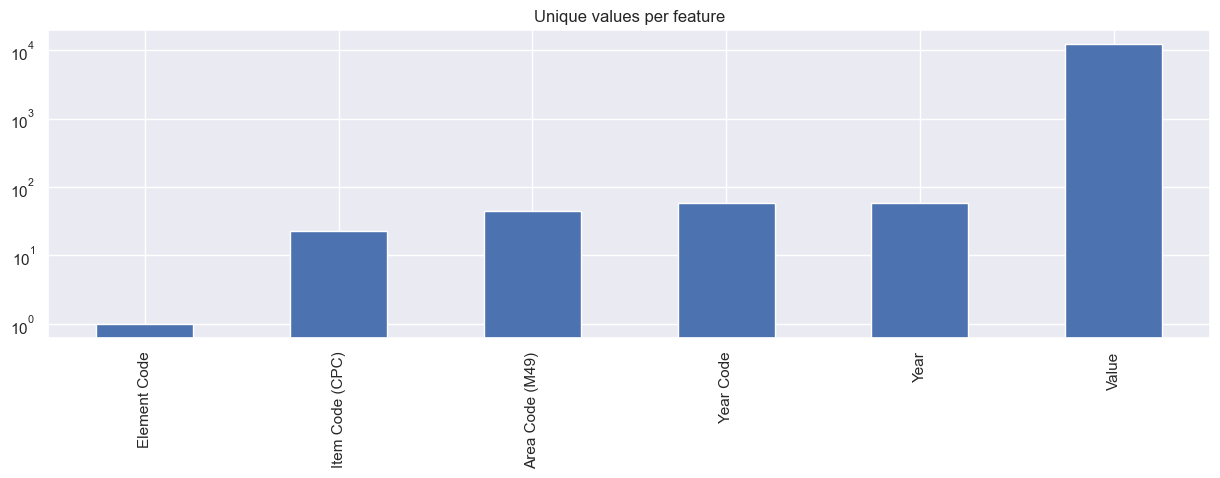

In [102]:
# For each numerical feature compute number of unique entries
unique_values = dprod.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");

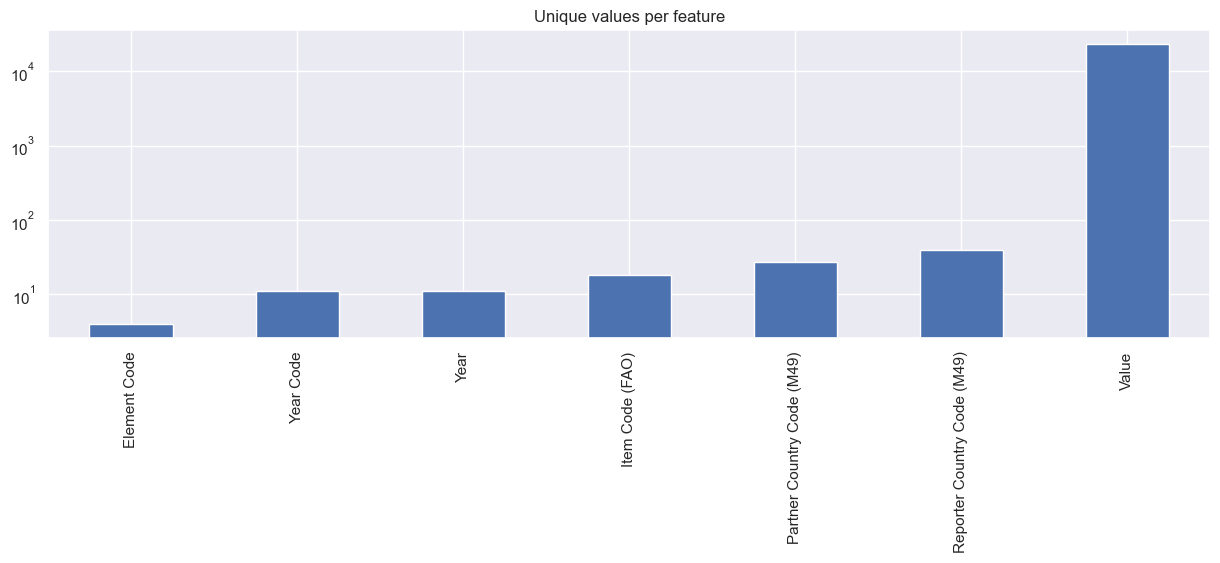

In [103]:
# For each numerical feature compute number of unique entries
unique_values = diev.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");

## Here I use .info() to give me similar insights to above for the data types for the columns in the dataset.

In [14]:
# Displays the column name, count and data type 
dprod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22847 entries, 0 to 22846
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       22847 non-null  object 
 1   Domain            22847 non-null  object 
 2   Area Code (M49)   22847 non-null  int64  
 3   Area              22847 non-null  object 
 4   Element Code      22847 non-null  int64  
 5   Element           22847 non-null  object 
 6   Item Code (CPC)   22847 non-null  float64
 7   Item              22847 non-null  object 
 8   Year Code         22847 non-null  int64  
 9   Year              22847 non-null  int64  
 10  Unit              22847 non-null  object 
 11  Value             21464 non-null  float64
 12  Flag              22847 non-null  object 
 13  Flag Description  22847 non-null  object 
dtypes: float64(2), int64(4), object(8)
memory usage: 2.4+ MB


In [15]:
# Displays the column name, count and data type 
diev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232646 entries, 0 to 232645
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Domain Code                  232646 non-null  object 
 1   Domain                       232646 non-null  object 
 2   Reporter Country Code (M49)  232646 non-null  int64  
 3   Reporter Countries           232646 non-null  object 
 4   Partner Country Code (M49)   232646 non-null  int64  
 5   Partner Countries            232646 non-null  object 
 6   Element Code                 232646 non-null  int64  
 7   Element                      232646 non-null  object 
 8   Item Code (FAO)              232646 non-null  int64  
 9   Item                         232646 non-null  object 
 10  Year Code                    232646 non-null  int64  
 11  Year                         232646 non-null  int64  
 12  Unit                         232646 non-null  object 
 13 

## Here I use .shape() to show me the number of rows and columns in both datasets.

In [16]:
# Displays the number or rows and columns in the dataset
dprod.shape

(22847, 14)

In [17]:
# Displays the number or rows and columns in the dataset
diev.shape

(232646, 16)

## Here I use .columns to show me the headings of columns in both datasets.
This allows me to see comparisons or similar columns headings within the two datasets as my ultimate goal is to merge the datasets to improve the data mix for analysis later.

The reason for merging the datasets is down to the type of information. The dprod dataset has production values in Tonnes for the products whereas the diev dataset has both quanitity in Tonnes and Value in Dollars for both the Import and Export activities for the products. By having the two different types of information aligned gives me more options for analysis.

In [18]:
dprod.columns

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description'],
      dtype='object')

In [19]:
diev.columns

Index(['Domain Code', 'Domain', 'Reporter Country Code (M49)',
       'Reporter Countries', 'Partner Country Code (M49)', 'Partner Countries',
       'Element Code', 'Element', 'Item Code (FAO)', 'Item', 'Year Code',
       'Year', 'Unit', 'Value', 'Flag', 'Flag Description'],
      dtype='object')

## Qualitative Investigation

### Here I use following 3 functions to help me understand how many duplicate, unique and null entries for the datasets
- .duplicated().sum() - Gives the number of Duplicated rows in the dataset
- .nunique - Gives the volume of unique entries per column
- msno.matrix - This plot shows the completeness of the data and visualises where the data is missing from
- .isnull().sum() - Gives the number of Null or NaN values in the columns
I will run all 3 against each dataset and decide the impact of each after i have all of them complete.


In [20]:
# Checks number of duplicates in the dataset
dprod.duplicated().sum()

0

In [21]:
# Checks number of duplicates in the dataset
diev.duplicated().sum()

0

In [22]:
# Displays the number of unique values in the dataset
dprod.nunique()

Domain Code             1
Domain                  1
Area Code (M49)        45
Area                   45
Element Code            1
Element                 1
Item Code (CPC)        23
Item                   23
Year Code              59
Year                   59
Unit                    1
Value               12357
Flag                    5
Flag Description        5
dtype: int64

In [23]:
# Displays the number of unique values in the dataset
diev.nunique()

Domain Code                        1
Domain                             1
Reporter Country Code (M49)       40
Reporter Countries                40
Partner Country Code (M49)        27
Partner Countries                 27
Element Code                       4
Element                            4
Item Code (FAO)                   18
Item                              18
Year Code                         11
Year                              11
Unit                               2
Value                          23282
Flag                               4
Flag Description                   4
dtype: int64

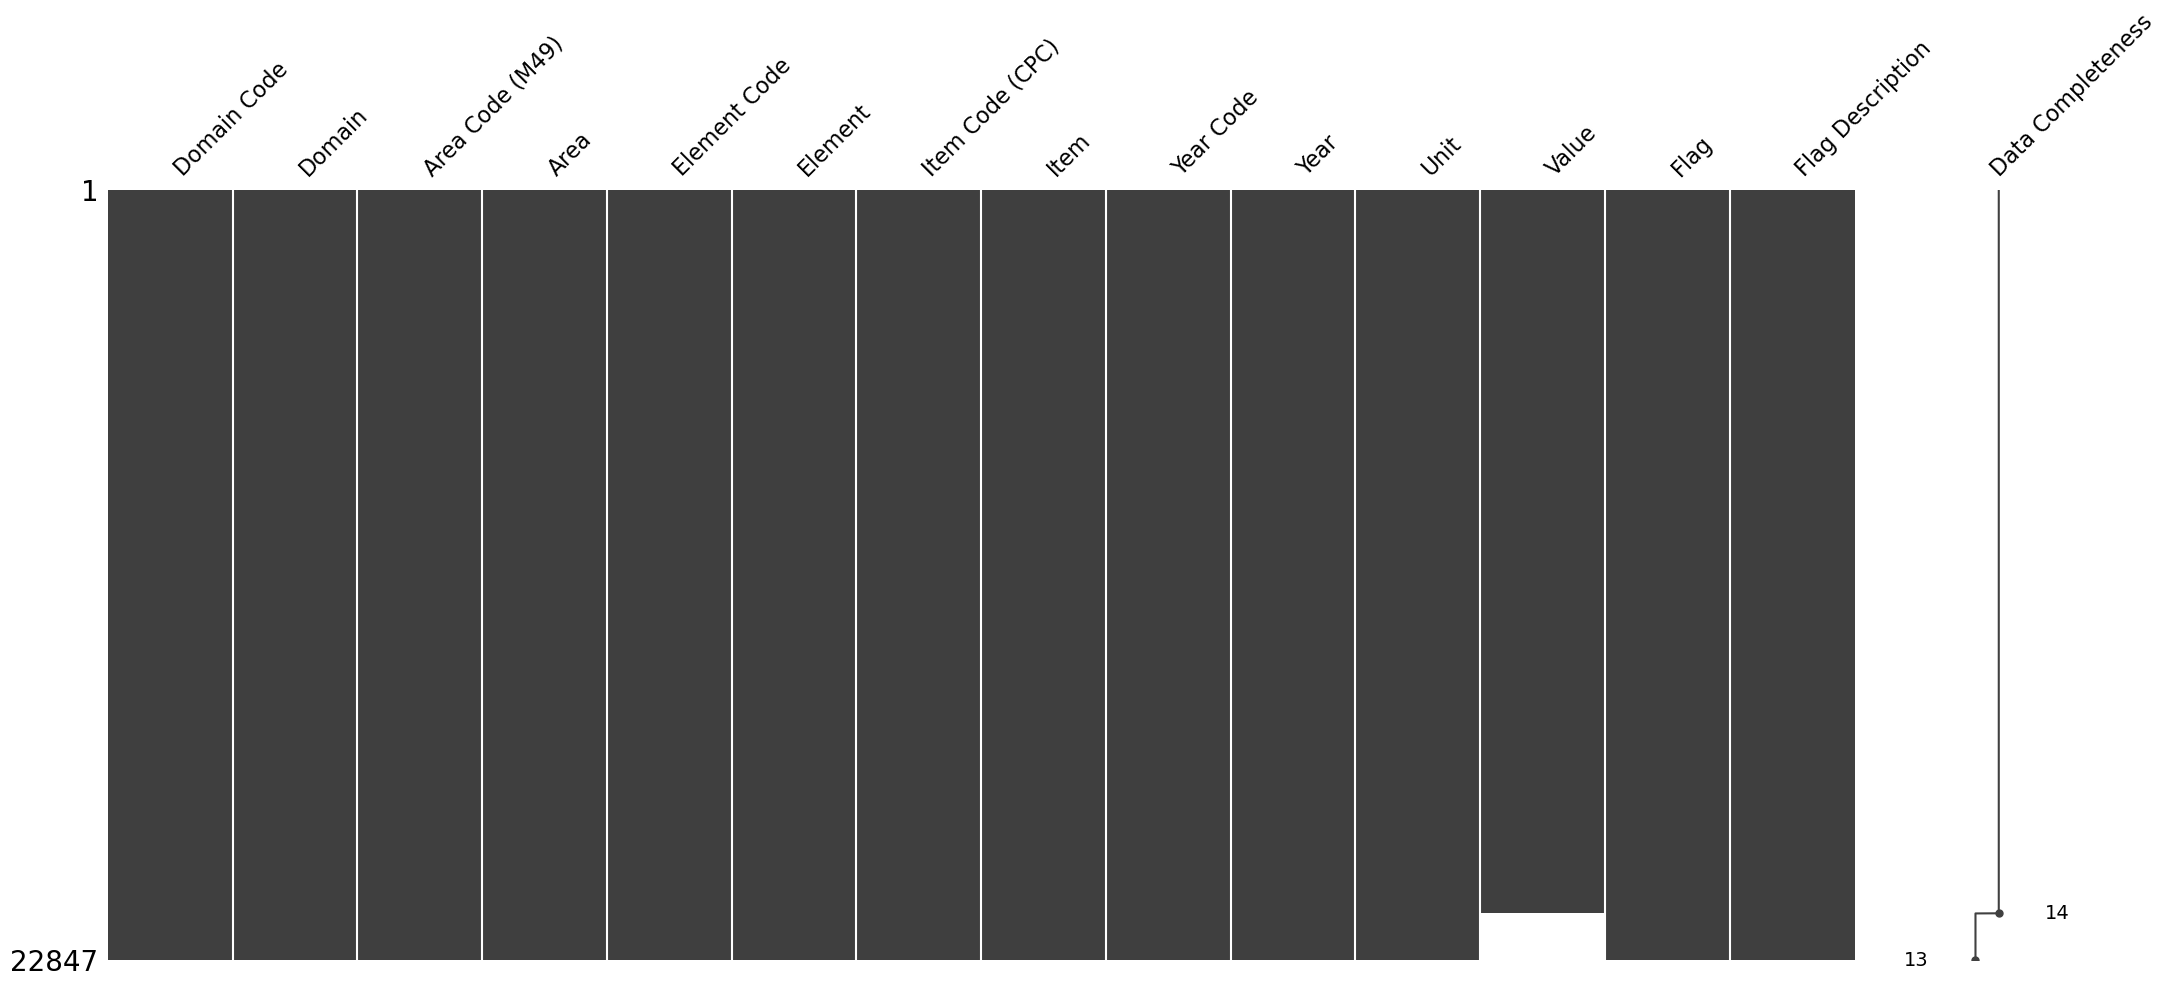

In [24]:
# Displays the completeness of the dataset and where the missing values are
msno.matrix(dprod, labels=True, sort="descending");

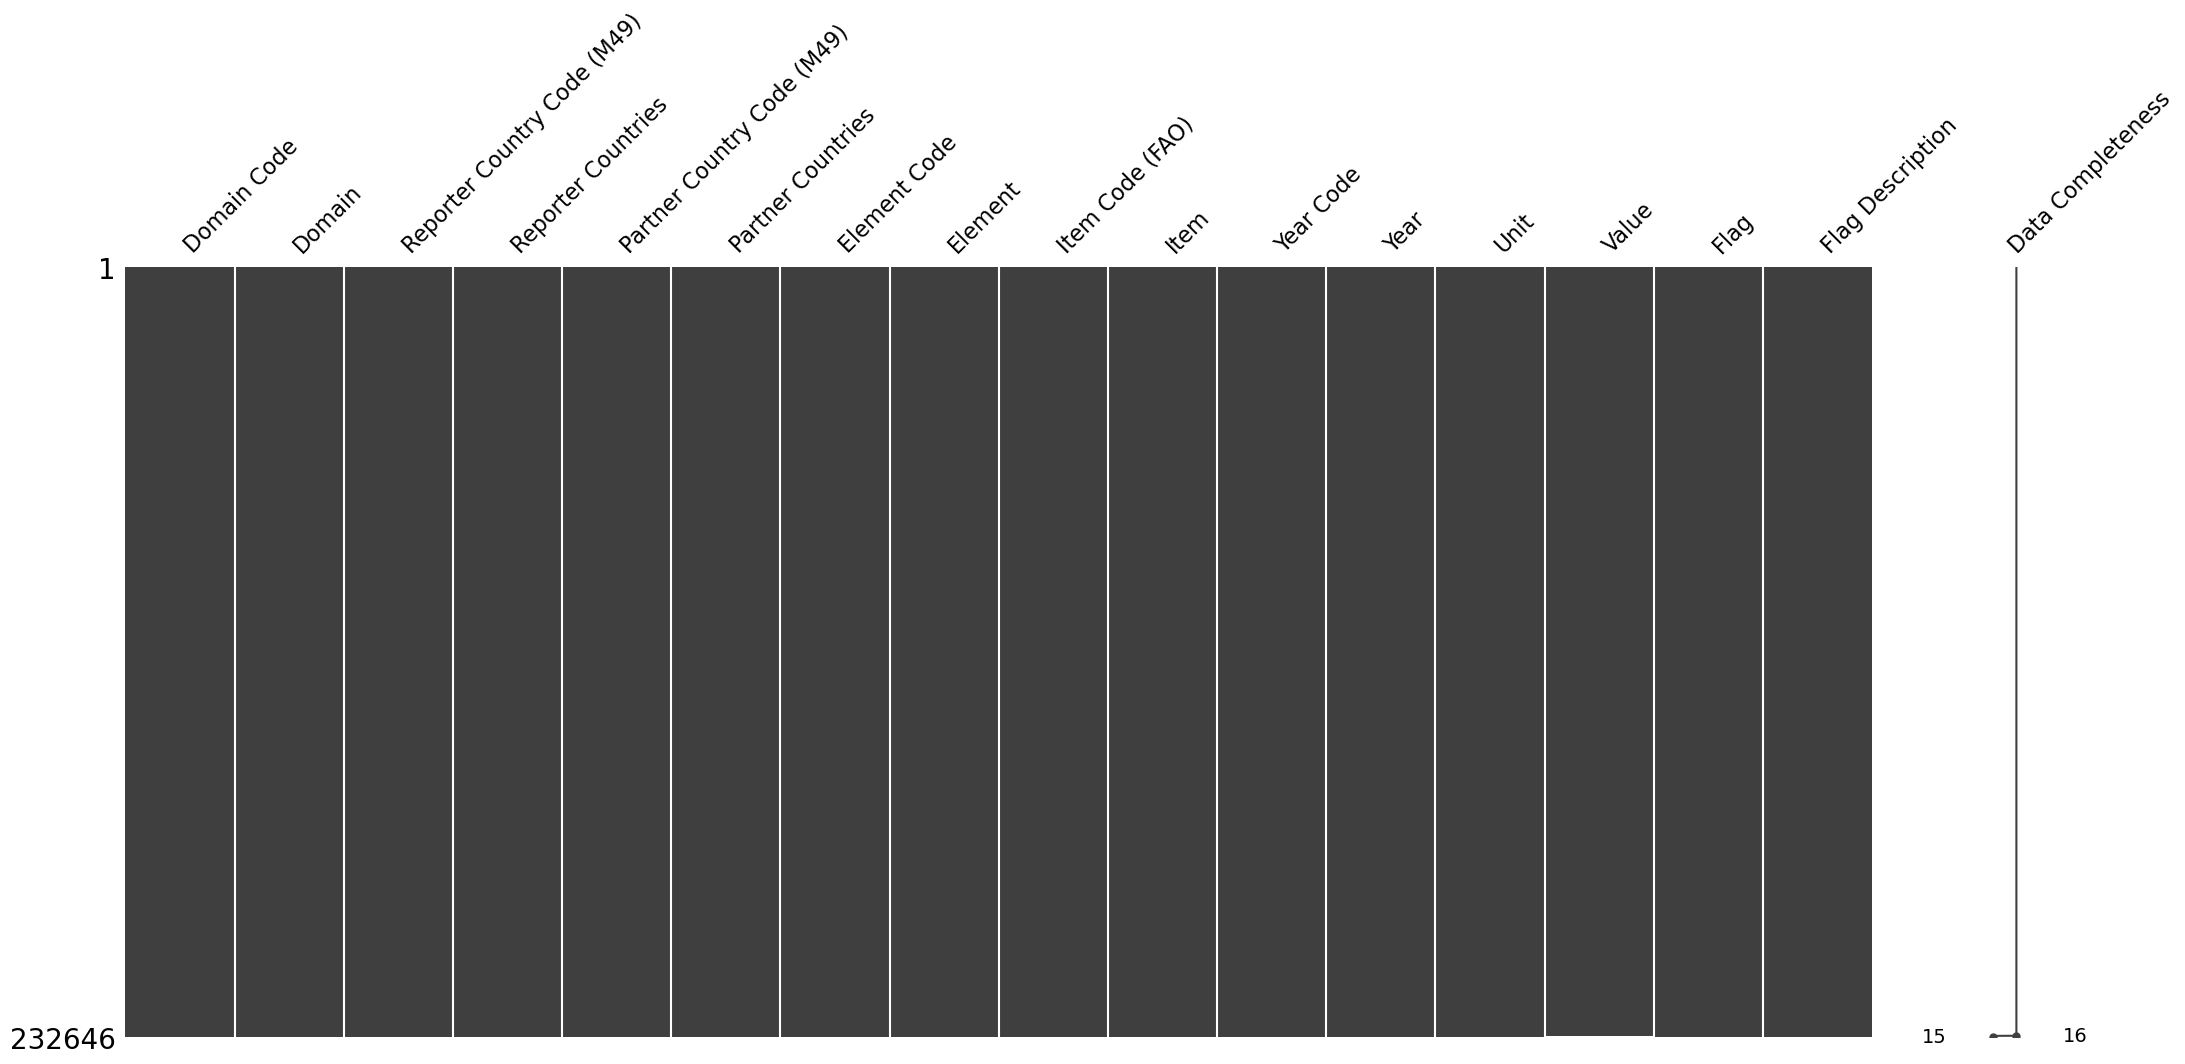

In [25]:
# Displays the completeness of the dataset and where the missing values are
msno.matrix(diev, labels=True, sort="descending");

In [26]:
# Displays the count of missing or null values in the data
dprod.isnull().sum()

Domain Code            0
Domain                 0
Area Code (M49)        0
Area                   0
Element Code           0
Element                0
Item Code (CPC)        0
Item                   0
Year Code              0
Year                   0
Unit                   0
Value               1383
Flag                   0
Flag Description       0
dtype: int64

In [27]:
# Displays the count of missing or null values in the data
diev.isnull().sum()

Domain Code                      0
Domain                           0
Reporter Country Code (M49)      0
Reporter Countries               0
Partner Country Code (M49)       0
Partner Countries                0
Element Code                     0
Element                          0
Item Code (FAO)                  0
Item                             0
Year Code                        0
Year                             0
Unit                             0
Value                          342
Flag                             0
Flag Description                 0
dtype: int64

## Plotting out the datasets to help identify trends or unwanted data in the dataset i.e. they dont add value to the analysis

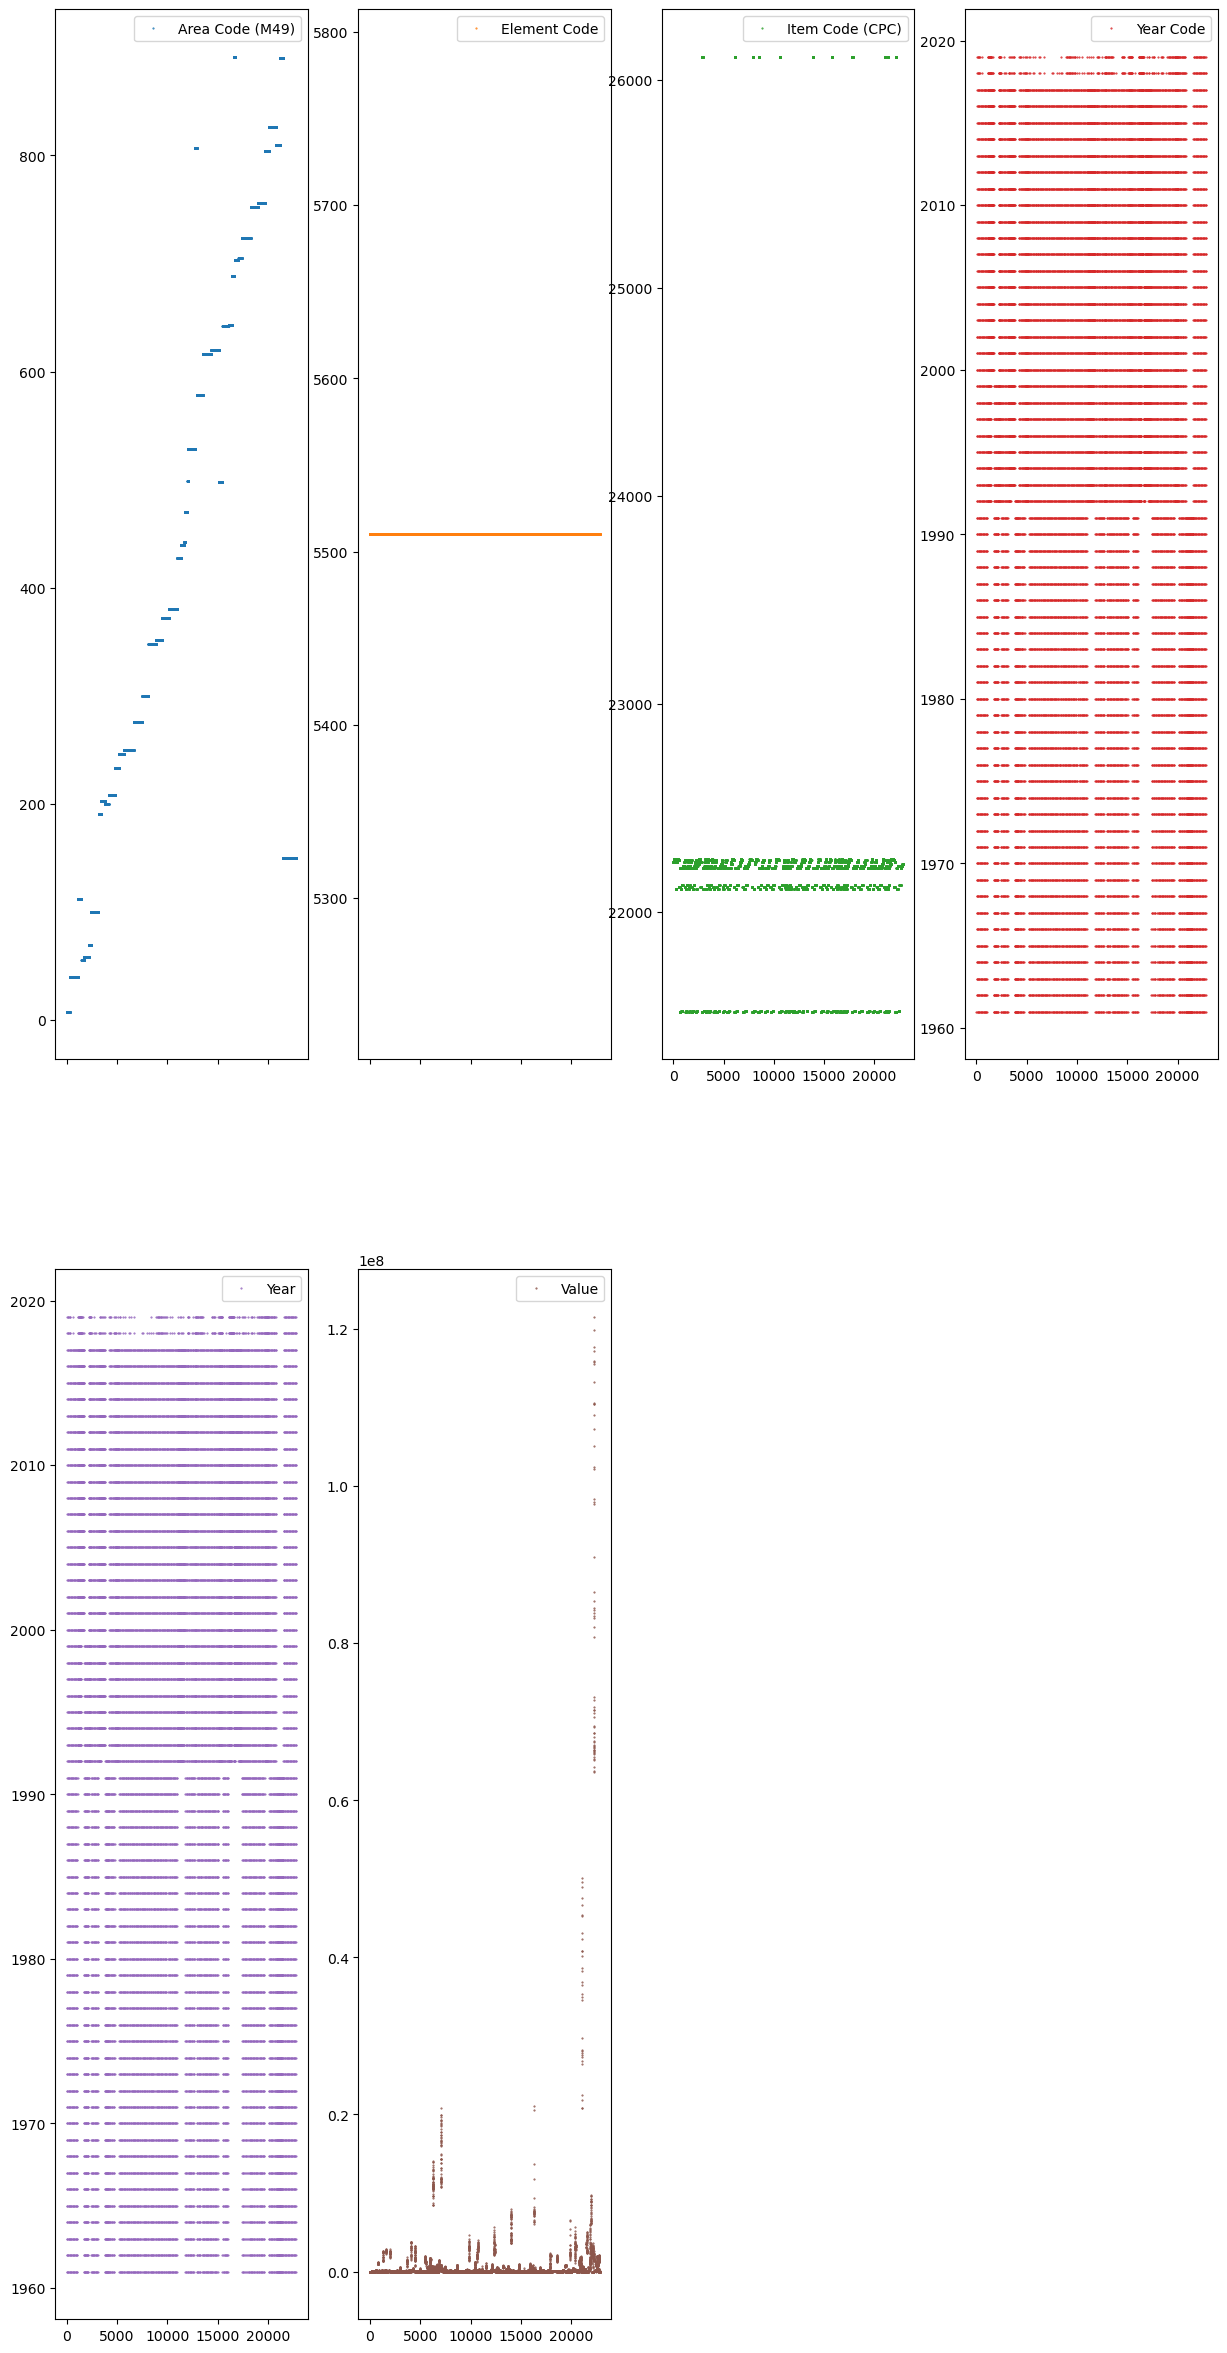

In [28]:
# Displays a global view of the dataset for only numerical features
dprod.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);


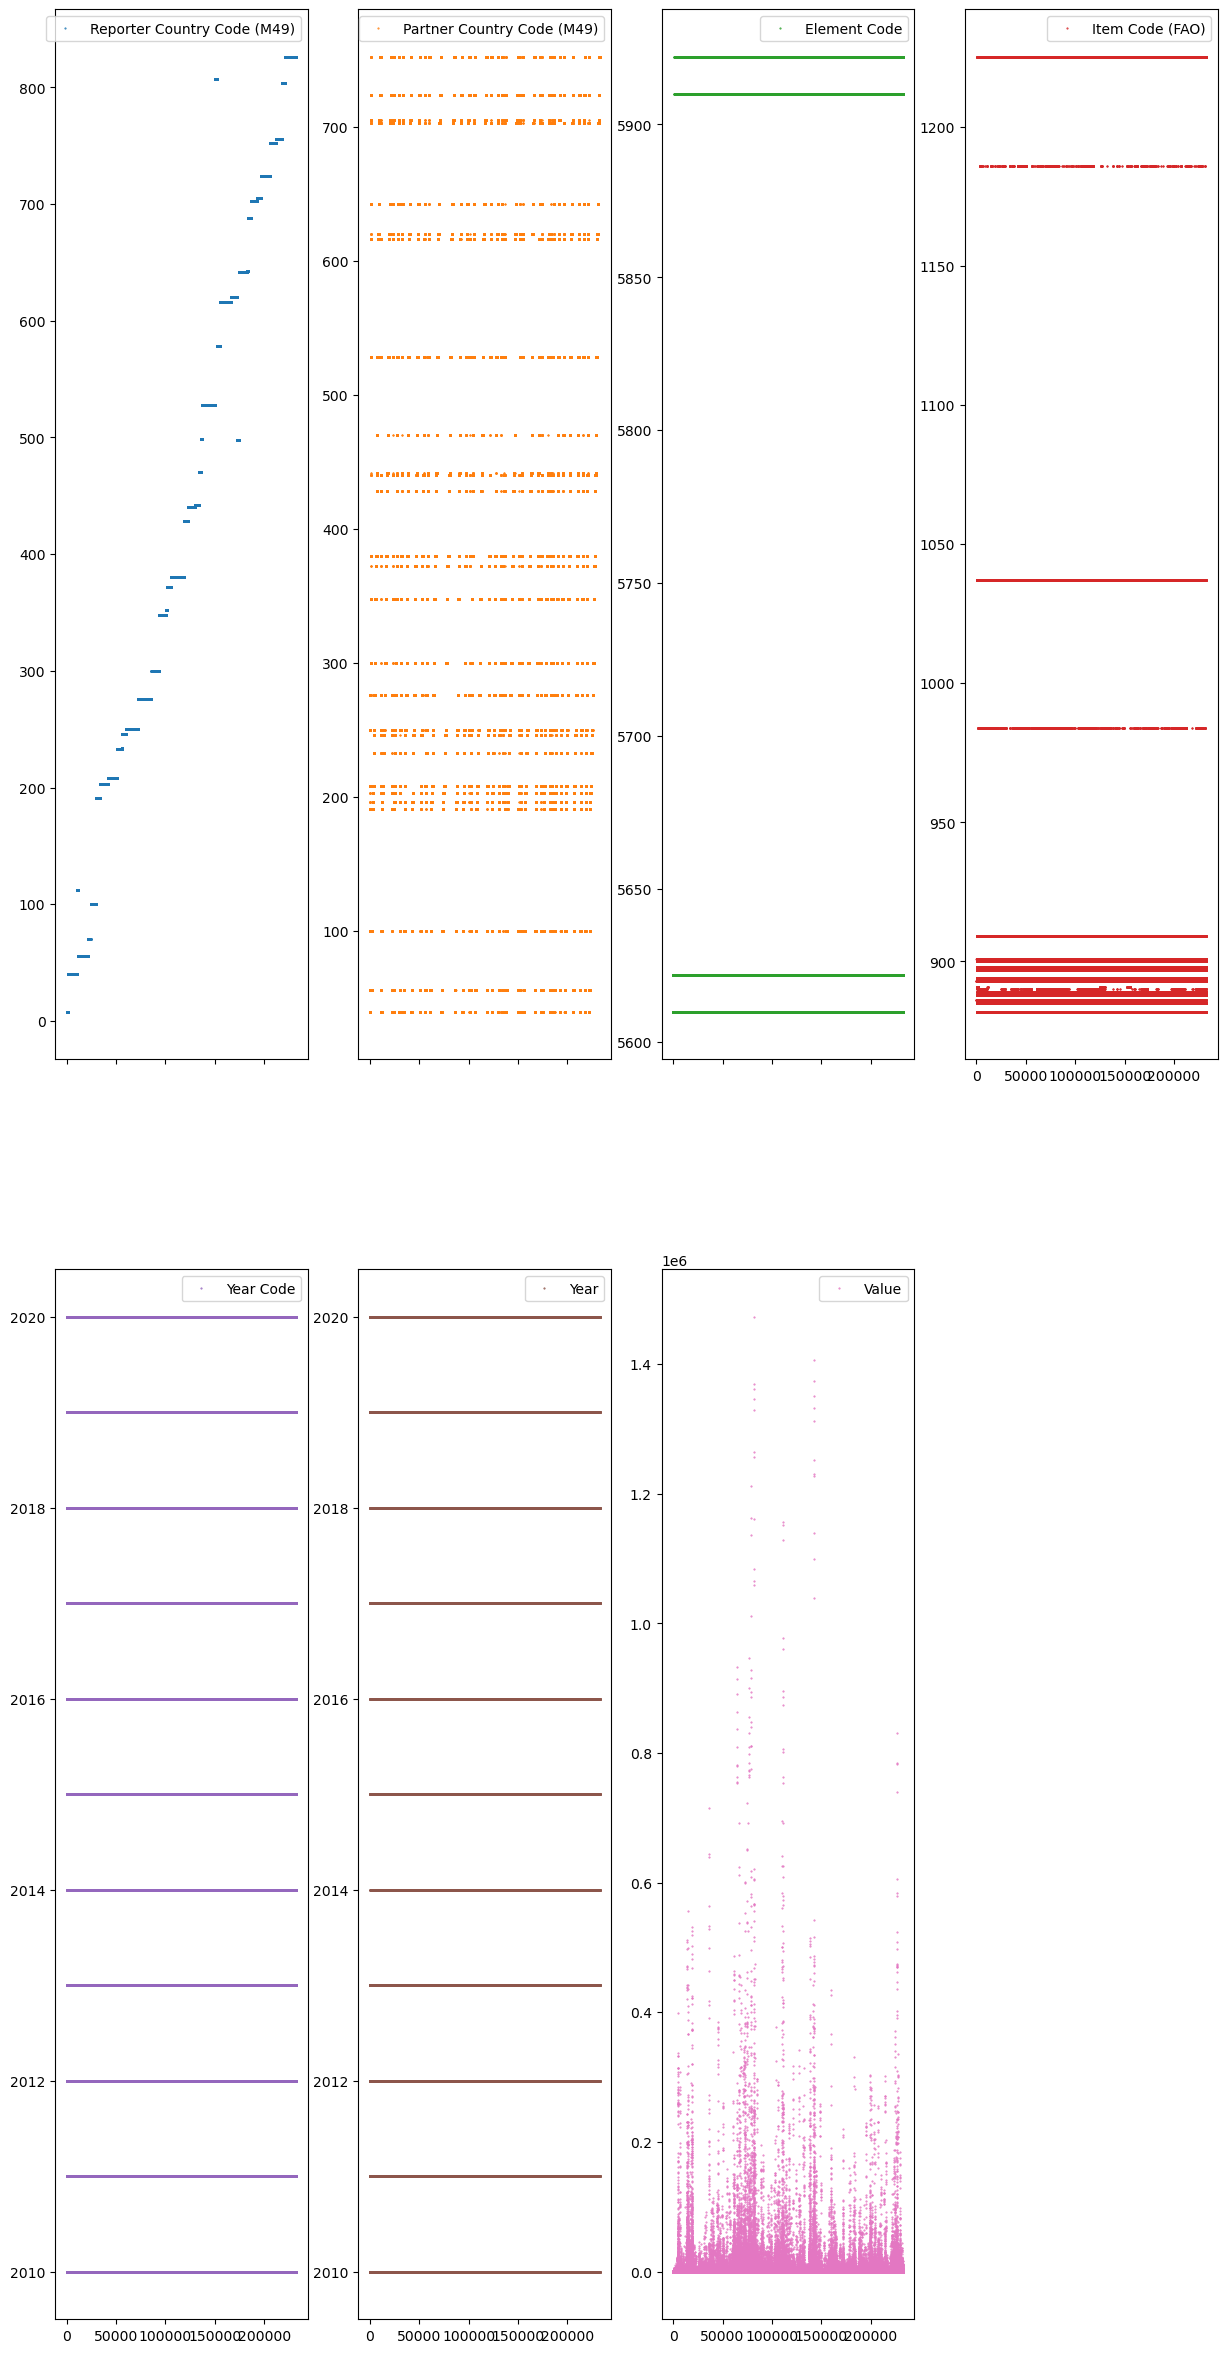

In [29]:
# Displays a global view of the dataset for only numerical features
diev.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);

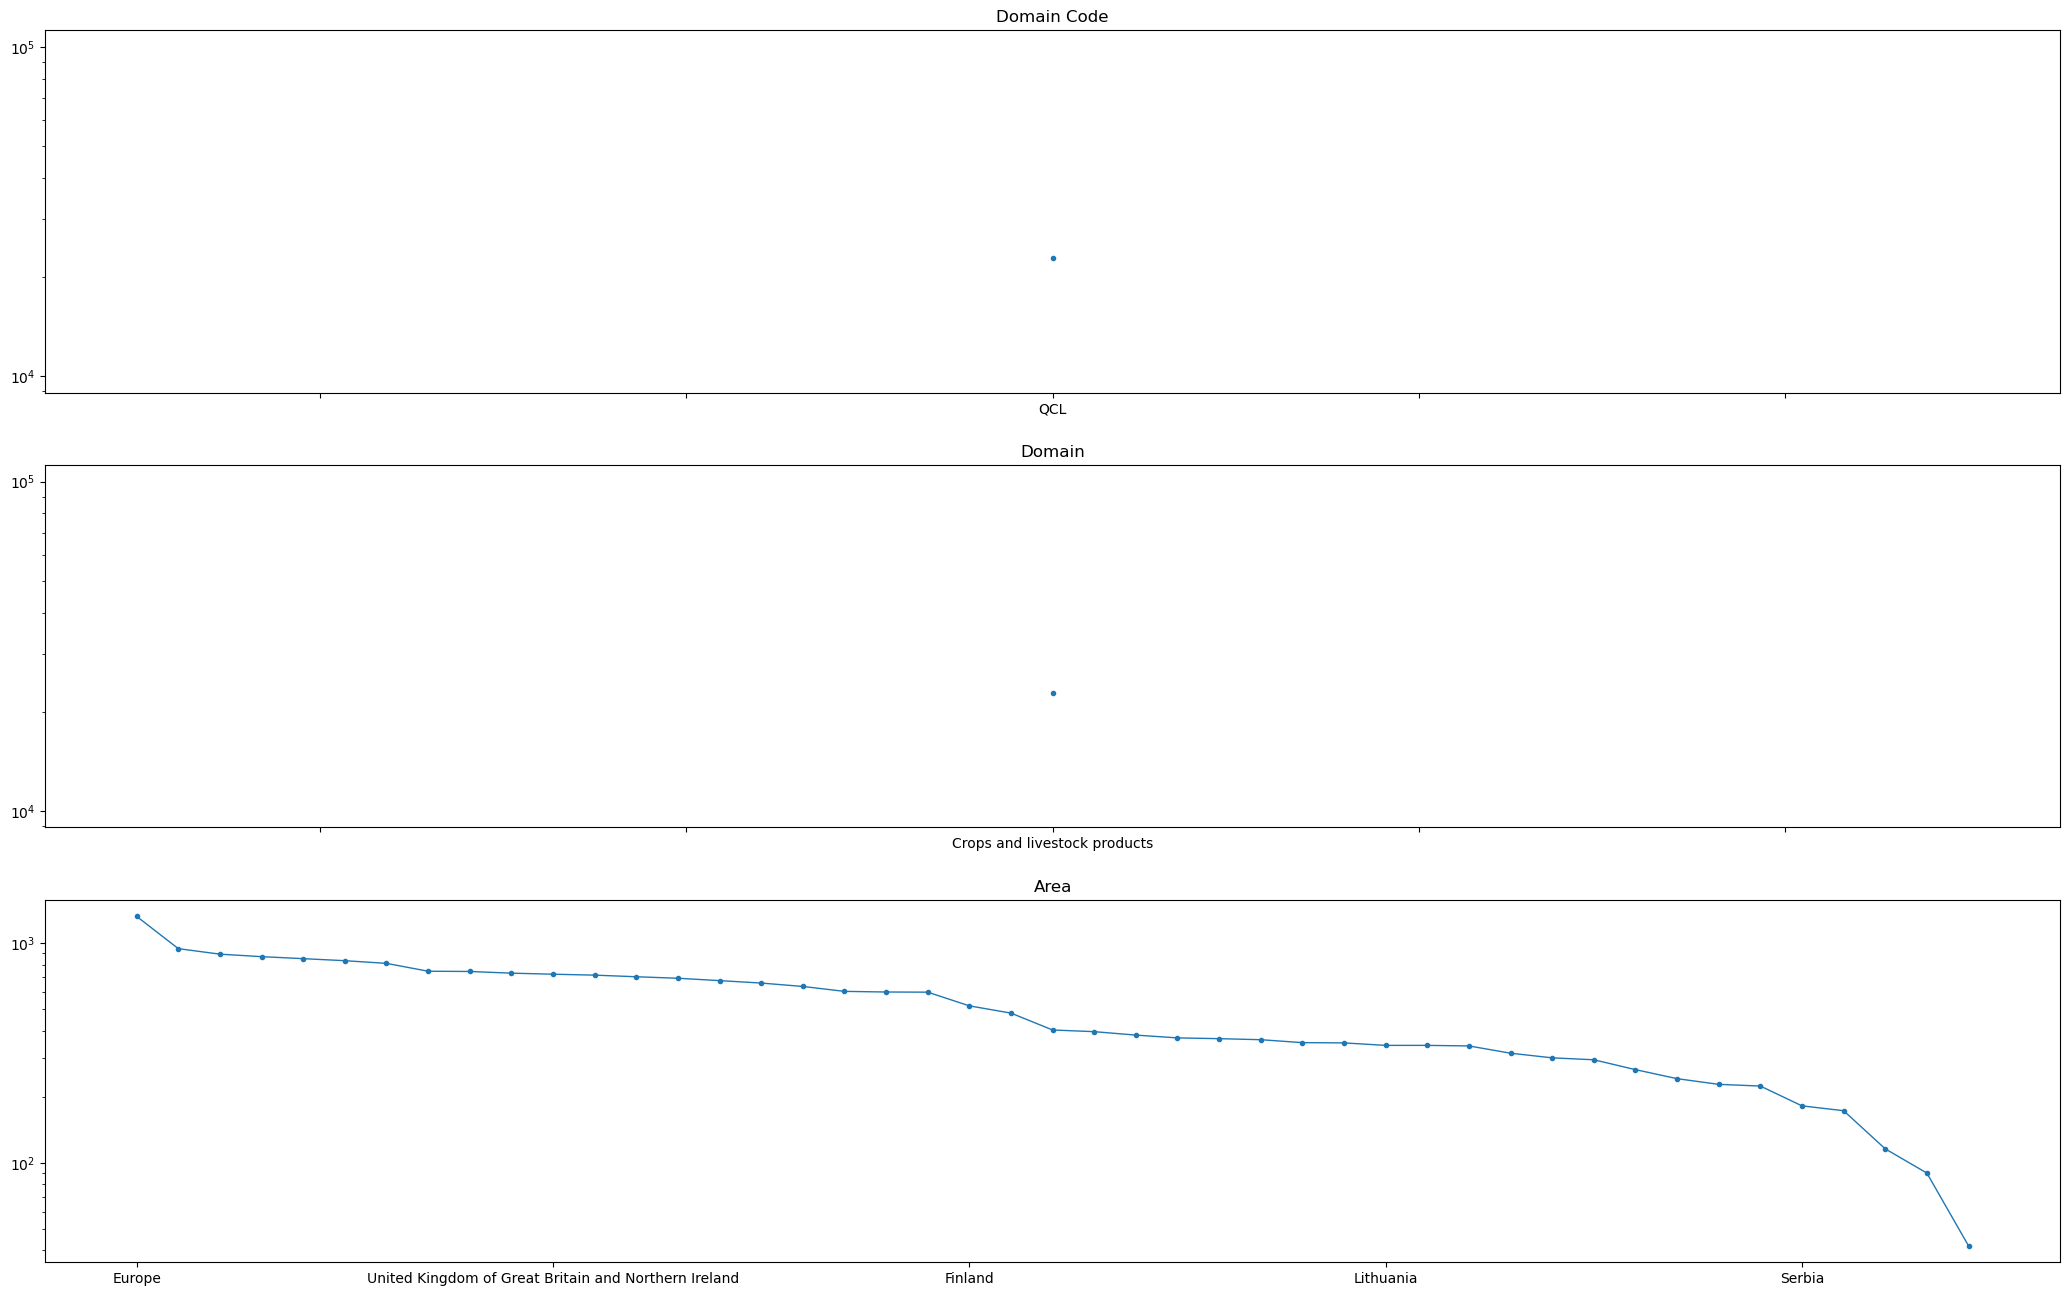

In [30]:
# Displays a global view of the dataset for non numerical features by excluding the numerical entries
# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(26, 16))

# Identify non-numerical features
df_non_numerical = dprod.select_dtypes(exclude=["number", "datetime"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of occurrences per unique value
    df_non_numerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=1, marker=".", ax=ax)
    
plt.show();

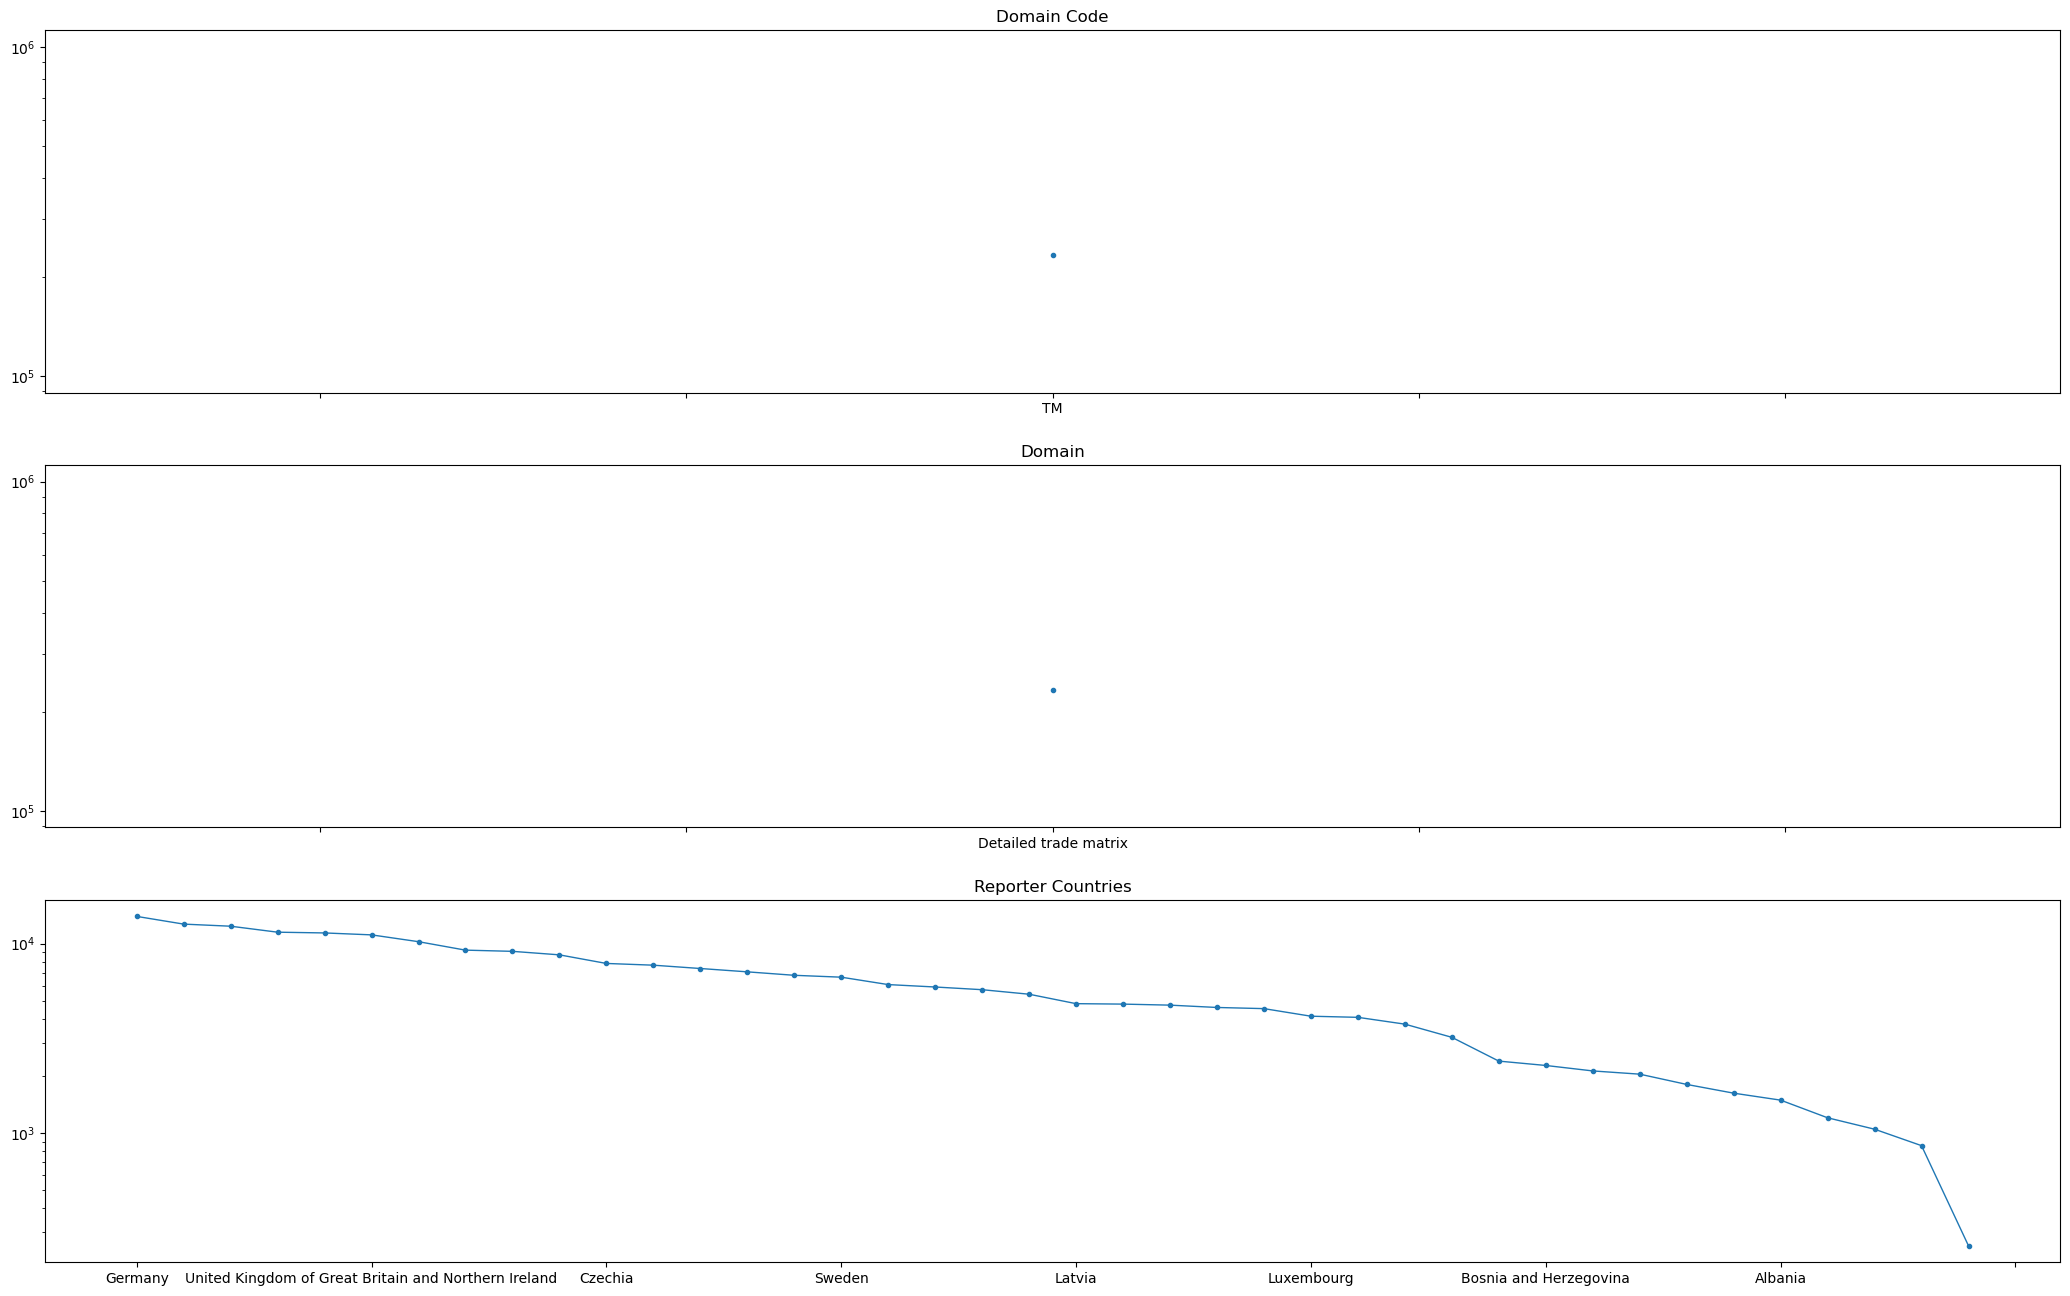

In [31]:
# Displays a global view of the dataset for non numerical features by excluding the numerical entries
# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(26, 16))

# Identify non-numerical features
df_non_numerical = diev.select_dtypes(exclude=["number", "datetime"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of occurrences per unique value
    df_non_numerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=1, marker=".", ax=ax)
    
plt.show();

### Now we know there are no Duplicated Values, plenty of unique values within the features and we will deal with the Null Values later in the prepartion as I need to review more aspects of the data to decide whether or not to remove them. Currently i dont believe to them statistically significant.

### Next I want to do is remove the columns that dont add value overall to the analysis e.g. Columns with only one distinct value. This will begin prepare the dataset to be combined. 
- Domain Code
- Domain
- Element Code
- Area Code
- Year Code

For examle - We know the "Domain" is for Production in Crops and livestock products based on the data contained and having their code types will only bulk the data unnecessscarily. 

In [32]:
# Selects and drops the listed columns and removes any year before 2010 from the dataset
# Then when complete, displays the top 5 rows of the dataset
dprod.drop(['Domain Code', 
            'Item Code (CPC)',
            'Area Code (M49)', 
            'Year Code', 
            'Domain', 
            'Element Code', 
            'Flag'], axis=1, inplace=True)
dprod.drop(dprod[dprod['Year'] <= 2009].index, inplace = True)
dprod.head()

Area     Element                Item  Year    Unit   Value  \
49  Albania  Production  Butter of cow milk  2010  tonnes  3100.0   
50  Albania  Production  Butter of cow milk  2011  tonnes  3200.0   
51  Albania  Production  Butter of cow milk  2012  tonnes  3500.0   
52  Albania  Production  Butter of cow milk  2013  tonnes  3700.0   
53  Albania  Production  Butter of cow milk  2014  tonnes  4500.0   

   Flag Description  
49  Official figure  
50  Official figure  
51  Official figure  
52  Official figure  
53  Official figure

In [33]:
# Selects and drops the listed columns, changes the name of the 'Reporter Countries' column to 'Area' and removes the year 2020 from the dataset
# Then when complete, displays the top 5 rows of the dataset
diev.drop(['Domain Code',
           'Domain',
           'Element Code',
           'Reporter Country Code (M49)',
           'Partner Country Code (M49)',
           'Partner Countries',
           'Item Code (FAO)',
           'Year Code',
           'Flag'], axis=1, inplace=True)
diev.rename(columns = {'Reporter Countries':'Area'}, inplace = True)
diev.drop(diev[diev['Year'] >= 2020].index, inplace = True)
diev.head()

Area          Element                                    Item  Year  \
0  Albania  Import Quantity                      Butter of cow milk  2012   
1  Albania  Import Quantity                      Butter of cow milk  2013   
2  Albania     Import Value                      Butter of cow milk  2012   
3  Albania     Import Value                      Butter of cow milk  2013   
4  Albania  Import Quantity  Buttermilk, curdled and acidified milk  2010   

       Unit  Value Flag Description  
0    tonnes    2.0  Official figure  
1    tonnes    2.0  Official figure  
2  1000 US$    6.0  Official figure  
3  1000 US$    9.0  Official figure  
4    tonnes    0.0  Official figure

## Now the two data sets match in terms of data types and structure, its time to combine them and I will use the pd.concat() function to add the diev dataset to the end of the dprod dataset.

In [34]:
# Concatenates the two datasets into one new Dataframe and once complete displays the end of the dataframe to show the data has moved
df = pd.concat([dprod, diev], ignore_index=True)

df.tail()

Area       Element  \
213704  United Kingdom of Great Britain and Northern I...  Export Value   
213705  United Kingdom of Great Britain and Northern I...  Export Value   
213706  United Kingdom of Great Britain and Northern I...  Export Value   
213707  United Kingdom of Great Britain and Northern I...  Export Value   
213708  United Kingdom of Great Britain and Northern I...  Export Value   

                          Item  Year      Unit  Value Flag Description  
213704  Whole milk, evaporated  2015  1000 US$    2.0  Official figure  
213705  Whole milk, evaporated  2016  1000 US$    7.0  Official figure  
213706  Whole milk, evaporated  2017  1000 US$    0.0  Official figure  
213707  Whole milk, evaporated  2018  1000 US$    5.0  Official figure  
213708  Whole milk, evaporated  2019  1000 US$    7.0  Official figure

## Now we have a new Dataframe, we need to complete some of the previous steps to ensure everything worked as expected. 

In [35]:
# Checks the unique entries for Year to ensure only the 10 years expected appears.
df['Year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [36]:
# Displays the number or rows and columns in the dataset
df.shape

(213709, 7)

## The number of columns has reduced from 14 to 7 and appears cleaner. Next I will review and remove Null or unavailable data.

In [37]:
# Checking the Null values of the dataframe
df.isnull().sum()

Area                  0
Element               0
Item                  0
Year                  0
Unit                  0
Value               461
Flag Description      0
dtype: int64

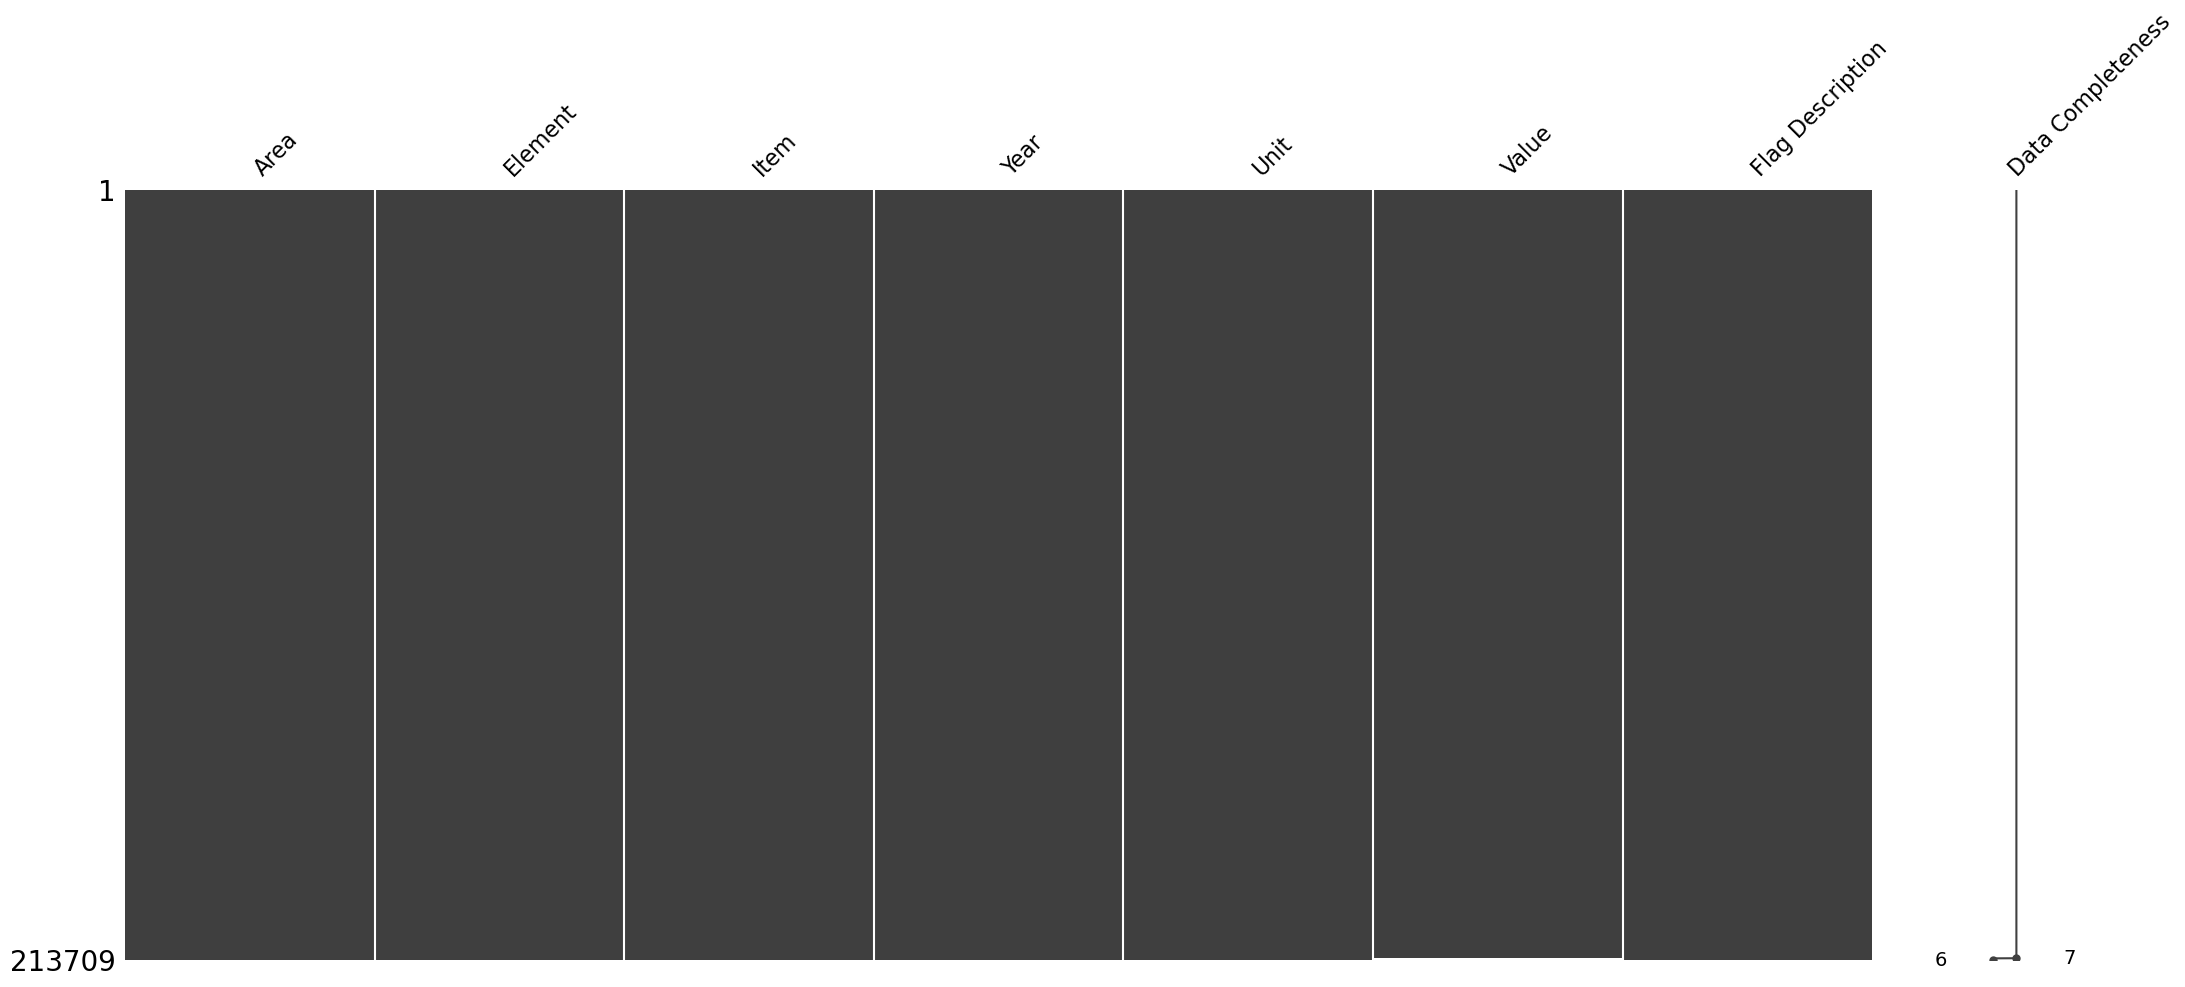

In [38]:
# Displays the completeness of the dataset and where the missing values are
msno.matrix(df, labels=True, sort="descending");

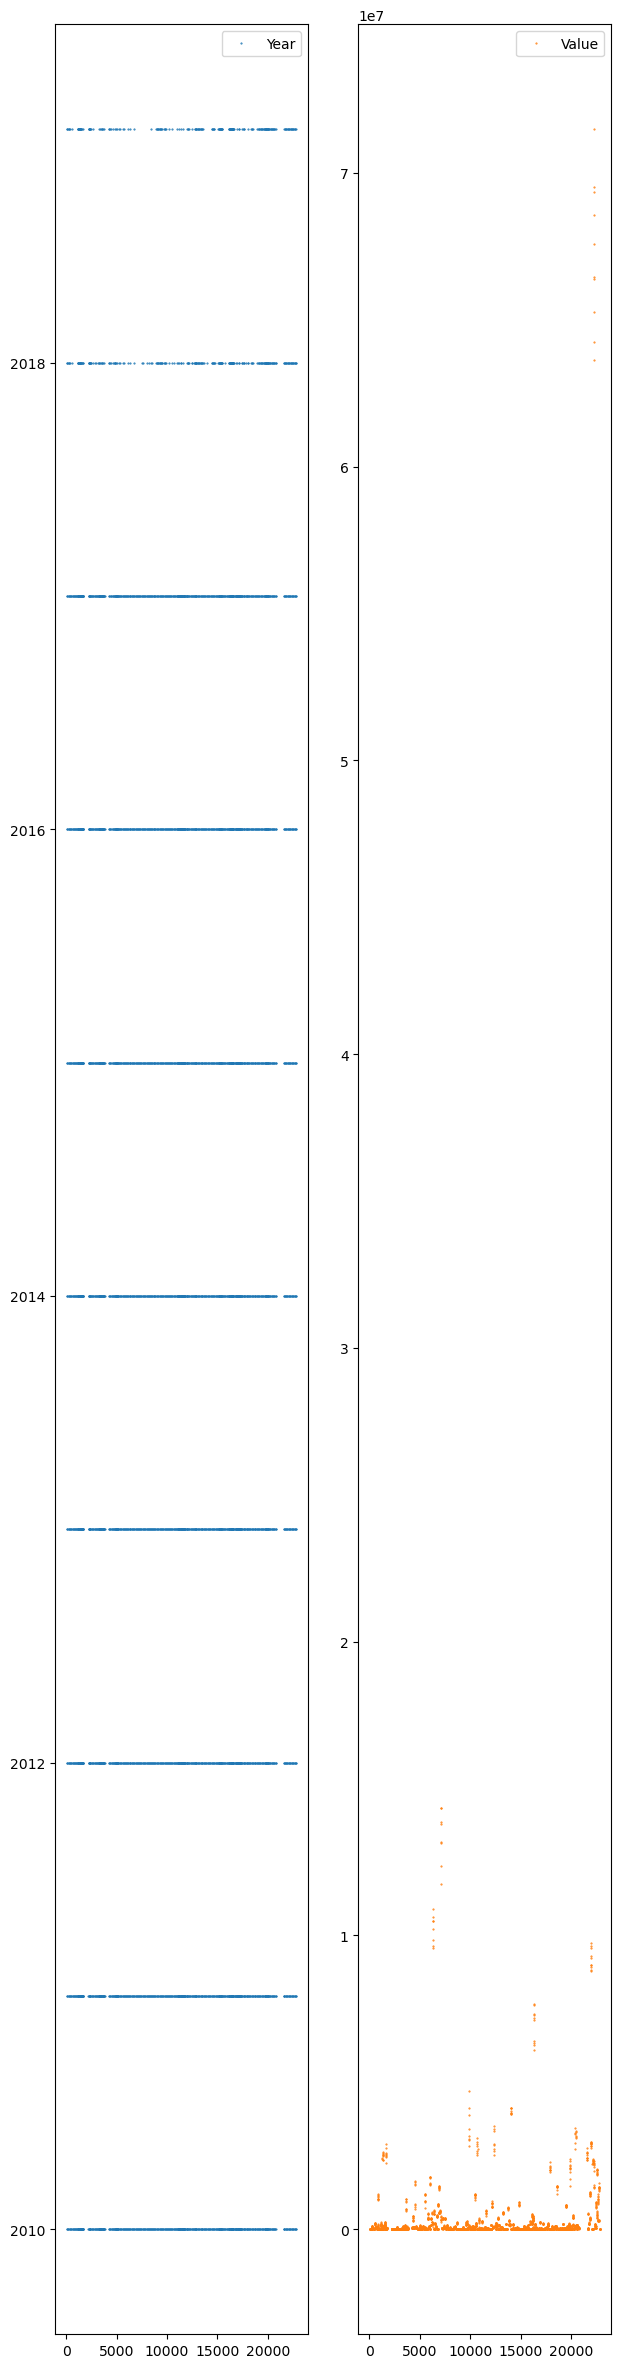

In [39]:
# Displays a global view of the dataset for only numerical features
dprod.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);


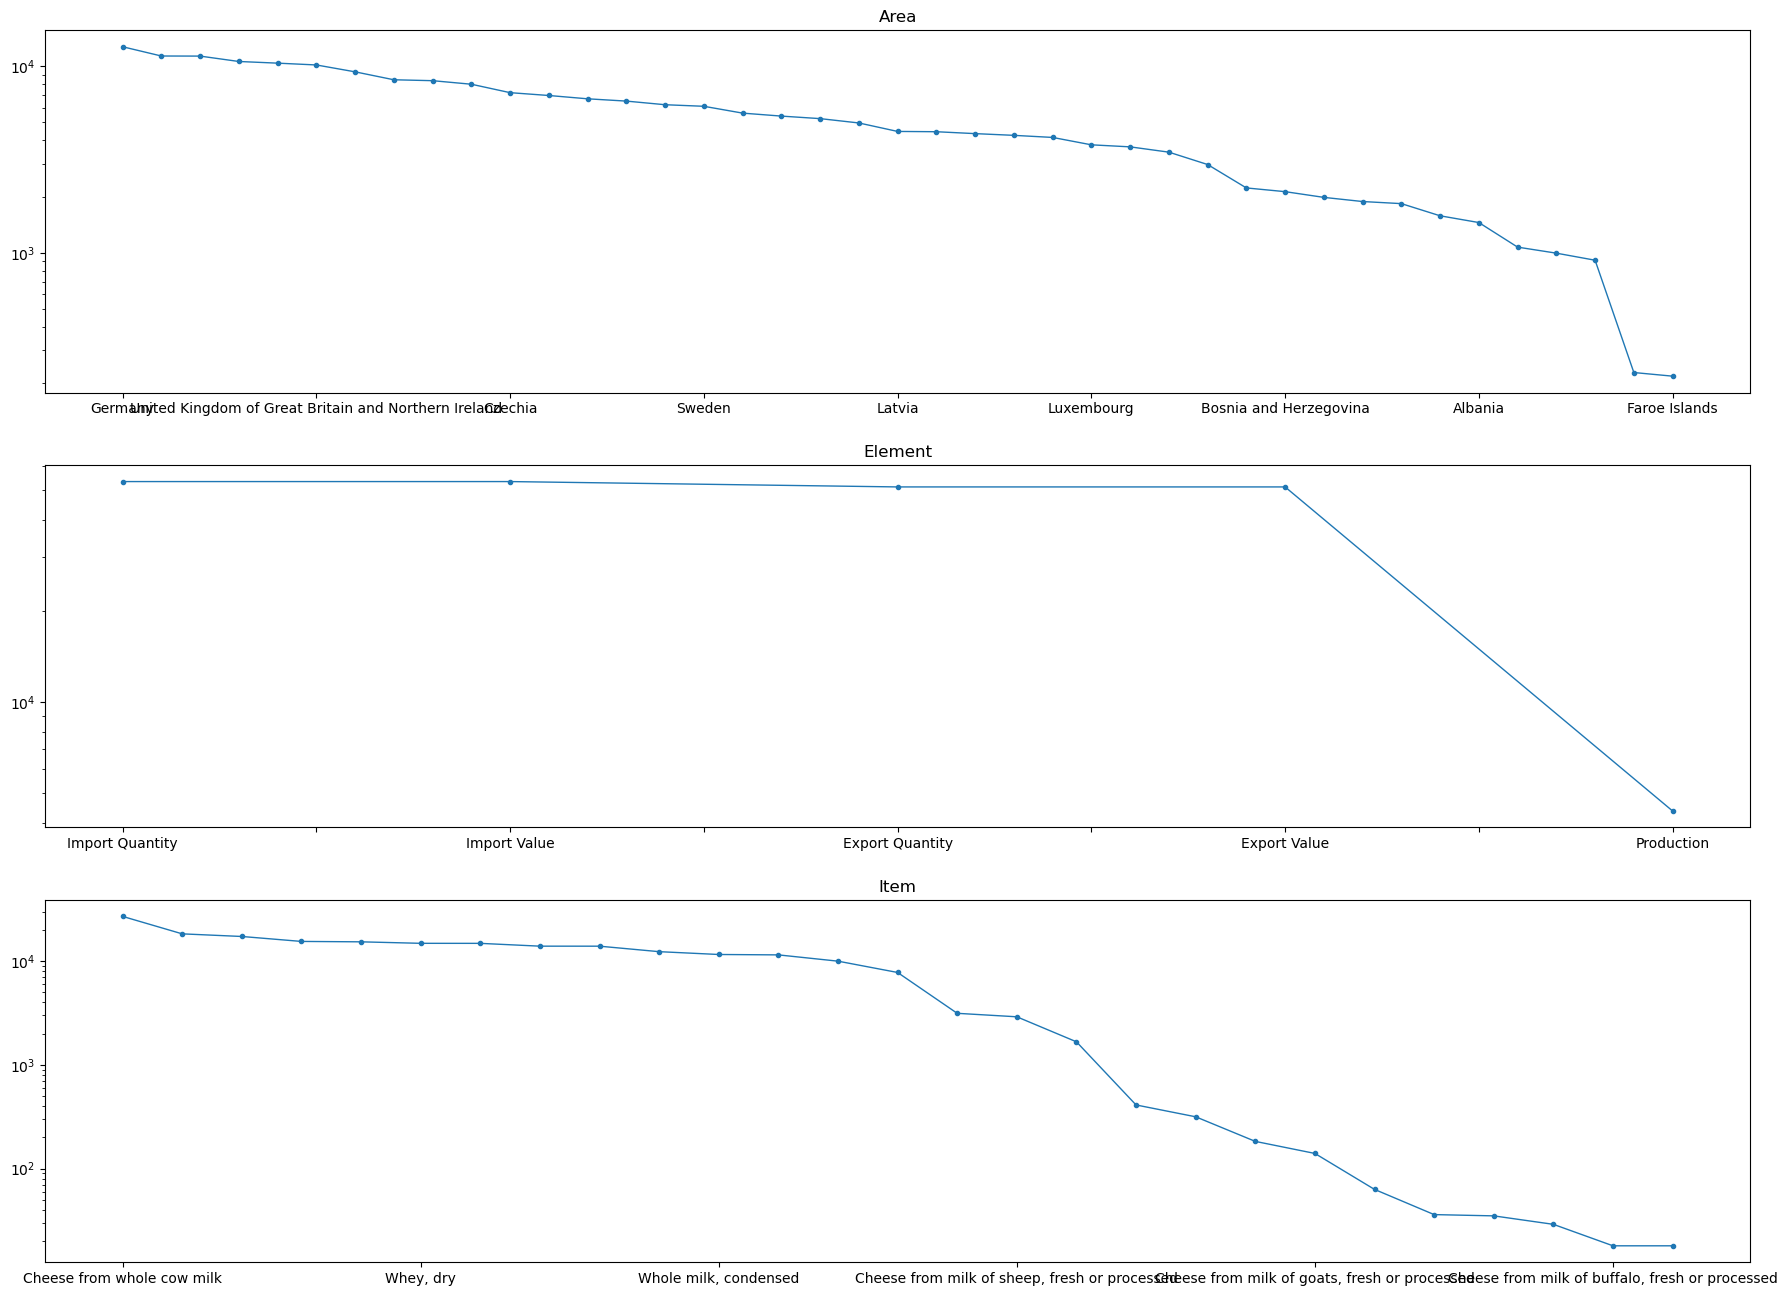

In [40]:
# Displays a global view of the dataset for non numerical features by excluding the numerical entries
# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(22, 16))

# Identify non-numerical features
df_non_numerical = df.select_dtypes(exclude=["number", "datetime"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of occurrences per unique value
    df_non_numerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=1, marker=".", ax=ax)
    
plt.show();

In [41]:
# Displays Values equal to Zero in the dataframe
df[df['Value'] == 0]

Area          Element  \
166                                               Austria       Production   
167                                               Austria       Production   
168                                               Austria       Production   
169                                               Austria       Production   
170                                               Austria       Production   
...                                                   ...              ...   
213674  United Kingdom of Great Britain and Northern I...  Export Quantity   
213692  United Kingdom of Great Britain and Northern I...  Export Quantity   
213693  United Kingdom of Great Britain and Northern I...  Export Quantity   
213696  United Kingdom of Great Britain and Northern I...  Export Quantity   
213706  United Kingdom of Great Britain and Northern I...     Export Value   

                          Item  Year      Unit  Value Flag Description  
166     Whole milk, evaporated  2010    tonnes    0.0    Imputed value  
167     Whole milk, evaporated  2011    tonnes    0.0    Imputed value  
168     Whole milk, evaporated  2012    tonnes    0.0    Imputed value  
169     Whole milk, evaporated  2013    tonnes    0.0    Imputed value  
170     Whole milk, evaporated  2014    tonnes    0.0    Imputed value  
...                        ...   ...       ...    ...              ...  
213674   Whole milk, condensed  2017    tonnes    0.0  Official figure  
213692  Whole milk, evaporated  2013    tonnes    0.0  Official figure  
213693  Whole milk, evaporated  2014    tonnes    0.0  Official figure  
213696  Whole milk, evaporated  2017    tonnes    0.0  Official figure  
213706  Whole milk, evaporated  2017  1000 US$    0.0  Official figure  

[23464 rows x 7 columns]

## From looking at the data I am curious about the Flag Description and the data contained under that heading

In [42]:
# Checks the unique entries for Flag Description.
df['Flag Description'].unique()

array(['Official figure', 'Estimated value', 'Imputed value',
       'Unofficial figure',
       'Missing value (data cannot exist, not applicable)',
       'Figure from international organizations'], dtype=object)

In [43]:
# Displays data with Missing value (data cannot exist, not applicable) as the flag description
df[df['Flag Description'] =='Missing value (data cannot exist, not applicable)']

Area     Element  \
505                                            Bulgaria  Production   
506                                            Bulgaria  Production   
507                                            Bulgaria  Production   
508                                            Bulgaria  Production   
547                                            Bulgaria  Production   
...                                                 ...         ...   
4144  United Kingdom of Great Britain and Northern I...  Production   
4145  United Kingdom of Great Britain and Northern I...  Production   
4146  United Kingdom of Great Britain and Northern I...  Production   
4147  United Kingdom of Great Britain and Northern I...  Production   
4148  United Kingdom of Great Britain and Northern I...  Production   

                    Item  Year    Unit  Value  \
505      Buttermilk, dry  2010  tonnes    NaN   
506      Buttermilk, dry  2011  tonnes    NaN   
507      Buttermilk, dry  2012  tonnes    NaN   
508      Buttermilk, dry  2013  tonnes    NaN   
547   Ghee from cow milk  2010  tonnes    NaN   
...                  ...   ...     ...    ...   
4144             Yoghurt  2014  tonnes    NaN   
4145             Yoghurt  2015  tonnes    NaN   
4146             Yoghurt  2016  tonnes    NaN   
4147             Yoghurt  2017  tonnes    NaN   
4148             Yoghurt  2018  tonnes    NaN   

                                       Flag Description  
505   Missing value (data cannot exist, not applicable)  
506   Missing value (data cannot exist, not applicable)  
507   Missing value (data cannot exist, not applicable)  
508   Missing value (data cannot exist, not applicable)  
547   Missing value (data cannot exist, not applicable)  
...                                                 ...  
4144  Missing value (data cannot exist, not applicable)  
4145  Missing value (data cannot exist, not applicable)  
4146  Missing value (data cannot exist, not applicable)  
4147  Missing value (data cannot exist, not applicable)  
4148  Missing value (data cannot exist, not applicable)  

[157 rows x 7 columns]

## As the volume of rows is higher when the unavailable data is selected rather than a Zero value, I'll remove missing alue rows as countries may have had with production of a product and only generated zero. 

In [44]:
# Removes the rows with Missing Value from the Dataframe
df.drop(df[df['Flag Description'] =='Missing value (data cannot exist, not applicable)'].index, inplace = True);

In [45]:
# Displays the count of missing or null values in the data
df.isnull().sum()

Area                  0
Element               0
Item                  0
Year                  0
Unit                  0
Value               304
Flag Description      0
dtype: int64

## Looking at the list of Countries in the Dataframe, its time to remove the countires that are not part of the EU e.g. The UK

In [46]:
# Checks the unique entries for Area.
df['Area'].unique()

array(['Albania', 'Austria', 'Belarus', 'Belgium',
       'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malta', 'Montenegro', 'Netherlands',
       'North Macedonia', 'Norway', 'Poland', 'Portugal',
       'Republic of Moldova', 'Romania', 'Russian Federation', 'Serbia',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'Ukraine', 'United Kingdom of Great Britain and Northern Ireland',
       'Europe', 'Faroe Islands'], dtype=object)

## From this list I can see 17 countries that are not part of the EU or EEA so I will remove them and update the data.

## This data was recorded when the UK was still part of the EU, I want to check if the UK data is still included and if so remove it. I also want to check that all countries recorded are part of the EU/EEC

In [47]:
# Drops the countries not part of the EU from the Dataframe using the .drop function
df.drop(df[df['Area'].str.contains('Albania|Faroe Islands|Belarus|Belgium-Luxembourg|Bosnia and Herzegovina|Czechia|Czechoslovakia|Montenegro|North Macedonia|Republic of Moldova|Russian Federation|Serbia|Serbia and Montenegro|Switzerland|Ukraine|United Kingdom of Great Britain and Northern Ireland|USSR|Yugoslav SFR|Europe')==True].index, inplace = True)

In [48]:
# Checks the unique entries for Area to ensure only the EU Members remain.
df['Area'].unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta',
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden'], dtype=object)

## While I have opted to remove Europe from the Country Fields, this is to factor in the likes of the UK being part of the EU for some of the years in the data. I will create a new column called "Origin" to hold the grouped data for the current EU member countries as "Europe" and Ireland as two new variables.

In [49]:
# This is to create a column where based on the country it will be populated with either Ireland or Europe
df['Origin'] = np.where(df['Area'] == 'Ireland', 'Ireland', 'Europe')

## Checking to see if the value of the rows has decreased by the correct amount and it has

In [50]:
# Displays the number or rows and columns in the dataset
df.shape

(174138, 8)

In [51]:
# Displays the top 5 rows of the dataframe
df.head()

Area     Element                Item  Year    Unit    Value  \
50  Austria  Production  Butter of cow milk  2010  tonnes  33792.0   
51  Austria  Production  Butter of cow milk  2011  tonnes  34975.0   
52  Austria  Production  Butter of cow milk  2012  tonnes  35607.0   
53  Austria  Production  Butter of cow milk  2013  tonnes  34686.0   
54  Austria  Production  Butter of cow milk  2014  tonnes  34165.0   

   Flag Description  Origin  
50  Official figure  Europe  
51  Official figure  Europe  
52  Official figure  Europe  
53  Official figure  Europe  
54  Official figure  Europe

In [52]:
# I can see the index is out of step so I will reset that, remove the new index that will appear and display the top 5 rows to check everything worked
df = df.reset_index()
df.drop(['index'], axis=1, inplace=True)
df.head()

Area     Element                Item  Year    Unit    Value  \
0  Austria  Production  Butter of cow milk  2010  tonnes  33792.0   
1  Austria  Production  Butter of cow milk  2011  tonnes  34975.0   
2  Austria  Production  Butter of cow milk  2012  tonnes  35607.0   
3  Austria  Production  Butter of cow milk  2013  tonnes  34686.0   
4  Austria  Production  Butter of cow milk  2014  tonnes  34165.0   

  Flag Description  Origin  
0  Official figure  Europe  
1  Official figure  Europe  
2  Official figure  Europe  
3  Official figure  Europe  
4  Official figure  Europe

In [53]:
# Displays the count of duplicate values in the dataframe
df.duplicated().sum();

In [54]:
# Displays the list of duplicate values in the dataframe
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
174133     True
174134    False
174135     True
174136    False
174137     True
Length: 174138, dtype: bool

In [55]:
# Displays the last 10 entries in the dataframe
df.tail(10)

Area          Element                   Item  Year      Unit  Value  \
174128  Sweden  Export Quantity  Whole milk, condensed  2015    tonnes    0.0   
174129  Sweden  Export Quantity  Whole milk, condensed  2016    tonnes    0.0   
174130  Sweden  Export Quantity  Whole milk, condensed  2017    tonnes    0.0   
174131  Sweden  Export Quantity  Whole milk, condensed  2018    tonnes    0.0   
174132  Sweden  Export Quantity  Whole milk, condensed  2019    tonnes    0.0   
174133  Sweden     Export Value  Whole milk, condensed  2015  1000 US$    0.0   
174134  Sweden     Export Value  Whole milk, condensed  2016  1000 US$    0.0   
174135  Sweden     Export Value  Whole milk, condensed  2017  1000 US$    0.0   
174136  Sweden     Export Value  Whole milk, condensed  2018  1000 US$    0.0   
174137  Sweden     Export Value  Whole milk, condensed  2019  1000 US$    0.0   

       Flag Description  Origin  
174128  Official figure  Europe  
174129  Official figure  Europe  
174130  Official figure  Europe  
174131  Official figure  Europe  
174132  Official figure  Europe  
174133  Official figure  Europe  
174134  Official figure  Europe  
174135  Official figure  Europe  
174136  Official figure  Europe  
174137  Official figure  Europe

In [56]:
# Displays the number of unique values in the dataset
df.nunique()

Area                   27
Element                 5
Item                   26
Year                   10
Unit                    2
Value               21599
Flag Description        4
Origin                  2
dtype: int64

## Another consideration with the 2 tables is 
## - The different product types.
## I will need to correct products so they are consistent through the dataframes and to bring the tables in line and comparable.

In [57]:
# Displays the number of unique values for Item in the dataset
df['Item'].unique()

array(['Butter of cow milk',
       'Cheese from milk of goats, fresh or processed',
       'Cheese from milk of sheep, fresh or processed',
       'Cheese from skimmed cow milk', 'Cheese from whole cow milk',
       'Cream, fresh', 'Pig fat, rendered', 'Skim milk and whey powder',
       'Skim milk of cows', 'Tallow', 'Whey, condensed', 'Whey, dry',
       'Whole milk powder', 'Whole milk, condensed',
       'Whole milk, evaporated', 'Skim milk, condensed',
       'Buttermilk, dry', 'Raw silk (not thrown)',
       'Skim milk, evaporated', 'Yoghurt',
       'Cheese from milk of buffalo, fresh or processed',
       'Butter of goat milk', 'Buttermilk, curdled and acidified milk',
       'Dairy products n.e.c.', 'Fat of pigs', 'Raw milk of cattle'],
      dtype=object)

In [58]:
# This will drop the listed Item entries fromt he dataframe and display the column and row volumes
df.drop(df[df['Item'].str.contains('Skim milk of cows|Buttermilk, curdled and acidified milk|Whey, condensed|Skim milk, evaporated|Dairy products n.e.c.|Butter of goat milk|Fat of pigs|Skim milk, condensed|Yoghurt|Tallow|Raw milk of cattle|Whey, dry|Raw silk (not thrown)|Cheese from skimmed cow milk|Cheese from milk of buffalo, fresh or processed|Buttermilk, dry|Cheese from milk of goats, fresh or processed|Pig fat, rendered')==True].index, inplace = True);
df.drop(df[df['Item'] =='Raw silk (not thrown)'].index, inplace = True);
df.drop(df[df['Item'] =='Ghee from cow milk'].index, inplace = True);
df.shape

/var/folders/4z/t6d1mv855tg3_0k261zlc6z00000gr/T/ipykernel_62257/835939743.py:2: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



(94418, 8)

In [59]:
# Displays the number of unique values for Item in the dataset
df['Item'].unique()

array(['Butter of cow milk',
       'Cheese from milk of sheep, fresh or processed',
       'Cheese from whole cow milk', 'Cream, fresh',
       'Skim milk and whey powder', 'Whole milk powder',
       'Whole milk, condensed', 'Whole milk, evaporated'], dtype=object)

In [60]:
# Displays the number of null values in the dataset
df.isnull().sum()

Area                 0
Element              0
Item                 0
Year                 0
Unit                 0
Value               24
Flag Description     0
Origin               0
dtype: int64

## As the volume of Null values is so small incomparison to the overall size of the Dataframe, I am going to drop them out. 

In [61]:
# Drops any rows with Null, NA or NaN values 
df.dropna()

Area       Element                   Item  Year      Unit    Value  \
0       Austria    Production     Butter of cow milk  2010    tonnes  33792.0   
1       Austria    Production     Butter of cow milk  2011    tonnes  34975.0   
2       Austria    Production     Butter of cow milk  2012    tonnes  35607.0   
3       Austria    Production     Butter of cow milk  2013    tonnes  34686.0   
4       Austria    Production     Butter of cow milk  2014    tonnes  34165.0   
...         ...           ...                    ...   ...       ...      ...   
174133   Sweden  Export Value  Whole milk, condensed  2015  1000 US$      0.0   
174134   Sweden  Export Value  Whole milk, condensed  2016  1000 US$      0.0   
174135   Sweden  Export Value  Whole milk, condensed  2017  1000 US$      0.0   
174136   Sweden  Export Value  Whole milk, condensed  2018  1000 US$      0.0   
174137   Sweden  Export Value  Whole milk, condensed  2019  1000 US$      0.0   

       Flag Description  Origin  
0       Official figure  Europe  
1       Official figure  Europe  
2       Official figure  Europe  
3       Official figure  Europe  
4       Official figure  Europe  
...                 ...     ...  
174133  Official figure  Europe  
174134  Official figure  Europe  
174135  Official figure  Europe  
174136  Official figure  Europe  
174137  Official figure  Europe  

[94394 rows x 8 columns]

# Content Investigation

In [62]:
# Displays descriptive statistics about the data.
df.describe()

Year         Value
count  94418.000000  9.439400e+04
mean    2014.602396  7.321674e+03
std        2.878154  4.658933e+04
min     2010.000000  0.000000e+00
25%     2012.000000  1.200000e+01
50%     2015.000000  1.670000e+02
75%     2017.000000  1.522000e+03
max     2019.000000  1.778365e+06

In [63]:
# Displays the number of unique values for Element in the dataset
df['Element'].unique()

array(['Production', 'Import Quantity', 'Import Value', 'Export Quantity',
       'Export Value'], dtype=object)

In [64]:
# Here I have used to pivot to the differences in the Element type, Product is considerable larger that other values in the dataframe

dft = pd.pivot_table(df, index=['Year', 'Item'], columns=['Element'])
dft

Value  \
Element                                            Export Quantity   
Year Item                                                            
2010 Butter of cow milk                                1818.235127   
     Cheese from milk of sheep, fresh or processed      103.594737   
     Cheese from whole cow milk                        5695.463830   
     Cream, fresh                                      2860.285714   
     Skim milk and whey powder                         1517.454819   
...                                                            ...   
2019 Cream, fresh                                      2691.799342   
     Skim milk and whey powder                         1851.697368   
     Whole milk powder                                  731.564784   
     Whole milk, condensed                              454.846442   
     Whole milk, evaporated                            2134.726415   

                                                                  \
Element                                             Export Value   
Year Item                                                          
2010 Butter of cow milk                              8157.229462   
     Cheese from milk of sheep, fresh or processed    759.842105   
     Cheese from whole cow milk                     27350.414894   
     Cream, fresh                                    5294.658537   
     Skim milk and whey powder                       4082.924699   
...                                                          ...   
2019 Cream, fresh                                    5299.470395   
     Skim milk and whey powder                       3900.918421   
     Whole milk powder                               2387.252492   
     Whole milk, condensed                           1017.310861   
     Whole milk, evaporated                          2240.608491   

                                                                    \
Element                                            Import Quantity   
Year Item                                                            
2010 Butter of cow milk                                2075.674194   
     Cheese from milk of sheep, fresh or processed      139.736842   
     Cheese from whole cow milk                        5320.845188   
     Cream, fresh                                      3020.818533   
     Skim milk and whey powder                         1652.333333   
...                                                            ...   
2019 Cream, fresh                                      3332.910394   
     Skim milk and whey powder                         1843.581769   
     Whole milk powder                                  851.199367   
     Whole milk, condensed                              469.080882   
     Whole milk, evaporated                            2260.788288   

                                                                  \
Element                                             Import Value   
Year Item                                                          
2010 Butter of cow milk                              9202.145161   
     Cheese from milk of sheep, fresh or processed    984.157895   
     Cheese from whole cow milk                     25347.037657   
     Cream, fresh                                    5977.432432   
     Skim milk and whey powder                       4444.512579   
...                                                          ...   
2019 Cream, fresh                                    6385.021505   
     Skim milk and whey powder                       3739.785523   
     Whole milk powder                               2643.408228   
     Whole milk, condensed                           1057.727941   
     Whole milk, evaporated                          2297.184685   

                                                                   
Element                                                Production  
Year Item                                                

## Now I can see there is a clear difference in the volumes for the different Element type, i am going to dive deeper into the product and country to see if any other points appear.

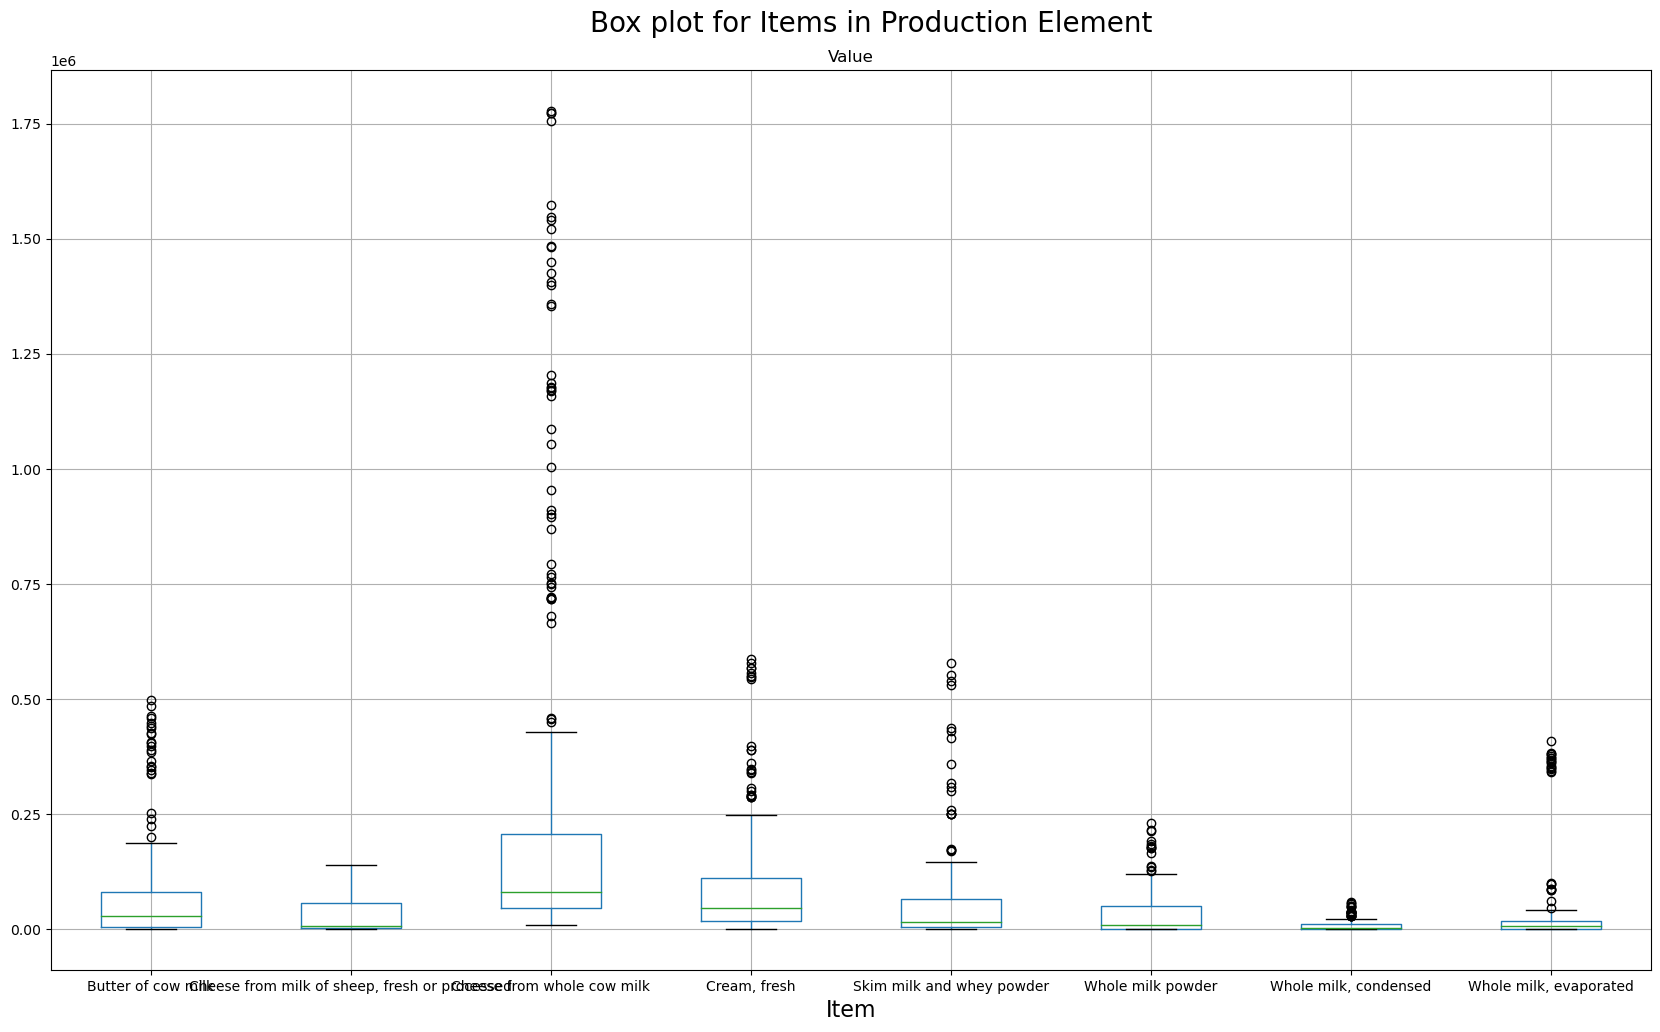

In [65]:
# Creates a boxplot to show an Element based on Item and Value
df_prod = df.loc[(df['Element'] == 'Production')]
df_prod.boxplot(column =['Value'], by = ['Item'], figsize =(20,12))

plt.suptitle("Box plot for Items in Production Element", fontsize=20, color="Black", x=0.51, y=0.95)
plt.xlabel("Item", fontsize=16)

plt.show()

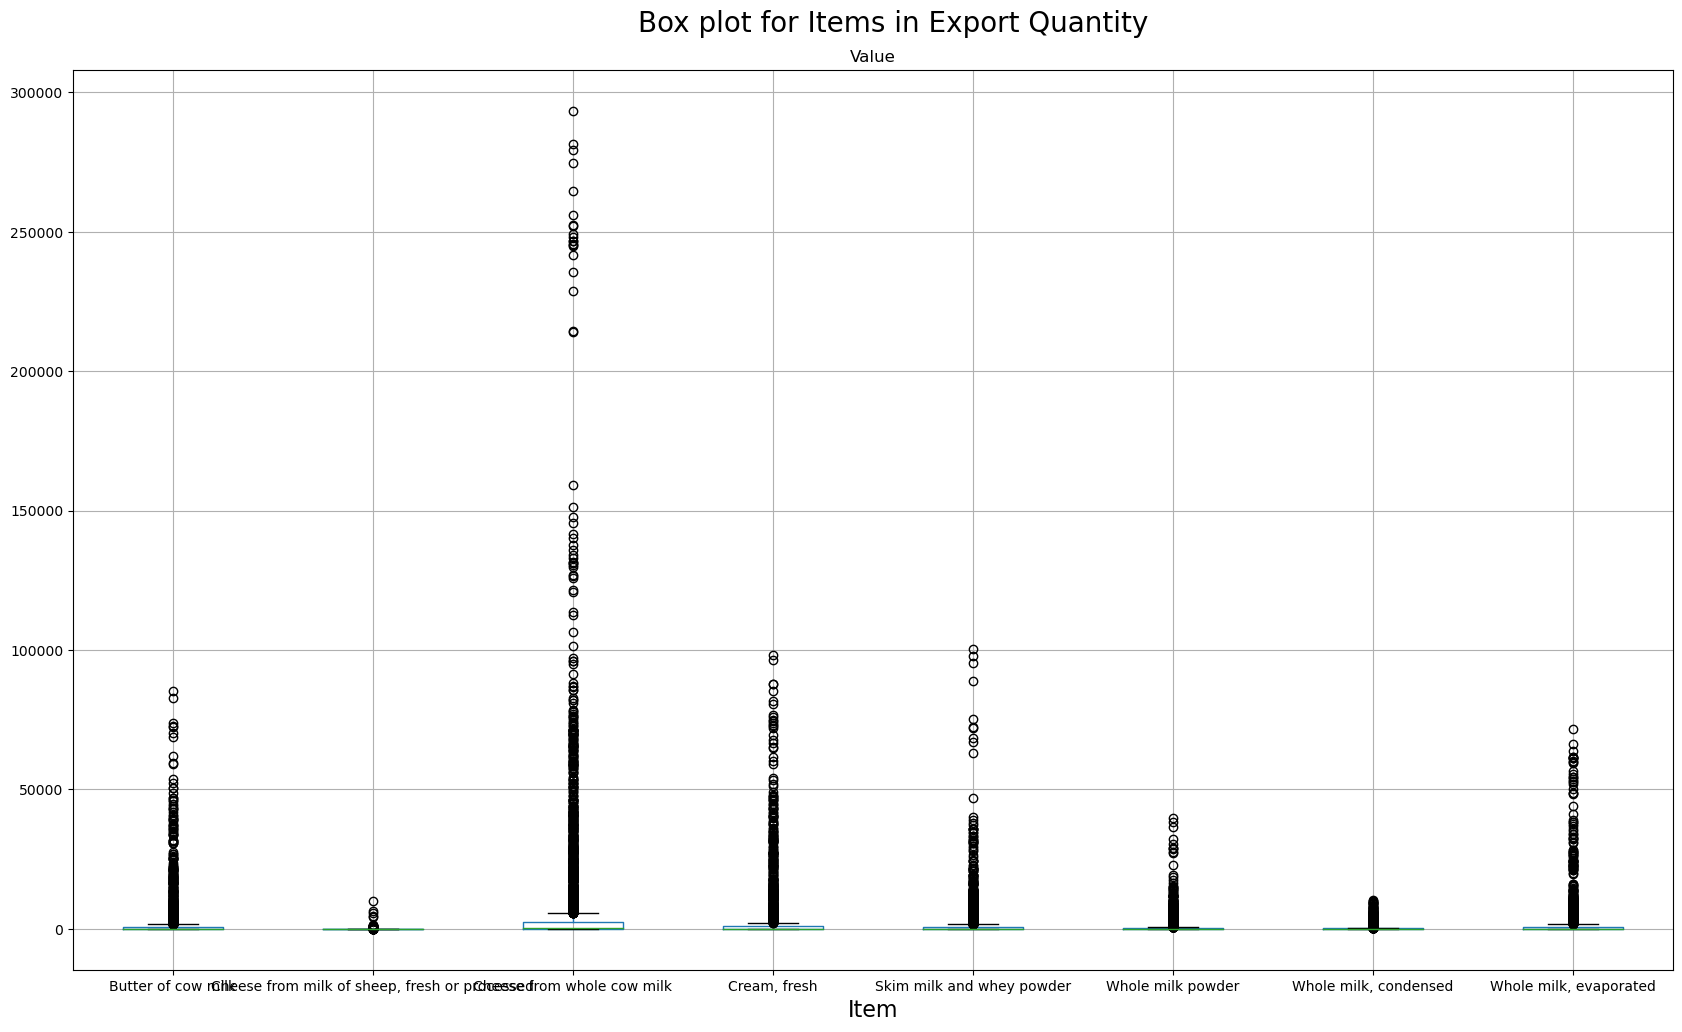

In [66]:
# Creates a boxplot to show an Element based on Item and Value
df_expq = df.loc[(df['Element'] == 'Export Quantity')]
df_expq.boxplot(column =['Value'], by = ['Item'], figsize =(20,12))

plt.suptitle("Box plot for Items in Export Quantity", fontsize=20, color="black", x=0.51, y=0.95)
plt.xlabel("Item", fontsize=16)

plt.show()

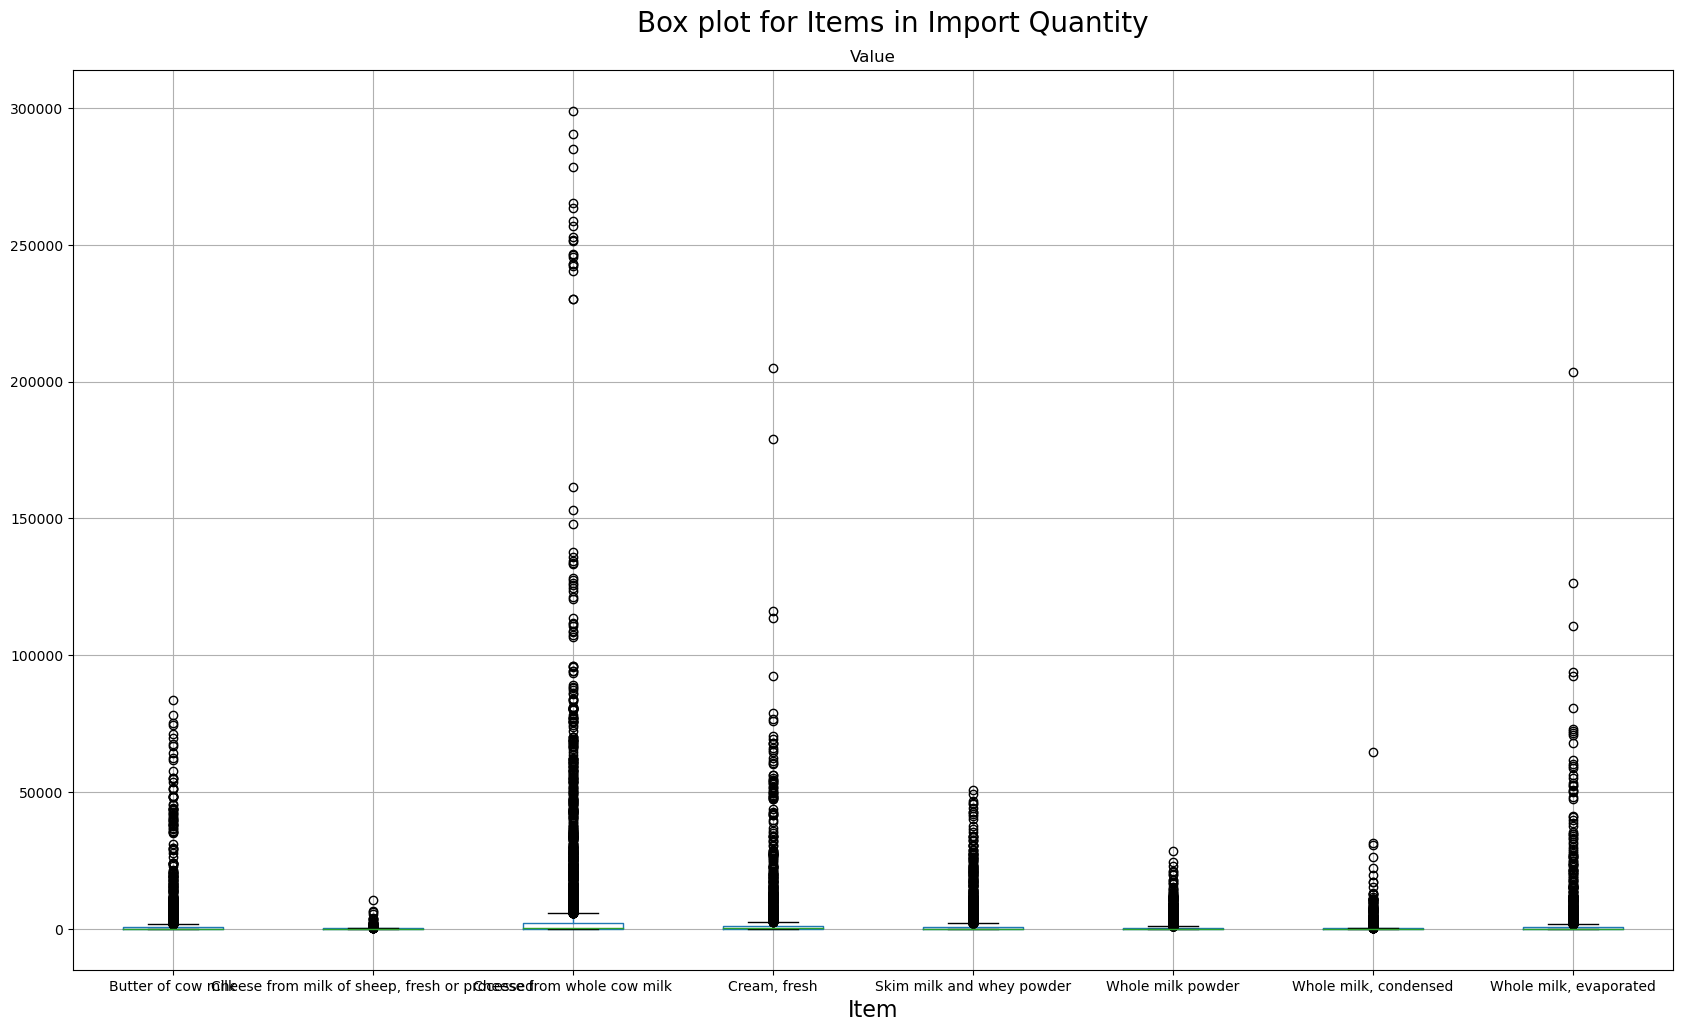

In [67]:
# Creates a boxplot to show an Element based on Item and Value
df_impq = df.loc[(df['Element'] == 'Import Quantity')]
df_impq.boxplot(column =['Value'], by = ['Item'], figsize =(20,12))

plt.suptitle("Box plot for Items in Import Quantity", fontsize=20, color="black", x=0.51, y=0.95)
plt.xlabel("Item", fontsize=16)

plt.show()

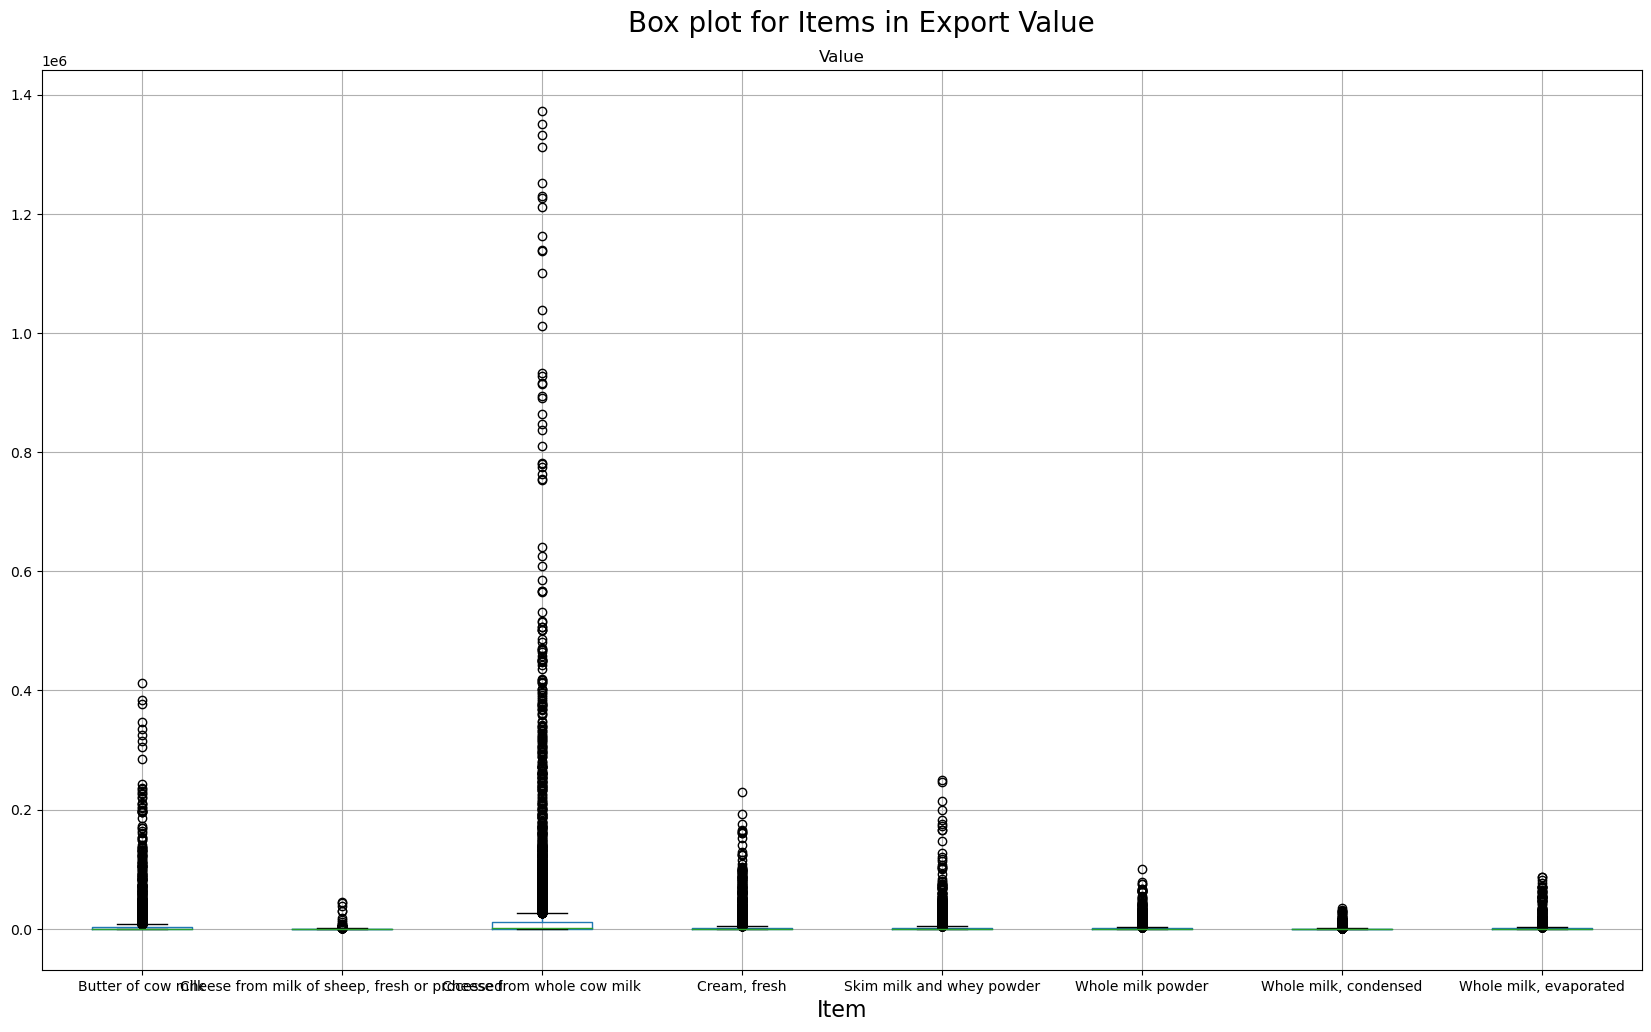

In [68]:
# Creates a boxplot to show an Element based on Item and Value
df_expval = df.loc[(df['Element'] == 'Export Value')]
df_expval.boxplot(column =['Value'], by = ['Item'], figsize =(20,12))

plt.suptitle("Box plot for Items in Export Value", fontsize=20, color="black", x=0.51, y=0.95)
plt.xlabel("Item", fontsize=16)

plt.show()

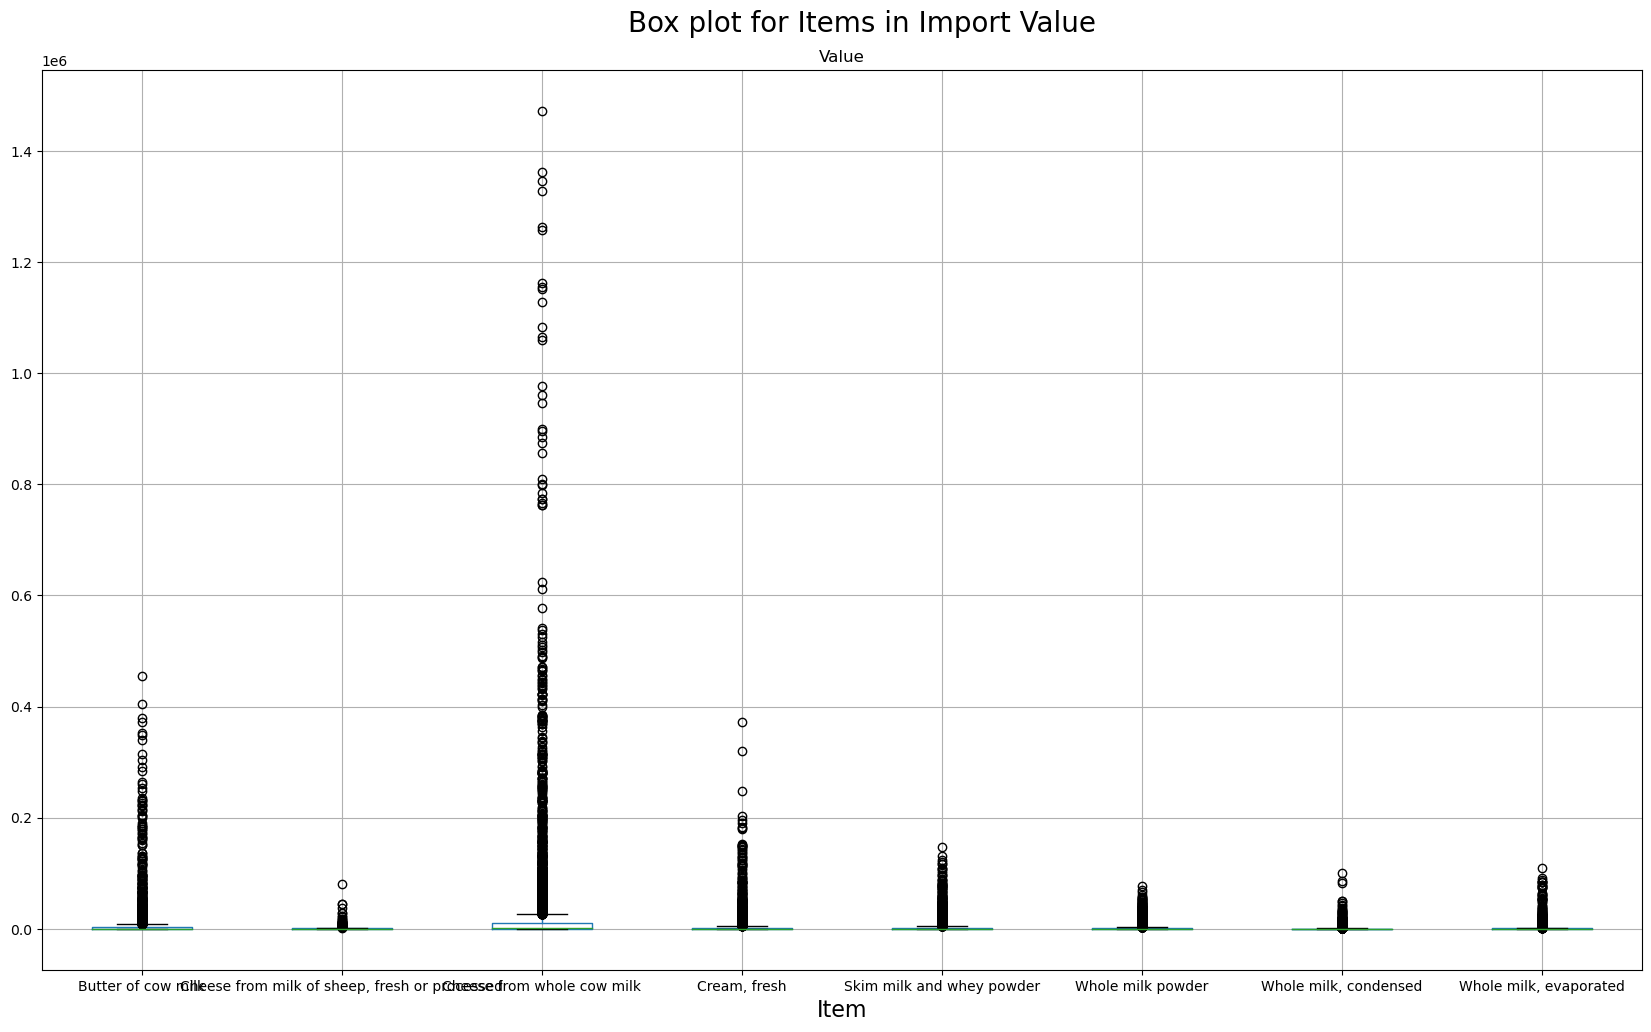

In [69]:
# Creates a boxplot to show an Element based on Item and Value
df_impval = df.loc[(df['Element'] == 'Import Value')]
df_impval.boxplot(column =['Value'], by = ['Item'], figsize =(20,12))

plt.suptitle("Box plot for Items in Import Value", fontsize=20, color="black", x=0.51, y=0.95)
plt.xlabel("Item", fontsize=16)

plt.show()

array([[<AxesSubplot:xlabel='Area'>, <AxesSubplot:xlabel='Area'>],
       [<AxesSubplot:xlabel='Area'>, <AxesSubplot:xlabel='Area'>],
       [<AxesSubplot:xlabel='Area'>, <AxesSubplot:xlabel='Area'>],
       [<AxesSubplot:xlabel='Area'>, <AxesSubplot:xlabel='Area'>]],
      dtype=object)

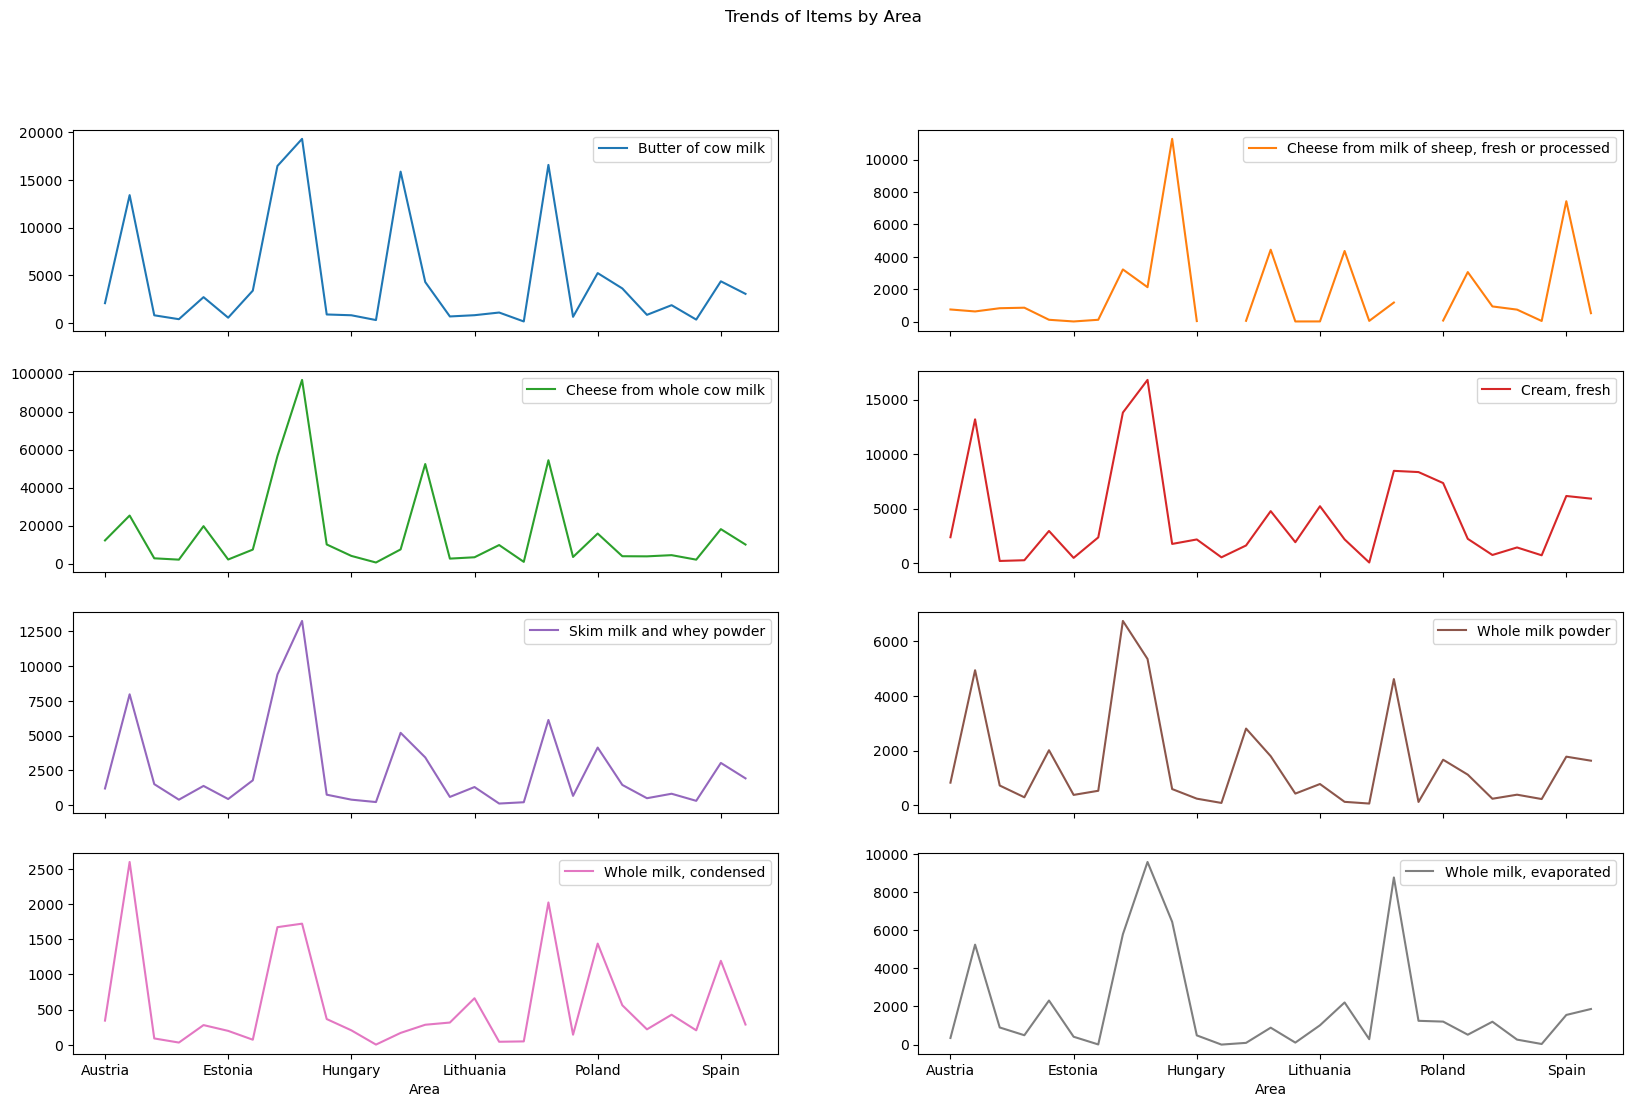

In [70]:
# This set of Plots is to show the trends of Items by Area
pd.pivot_table(df.reset_index(),
               index='Area', columns='Item', values='Value'
              ).plot(subplots=True, layout=(4,2), figsize =(20,12), title=('Trends of Items by Area'))

## Now the data has been cleaned as the Dataframe and I can see how the variables differ based on the different Elements, its time to split the data into  two dataframes - 
## One in Production and Quanitity type records when the value is in tonnes

In [71]:
# Group the data into groups 
grouped = df.groupby(['Unit', 'Element'])

# Defines a function to select the groups where the 'Feature' column equals 'tonnes'
def select_tonnes(group):
    if group['Unit'].iloc[0] == 'tonnes':
        return group

# Apply the function to each group
product = grouped.apply(select_tonnes)

# Drop the groups that were not selected
product = product.dropna()

# Reset the index of the resulting DataFrame
product = product.reset_index(drop=True)

# Print the resulting DataFrame
product.head()

Area          Element                Item  Year    Unit  Value  \
0  Austria  Export Quantity  Butter of cow milk  2012  tonnes    0.0   
1  Austria  Export Quantity  Butter of cow milk  2013  tonnes    0.0   
2  Austria  Export Quantity  Butter of cow milk  2014  tonnes    0.0   
3  Austria  Export Quantity  Butter of cow milk  2015  tonnes    0.0   
4  Austria  Export Quantity  Butter of cow milk  2016  tonnes   32.0   

  Flag Description  Origin  
0  Official figure  Europe  
1  Official figure  Europe  
2  Official figure  Europe  
3  Official figure  Europe  
4  Official figure  Europe

## Second by Export and Import Value in Dollars. 

In [72]:
# Group the data into groups
grouped = df.groupby(['Unit', 'Element'])

# Define a function to select the groups where the 'Feature' column equals '1000 US$'
def select_dollar(group):
    if group['Unit'].iloc[0] == '1000 US$':
        return group

# Apply the function to each group
transaction = grouped.apply(select_dollar)

# Drop the groups that were not selected
transaction = transaction.dropna()

# Reset the index of the resulting DataFrame
transaction = transaction.reset_index(drop=True)

# Print the resulting DataFrame
transaction.head()

Area       Element                Item  Year      Unit  Value  \
0  Austria  Export Value  Butter of cow milk  2012  1000 US$    1.0   
1  Austria  Export Value  Butter of cow milk  2013  1000 US$    0.0   
2  Austria  Export Value  Butter of cow milk  2014  1000 US$    0.0   
3  Austria  Export Value  Butter of cow milk  2015  1000 US$    0.0   
4  Austria  Export Value  Butter of cow milk  2016  1000 US$  190.0   

  Flag Description  Origin  
0  Official figure  Europe  
1  Official figure  Europe  
2  Official figure  Europe  
3  Official figure  Europe  
4  Official figure  Europe

In [73]:
# Saving the Dataframes into CSV files
transaction.to_csv('transaction.csv', index=False)
product.to_csv('product.csv', index=False)

In [74]:
# Here I used the describe function to see how the new column displayed Ireland versus Europe in import and export transactions
transaction.groupby('Origin')['Value'].describe()

count         mean           std  min    25%    50%     75%  \
Origin                                                                   
Europe   45240.0  9470.950796  50855.141354  0.0  23.00  281.0  2378.5   
Ireland   1208.0  7591.278146  25472.524581  0.0  69.75  432.5  3037.5   

               max  
Origin              
Europe   1472600.0  
Ireland   376678.0

In [76]:
# Here I group the data by Area and value then sort by the mean column to identify Ireland position on the list.
group_trans = transaction.groupby('Origin')['Value'].describe()

result_trans = group_trans.sort_values('mean', ascending=False)

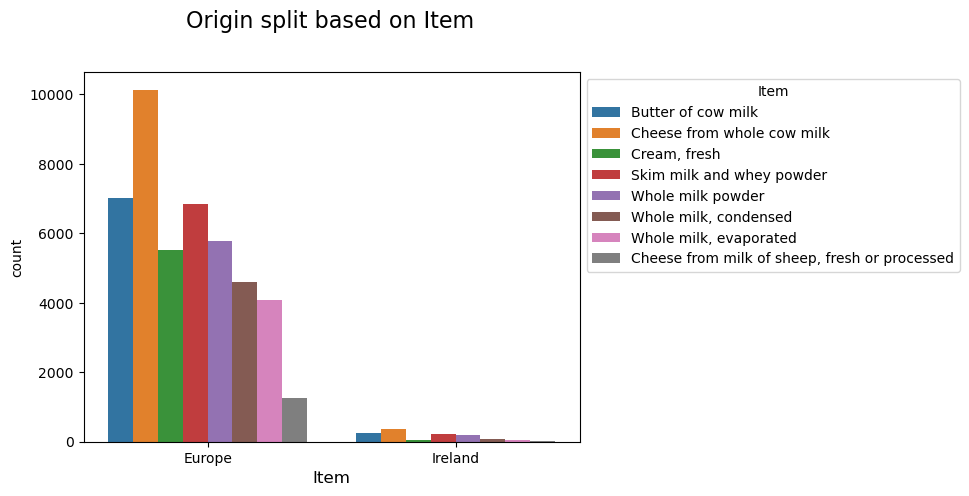

In [74]:
ax_trans = sns.countplot(x='Origin', hue='Item', data=transaction)

plt.suptitle("Origin split based on Item", fontsize=16, color="black", x=0.51, y=1.01)
plt.xlabel("Item", fontsize=12)
sns.move_legend(ax_trans, "upper left", bbox_to_anchor=(1, 1))

plt.show()

### Here I am going to repeat the analysis I did with the transaction dataset on the production Dataset

In [77]:
# Here I used the describe function to see how the new column displayed Ireland versus Europe terms of production volume
pro_element = product.loc[(product['Element'] == 'Production')]

pro_element.groupby('Origin')['Value'].describe()

count          mean            std  min     25%      50%        75%  \
Origin                                                                          
Europe   1436.0  90500.442201  218908.533354  0.0  2901.5  18553.5   70201.25   
Ireland    62.0  88311.596774   86614.870817  0.0  5700.0  54735.0  162802.50   

               max  
Origin              
Europe   1778365.0  
Ireland   278400.0

In [78]:
# Here I group the data by Area and value then sort by the mean column to identify Ireland position on the list.
group_prod = pro_element.groupby('Area')['Value'].describe()

result_prod = group_prod.sort_values('mean', ascending=False)

result_prod

count           mean            std      min        25%  \
Area                                                                   
Germany       58.0  469431.396552  420726.314511  33000.0  129700.00   
France        66.0  389277.000000  501294.756547   9558.0   66213.00   
Netherlands   52.0  289253.576923  290563.117098  50000.0   72749.75   
Italy         52.0  267754.211538  432187.370207      0.0    4759.00   
Poland        64.0  172212.203125  227459.188532      0.0    1515.50   
Denmark       58.0  109561.724138  127685.328349   1000.0   39675.00   
Ireland       62.0   88311.596774   86614.870817      0.0    5700.00   
Belgium       62.0   87675.532258   58222.048063  20460.0   47302.50   
Spain         70.0   64584.328571   56876.435335  13399.0   16904.75   
Finland       44.0   50971.000000   30664.569287   3606.0   21586.25   
Sweden        63.0   50101.428571   37155.807643      0.0   28890.00   
Austria       68.0   42664.573529   63213.565663      0.0    1494.25   
Greece        33.0   41717.757576   53660.231715   1000.0    1994.00   
Lithuania     59.0   26790.796610   23529.542532    760.0    7850.00   
Hungary       59.0   24420.237288   32404.865436     94.0    1276.50   
Norway        70.0   22265.400000   24806.203095    695.0    2405.25   
Romania       56.0   20963.714286   26323.560904    610.0    1900.00   
Portugal      75.0   19748.426667   17822.117920   1000.0    7819.50   
Bulgaria      51.0   14987.000000   27244.198618      0.0       0.00   
Latvia        59.0   13155.135593   15245.714820    280.0    2529.00   
Slovakia      64.0   10476.890625   13844.446422    521.0    1818.00   
Estonia       56.0    9341.232143   13449.804912      0.0    1520.00   
Luxembourg    24.0    8673.250000    9045.704463    184.0     619.00   
Croatia       50.0    6845.840000   12100.673517      0.0     257.75   
Slovenia      60.0    6049.083333    7507.251882      0.0       0.00   
Iceland       55.0    3292.054545    4128.138875      0.0     354.50   
Malta          8.0     160.250000       4.464143    150.0     161.00   

                  50%        75%        max  
Area                                         
Germany      392018.5  545750.00  1484200.0  
France       250000.0  388716.50  1778365.0  
Netherlands  138092.0  371305.25   953000.0  
Italy         94045.0  121000.00  1203760.0  
Poland        89540.5  202096.25   744000.0  
Denmark       60050.0   89400.00   457400.0  
Ireland       54735.0  162802.50   278400.0  
Belgium       70874.0  111967.50   246440.0  
Spain         42095.0  103383.00   205716.0  
Finland       51290.0   67258.75   108897.0  
Sweden        40000.0   87660.00   112700.0  
Austria        9710.0   64130.00   204798.0  
Greece         4200.0   46000.00   139488.0  
Lithuania     16202.0   44374.50    80300.0  
Hungary        5250.0   61250.00    87018.0  
Norway        14550.0   35791.00    80166.0  
Romania       10673.0   24569.75    94677.0  
Portugal      11915.0   26459.00    65395.0  
Bulgaria       1056.0    9139.50    89780.0  
Latvia         5069.0   31050.00    47420.0  
Slovakia       4730.0   11250.00    46838.0  
Estonia        4650.0    8012.25    45500.0  
Luxembourg     5181.0   18712.50    22800.0  
Croatia         651.0    4777.00    35670.0  
Slovenia       2654.0   14324.00    22742.0  
Iceland        2000.0    3140.00    13552.0  
Malta           162.0     162.00      164.0

In [86]:
# This graph is to show the Origin split based on the source element
#average_element = product['Element'].mean()

ax_prod = sns.barplot(x='Origin', hue='Element', data=product)

plt.suptitle("Origin split based on Element", fontsize=16, color="black", x=0.51, y=1.01)
plt.xlabel("Item", fontsize=12)
sns.move_legend(ax_prod, "upper left", bbox_to_anchor=(1, 1))

plt.show()

TypeError: Horizontal orientation requires numeric `x` variable.

## Now we have a clear understanding of the data, its features, structure and completed descriptive statistics on it. I am going to begin feature engineering and start with removing the outliers.

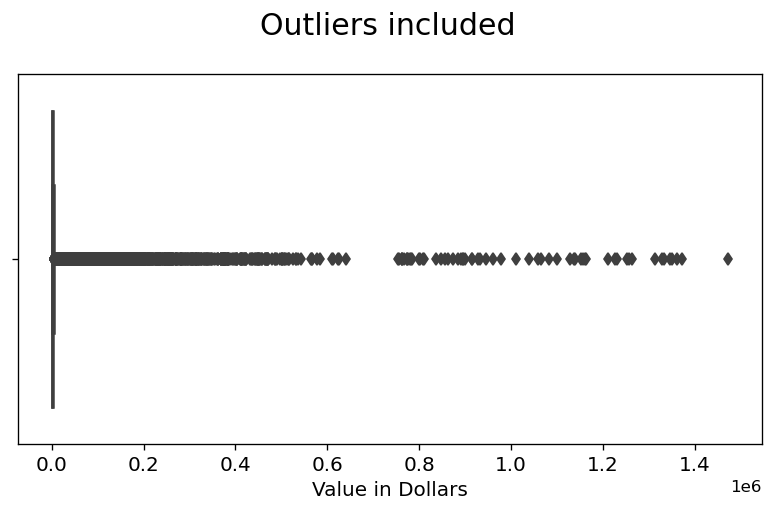

In [78]:
# This box plots shows the boxplot for the transaction dataframe, there is clear evidence of significant outliers in the data

plt.figure(figsize=(8, 4), dpi=120)

sns.boxplot(data=transaction, x='Value', hue='Element')

plt.suptitle("Outliers included", fontsize=18, color="black", x=0.51, y=1.01)
plt.xlabel("Value in Dollars", fontsize=12)
plt.xticks(fontsize=12)

plt.show()

In [79]:
# This code block will create the quantile ranges and create the IQR function to help with removing the outliers later
Q1 = transaction.loc[transaction['Origin'] == 'Europe'].quantile(0.25)
Q3 = transaction.loc[transaction['Origin'] == 'Europe'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

Year        5.0
Value    2355.5
dtype: float64


In [80]:
# This completed the outlier removal and present the shape of the changed data
transaction = transaction[~((transaction < (Q1-1.5 * IQR)) |(transaction > (Q3 + 1.5 * IQR))).any(axis=1)]
transaction.shape

/var/folders/4z/t6d1mv855tg3_0k261zlc6z00000gr/T/ipykernel_53526/3443205546.py:2: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



(38851, 8)

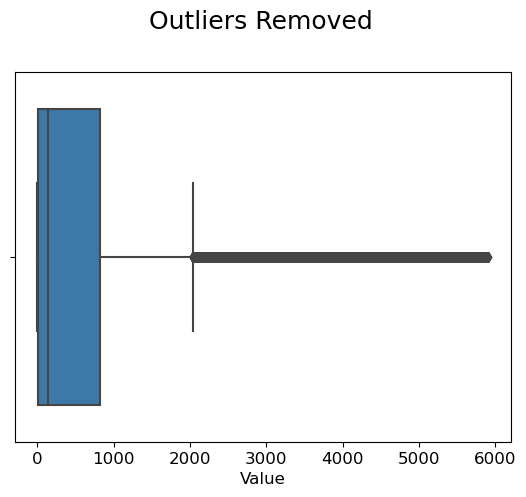

In [81]:
# This box plots shows the boxplot for the updated transaction dataframe, 

sns.boxplot(data=transaction, x='Value', color="#2b7bba")

plt.suptitle("Outliers Removed", fontsize=18, color="black", x=0.51, y=1.01)
plt.xlabel("Value", fontsize=12)
plt.xticks(fontsize=12)

plt.show()

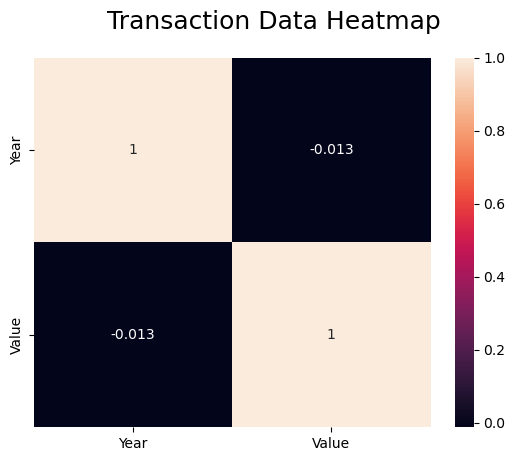

In [82]:
# This code will create the corelation function and plot the heatmap for the new transaction data
# This is good to see if there is any correlation between my numerical data and based on the result, its negatively correlated
corelation = transaction.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

plt.suptitle("Transaction Data Heatmap", fontsize=18, color="black")

plt.show()

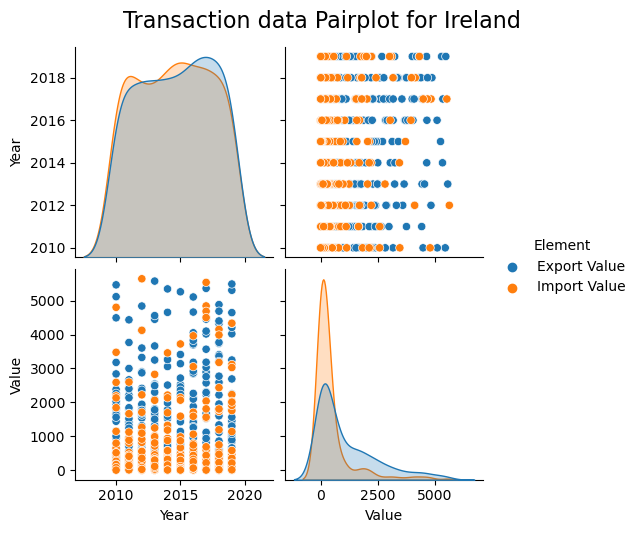

In [83]:
# I am using Pairplot here to further identify any additonal correlations in the data for Ireland

ax_ptrans = sns.pairplot(transaction.loc[transaction['Origin'] == 'Ireland'], hue='Element')

plt.suptitle("Transaction data Pairplot for Ireland", fontsize=16, color="black", x=0.51, y=1.05)

plt.show()

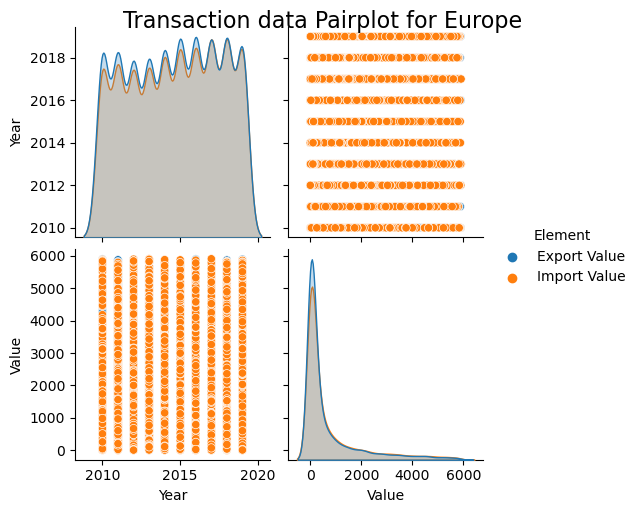

In [84]:
# I am using Pairplot here to further identify any additonal correlations in the data for Europe

ax_ptrans = sns.pairplot(transaction.loc[transaction['Origin'] == 'Europe'], hue='Element')

plt.suptitle("Transaction data Pairplot for Europe", fontsize=16, color="black", x=0.51, y=1.01)

plt.show()

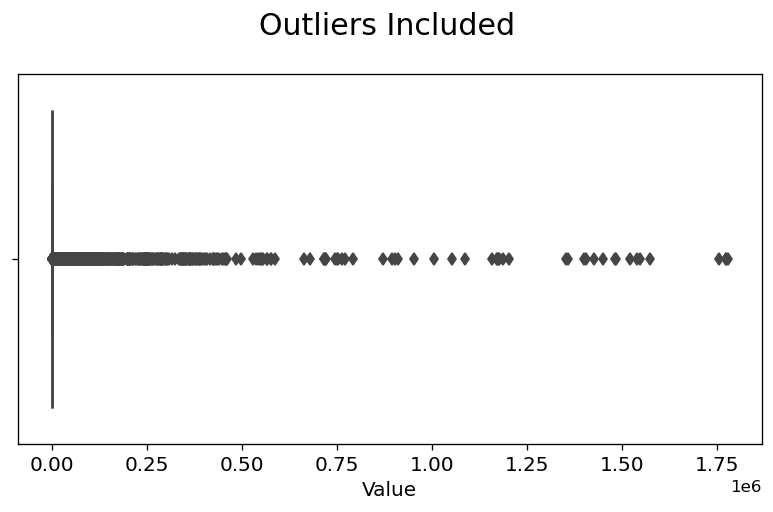

In [85]:
# This box plots shows the boxplot for the product dataframe, there is clear evidence of significant outliers in the data

plt.figure(figsize=(8, 4), dpi=120)

sns.boxplot(data=product, x='Value', color="#2b7bba")

plt.suptitle("Outliers Included", fontsize=18, color="black", x=0.51, y=1.01)
plt.xlabel("Value", fontsize=12)
plt.xticks(fontsize=12)

plt.show()

In [86]:
# This code block will create the quantile ranges and create the IQR function to help with removing the outliers later
Q1 = product.loc[product['Origin'] == 'Europe'].quantile(0.25)
Q3 = product.loc[product['Origin'] == 'Europe'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year       5.0
Value    879.0
dtype: float64


In [87]:
# This completed the outlier removal and present the shape of the changed data

product = product[~((product < (Q1-1.5 * IQR)) |(product > (Q3 + 1.5 * IQR))).any(axis=1)]
product.shape

/var/folders/4z/t6d1mv855tg3_0k261zlc6z00000gr/T/ipykernel_53526/1052711605.py:3: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



(39829, 8)

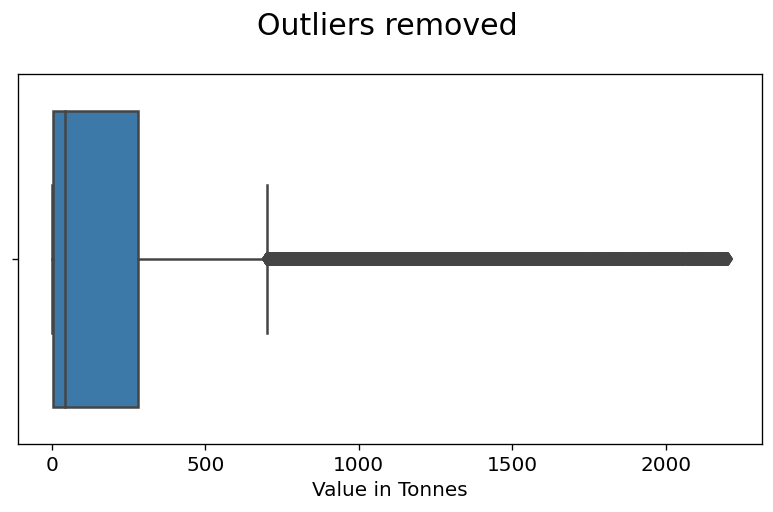

In [88]:
# This box plots shows the boxplot for the updated product dataframe, 

plt.figure(figsize=(8, 4), dpi=120)

sns.boxplot(data=product, x='Value', color="#2b7bba")

plt.suptitle("Outliers removed", fontsize=18, color="black", x=0.51, y=1.01)
plt.xlabel("Value in Tonnes", fontsize=12)
plt.xticks(fontsize=12)

plt.show()

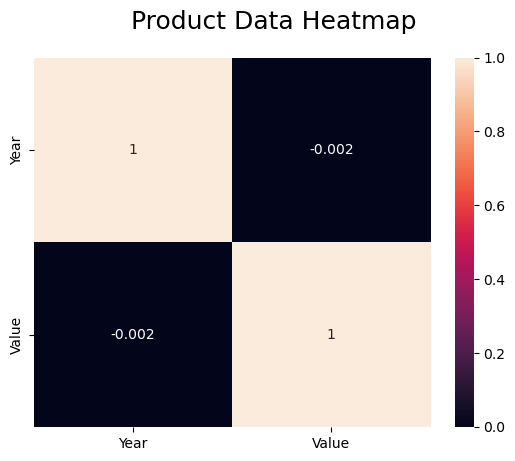

In [89]:
# This code will create the corelation function and plot the heatmap for the new transaction data
# This is good to see if there is any correlation between my numerical data and based on the result, its negatively correlated

corelation = product.corr()

sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

plt.suptitle("Product Data Heatmap", fontsize=18, color="black")

plt.show()

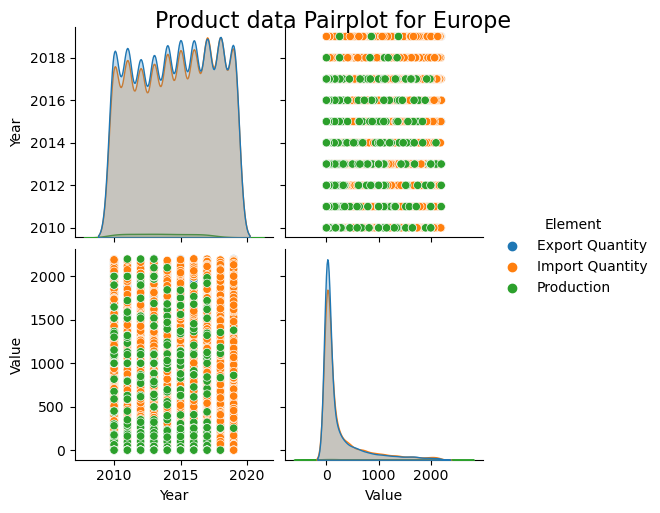

In [90]:
# I am using Pairplot here to further identify any additonal correlations in the data for Europe

ax_pprod = sns.pairplot(product.loc[product['Origin'] == 'Europe'], hue='Element')

plt.suptitle("Product data Pairplot for Europe", fontsize=16, color="black", x=0.51, y=1.01)

plt.show()

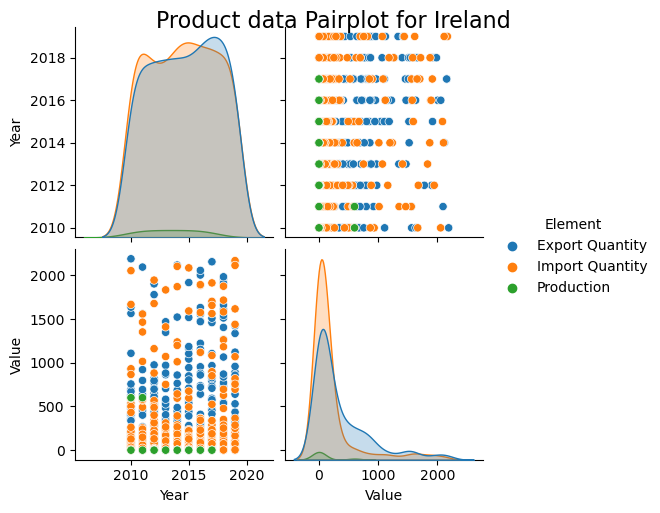

In [91]:
# I am using Pairplot here to further identify any additonal correlations in the data for Ireland

ax_pprod = sns.pairplot(product.loc[product['Origin'] == 'Ireland'], hue='Element')

plt.suptitle("Product data Pairplot for Ireland", fontsize=16, color="black", x=0.51, y=1.01)

plt.show()

## Now we completed the EDA on the data, I am going to visualise data in a Choropleth and create a Dashboard to display the data so far.

In [92]:
# Here I pull in my Europe Geo data for the Map to use to plot. 
euro_countries = json.load(open("geo.json", "r"))

In [93]:
# Here I am calling the first entry to checkt he data contained in the file is pulling in correctly
euro_countries['features'][0]['properties']

{'featurecla': 'Admin-0 country',
 'scalerank': 1,
 'labelrank': 2,
 'sovereignt': 'France',
 'sov_a3': 'FR1',
 'adm0_dif': 1,
 'level': 2,
 'type': 'Country',
 'tlc': '1',
 'admin': 'France',
 'adm0_a3': 'FRA',
 'geou_dif': 0,
 'geounit': 'France',
 'gu_a3': 'FRA',
 'su_dif': 0,
 'subunit': 'France',
 'su_a3': 'FRA',
 'brk_diff': 0,
 'name': 'France',
 'name_long': 'France',
 'brk_a3': 'FRA',
 'brk_name': 'France',
 'brk_group': None,
 'abbrev': 'Fr.',
 'postal': 'F',
 'formal_en': 'French Republic',
 'formal_fr': None,
 'name_ciawf': 'France',
 'note_adm0': None,
 'note_brk': None,
 'name_sort': 'France',
 'name_alt': None,
 'mapcolor7': 7,
 'mapcolor8': 5,
 'mapcolor9': 9,
 'mapcolor13': 11,
 'pop_est': 67059887,
 'pop_rank': 16,
 'pop_year': 2019,
 'gdp_md': 2715518,
 'gdp_year': 2019,
 'economy': '1. Developed region: G7',
 'income_grp': '1. High income: OECD',
 'fips_10': 'FR',
 'iso_a2': '-99',
 'iso_a2_eh': 'FR',
 'iso_a3': '-99',
 'iso_a3_eh': 'FRA',
 'iso_n3': '-99',
 'iso_n3

In [94]:
# Here I am connecting my Geo data to the map function for use later
country_id_map = {}
for feature in euro_countries["features"]:
    feature["id"] = feature["properties"]["su_a3"]
    country_id_map[feature["properties"]["name"]] = feature["id"]

In [95]:
# This add the "id" column to the data set and matchs it based on area within the geodata with a lambda function
transaction["id"] = transaction["Area"].apply(lambda x: country_id_map[x])
transaction.head()

Area       Element                Item  Year      Unit  Value  \
0  Austria  Export Value  Butter of cow milk  2012  1000 US$    1.0   
1  Austria  Export Value  Butter of cow milk  2013  1000 US$    0.0   
2  Austria  Export Value  Butter of cow milk  2014  1000 US$    0.0   
3  Austria  Export Value  Butter of cow milk  2015  1000 US$    0.0   
4  Austria  Export Value  Butter of cow milk  2016  1000 US$  190.0   

  Flag Description  Origin   id  
0  Official figure  Europe  AUT  
1  Official figure  Europe  AUT  
2  Official figure  Europe  AUT  
3  Official figure  Europe  AUT  
4  Official figure  Europe  AUT

In [96]:
# This add the "id" column to the data set and matchs it based on area within the geodata with a lambda function
product["id"] = product["Area"].apply(lambda x: country_id_map[x])
product.head()

Area          Element                Item  Year    Unit  Value  \
0  Austria  Export Quantity  Butter of cow milk  2012  tonnes    0.0   
1  Austria  Export Quantity  Butter of cow milk  2013  tonnes    0.0   
2  Austria  Export Quantity  Butter of cow milk  2014  tonnes    0.0   
3  Austria  Export Quantity  Butter of cow milk  2015  tonnes    0.0   
4  Austria  Export Quantity  Butter of cow milk  2016  tonnes   32.0   

  Flag Description  Origin   id  
0  Official figure  Europe  AUT  
1  Official figure  Europe  AUT  
2  Official figure  Europe  AUT  
3  Official figure  Europe  AUT  
4  Official figure  Europe  AUT

In [129]:
# This code populates and creates the Choropleth map for the transaction data
total = transaction['Value'].mean()


fig = px.choropleth_mapbox(
    transaction,
    locations="id",
    geojson=euro_countries,
    color="Element",
    color_continuous_midpoint=total,
    hover_name="Area",
    title="Highest Value Product by Combined Import & Export Value",
    mapbox_style="carto-positron",
    center={"lat": 52, "lon": 16},
    zoom=3,
    opacity=0.5,
)
fig.update_geos(fitbounds="locations", visible=False)

#fig.show()

In [98]:
# This code populates and creates the Choropleth map for the product data
total2 = product['Value'].sum()


fig = px.choropleth_mapbox(
    product,
    locations="id",
    geojson=euro_countries,
    color="Item",
    color_continuous_midpoint=total,
    hover_name="Area",
    title="Highest Value Product by Average Tonnes",
    mapbox_style="carto-positron",
    center={"lat": 52, "lon": 16},
    zoom=3,
    opacity=0.5,
)
fig.update_geos(fitbounds="locations", visible=False)

fig.show()

In [104]:
# This code is to create my interactive Dashboard based on the transaction data
idf = transaction.interactive()

# Define Panel widgets
years = pn.widgets.IntSlider(name='Years', start=2010, end=2019, step=1)
countries = pn.widgets.ToggleGroup(
    name='Countries',
    options=['Europe', 'Ireland'], 
    value=['Europe', 'Ireland'],
    button_type='success')
flag = pn.widgets.ToggleGroup(
    name='Value Source',
    options=['Export Value', 'Import Value'], 
    value=['Export Value', 'Import Value'],
    button_type='success')
yaxis = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=['Value', 'Year'],
    button_type='success'
)

# Combine pipeline and widgets
ipipeline1 = (
    idf[
        (idf.Year == years) & 
        (idf.Origin.isin(countries)) & 
        (idf.Element.isin(flag))
    ]
    .groupby(['Origin', 'Item'])[yaxis].sum()
    .to_frame()
    .reset_index()
    .sort_values(by='Item')  
    .reset_index(drop=True)
)

# Pipe to hvplot
ihvplot = ipipeline1.hvplot(x='Item', y=yaxis, by='Origin', color=["#f29559", "#b8b08d", "#283845"], line_width=6, height=400)

# Layout using Template
template = pn.template.FastListTemplate(
    title='Import & Export values for Ireland & Europe', 
    sidebar=[years, 'Origin', countries, 'Value Source', flag],
    main=[ihvplot.panel()],
    accent_base_color="#f2d492",
    header_background="#202c39",
)
template.show()

Launching server at http://localhost:61799


In [100]:
# This code creates another interactive table to show the values of the transaction data in a table format. Point: I wanted to add it to the interactive dashboard but I couldnt get it to work.
itable = ipipeline1.pipe(pn.widgets.Tabulator, pagination='remote', page_size=10, sizing_mode='stretch_width')
itable

Traceback (most recent call last):
 File "/Users/somsteph/opt/anaconda3/lib/python3.9/site-packages/pyviz_comms/__init__.py", line 325, in _handle_msg
 self._on_msg(msg)
 File "/Users/somsteph/opt/anaconda3/lib/python3.9/site-packages/panel/viewable.py", line 292, in _on_msg
 doc.unhold()
 File "/Users/somsteph/opt/anaconda3/lib/python3.9/site-packages/bokeh/document/document.py", line 799, in unhold
 self.callbacks.unhold()
 File "/Users/somsteph/opt/anaconda3/lib/python3.9/site-packages/bokeh/document/callbacks.py", line 396, in unhold
 self.trigger_on_change(event)
 File "/Users/somsteph/opt/anaconda3/lib/python3.9/site-packages/bokeh/document/callbacks.py", line 373, in trigger_on_change
 invoke_with_curdoc(doc, event.callback_invoker)
 File "/Users/somsteph/opt/anaconda3/lib/python3.9/site-packages/bokeh/document/callbacks.py", line 408, in invoke_with_curdoc
 return f()
 File "/Users/somsteph/opt/anaconda3/lib/python3.9/site-packages/bokeh/util/callback_manager.py", line 191, in invoke
 callback(attr, old, new)
 File "/Users/somsteph/opt/anaconda3/lib/python3.9/site-packages/panel/reactive.py", line 392, in _comm_change
 self._schedule_change(doc, comm)
 File "/Users/somsteph/opt/anaconda3/lib/python3.9/site-packages/panel/reactive.py", line 376, in _schedule_change
 self._change_event(doc)
 File "/Users/somsteph/opt/anaconda3/lib/python3.9/site-packages/panel/reactive.py", line 370, in _change_event
 self._process_events(events)
 File "/Users/somsteph/opt/anaconda3/lib/python3.9/site-packages/panel/reactive.py", line 315, in _process_events
 self.param.update(**self_events)
 File "/Users/somsteph/opt/anaconda3/lib/python3.9/site-packages/param/parameterized.py", line 1877, in update
 self_._batch_call_watchers()
 File "/Users/somsteph/opt/anaconda3/lib/python3.9/site-packages/param/parameterized.py", line 2038, in _batch_call_watchers
 self_._execute_watcher(watcher, events)
 File "/Users/somsteph/opt/anaconda3/lib/python3.9/site-packages/param/parameterized.py", line 2000, in _execute_watcher
 watcher.fn(*args, **kwargs)
 File "/Users/somsteph/opt/anaconda3/lib/python3.9/site-packages/panel/param.py", line 794, in _replace_pane
 new_object = self.eval(self.object)
 File "/Users/somsteph/opt/anaconda3/lib/python3.9/site-packages/panel/param.py", line 777, in eval
 return function(*args, **kwargs)
 File "/Users/somsteph/opt/anaconda3/lib/python3.9/site-packages/param/parameterized.py", line 387, in _depends
 return func(*args, **kw)
 File "/Users/somsteph/opt/anaconda3/lib/python3.9/site-packages/hvplot/interactive.py", line 149, in evaluate
 obj = transform.apply(ds, keep_index=True, compute=False)
 File "/Users/somsteph/opt/anaconda3/lib/python3.9/site-packages/holoviews/util/transform.py", line 737, in apply
 data = self._apply_fn(dataset, data, fn, fn_name, args,
 File "/Users/somsteph/opt/anaconda3/lib/python3.9/site-packages/holoviews/util/transform.py", line 635, in _apply_fn
 raise e
 File "/Users/somsteph/opt/anaconda3/lib/python3.9/site-packages/holoviews/util/transform.py", line 629, in _apply_fn
 data = method(*args, **kwargs)
 File "/Users/somsteph/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py", line 7721, in groupby
 return DataFrameGroupBy(
 File "/Users/somsteph/opt/anaconda3/lib/python3.9/site-packages/pandas/core/groupby/groupby.py", line 882, in __init__
 grouper, exclusions, obj = get_grouper(
 File "/Users/somsteph/opt/anaconda3/lib/python3.9/site-packages/pandas/core/groupby/grouper.py", line 882, in get_grouper
 raise KeyError(gpr)
KeyError: 'Item'
 


 Traceback (most recent call last):
 File "/Users/somsteph/opt/anaconda3/lib/python3.9/site-packages/pyviz_comms/__init__.py", line 325, in _handle_msg
 self._on_msg(msg)
 File "/Users/somsteph/opt/anaconda3/lib/python3.9/site-packages/panel/viewable.py", line 292, in _on_msg
 doc.unhold()
 File "/Users/somsteph/opt/anaconda3/lib/python3.9/site-packages/bokeh/document/document.py", line 799, in unhold
 self.callbacks.unhold()
 File "

In [101]:
# This code is to create my interactive Dashboard based on the product data
idf2 = product.interactive()

# Define Panel widgets
years = pn.widgets.IntSlider(name='Years', start=2010, end=2019, step=1)
countries = pn.widgets.ToggleGroup(
    name='Countries',
    options=['Europe', 'Ireland'], 
    value=['Europe', 'Ireland'],
    button_type='success')
flag = pn.widgets.ToggleGroup(
    name='Value Source',
    options=['Export Quantity', 'Import Quantity', 'Production'], 
    value=['Export Quantity', 'Import Quantity', 'Production'],
    button_type='success')
yaxis = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=['Value', 'Year'],
    button_type='success'
)

# Combine pipeline and widgets
ipipeline2 = (
    idf2[
        (idf2.Year == years) & 
        (idf2.Origin.isin(countries)) & 
        (idf2.Element.isin(flag))
    ]
    .groupby(['Origin', 'Item'])[yaxis].sum()
    .to_frame()
    .reset_index()
    .sort_values(by='Item')  
    .reset_index(drop=True)
)

# Pipe to hvplot
ihvplot = ipipeline2.hvplot(x='Item', y=yaxis, by='Origin', color=["#f29559", "#b8b08d", "#283845"], line_width=6, height=400)

# Layout using Template
template2 = pn.template.FastListTemplate(
    title='Import & Export values for Ireland & Europe', 
    sidebar=[years, 'Origin', countries, 'Value Source', flag],
    main=[ihvplot.panel()],
    accent_base_color="#f2d492",
    header_background="#202c39",
)
template2.show()

Launching server at http://localhost:62731


In [102]:
# This code creates another interactive table to show the values of the product data in a table format. Point: I wanted to add it to the interactive dashboard but I couldnt get it to work.

itable = ipipeline2.pipe(pn.widgets.Tabulator, pagination='remote', page_size=10, sizing_mode='stretch_width')
itable

In [103]:
# Here I have used to pivot to the differences in the Element type, Production is considerable larger that other values in the dataframe
# so i am going to use that data for my ML feature engineering and Statistics 
dft1 = pd.pivot_table(df, index=['Year', 'Area', 'Item'], columns=['Element'])
dft1

Value  \
Element                                                    Export Quantity   
Year Area    Item                                                            
2010 Austria Butter of cow milk                                 120.500000   
             Cheese from milk of sheep, fresh or processed        4.111111   
             Cheese from whole cow milk                        2660.615385   
             Cream, fresh                                      1001.266667   
             Skim milk and whey powder                          148.937500   
...                                                                    ...   
2019 Sweden  Cream, fresh                                        18.000000   
             Skim milk and whey powder                         1127.666667   
             Whole milk powder                                  151.538462   
             Whole milk, condensed                                0.200000   
             Whole milk, evaporated                            1722.285714   

                                                                          \
Element                                                     Export Value   
Year Area    Item                                                          
2010 Austria Butter of cow milk                               677.333333   
             Cheese from milk of sheep, fresh or processed     23.000000   
             Cheese from whole cow milk                     14460.230769   
             Cream, fresh                                    1616.200000   
             Skim milk and whey powder                        455.062500   
...                                                                  ...   
2019 Sweden  Cream, fresh                                      35.750000   
             Skim milk and whey powder                       2441.875000   
             Whole milk powder                                591.692308   
             Whole milk, condensed                              1.200000   
             Whole milk, evaporated                          1204.571429   

                                                                            \
Element                                                    Import Quantity   
Year Area    Item                                                            
2010 Austria Butter of cow milk                                1106.692308   
             Cheese from milk of sheep, fresh or processed      126.666667   
             Cheese from whole cow milk                        3414.913043   
             Cream, fresh                                      1040.888889   
             Skim milk and whey powder                         1627.000000   
...                                                                    ...   
2019 Sweden  Cream, fresh                                      2072.600000   
             Skim milk and whey powder                          639.833333   
             Whole milk powder                                  460.555556   
             Whole milk, condensed                              221.571429   
             Whole milk, evaporated                             401.142857   

                                                                          \
Element                                                     Import Value   
Year Area    Item                                                          
2010 Austria Butter of cow milk                              5386.846154   
             Cheese from milk of sheep, fresh or processed   1002.833333   
             Cheese from whole cow milk                     16623.521739   
             Cream, fresh                                    2132.888889   
             Skim milk and whey powder                       3677.181818   
...                                                                  ...   
2019 Sweden  Cream, fresh                                    4557.800000   
             Skim milk and whey powder                    

## Statistics time

t-test: A t-test is used to compare the means of two groups. It can be used to determine whether the means of two groups are significantly different from each other.

ANOVA: Analysis of variance (ANOVA) is used to compare the means of three or more groups. It can be used to determine whether the means of the groups are significantly different from each other.

Mann-Whitney U test

friedmanchisquare

Chi-square test: A chi-square test is used to compare observed data to expected data. It is often used to determine whether there is a significant relationship between two categorical variables.

Pearson's correlation coefficient: Pearson's correlation coefficient is used to measure the strength and direction of the relationship between two continuous variables. It can be used to determine whether there is a significant relationship between the variables.

Linear regression: Linear regression is used to predict the value of a continuous outcome variable based on the value of one or more predictor variables. It can be used to determine the strength and direction of the relationship between the predictor and outcome variables.
    

In [104]:
stratify_col = 'Element'

# Group the data by the stratifying column
grouped = df.groupby(stratify_col)

# Pick a random sample of 50 rows from each group
sample = grouped.apply(lambda x: x.sample(n=7, random_state=42))

# Reset the index of the resulting DataFrame
sample = sample.reset_index(drop=True)

# Print the sample
sample.head(100)


Area          Element                        Item  Year      Unit  \
0       Austria  Export Quantity  Cheese from whole cow milk  2017    tonnes   
1      Bulgaria  Export Quantity          Butter of cow milk  2012    tonnes   
2        Sweden  Export Quantity           Whole milk powder  2014    tonnes   
3   Netherlands  Export Quantity                Cream, fresh  2014    tonnes   
4       Denmark  Export Quantity                Cream, fresh  2012    tonnes   
5       Germany  Export Quantity           Whole milk powder  2019    tonnes   
6        Poland  Export Quantity       Whole milk, condensed  2015    tonnes   
7       Austria     Export Value  Cheese from whole cow milk  2017  1000 US$   
8      Bulgaria     Export Value          Butter of cow milk  2012  1000 US$   
9        Sweden     Export Value           Whole milk powder  2014  1000 US$   
10  Netherlands     Export Value                Cream, fresh  2014  1000 US$   
11      Denmark     Export Value                Cream, fresh  2012  1000 US$   
12      Germany     Export Value           Whole milk powder  2019  1000 US$   
13       Poland     Export Value       Whole milk, condensed  2015  1000 US$   
14        Spain  Import Quantity          Butter of cow milk  2013    tonnes   
15      Hungary  Import Quantity      Whole milk, evaporated  2015    tonnes   
16       Greece  Import Quantity                Cream, fresh  2014    tonnes   
17      Germany  Import Quantity       Whole milk, condensed  2015    tonnes   
18   Luxembourg  Import Quantity          Butter of cow milk  2019    tonnes   
19  Netherlands  Import Quantity  Cheese from whole cow milk  2019    tonnes   
20       France  Import Quantity  Cheese from whole cow milk  2010    tonnes   
21        Spain     Import Value          Butter of cow milk  2013  1000 US$   
22      Hungary     Import Value      Whole milk, evaporated  2015  1000 US$   
23       Greece     Import Value                Cream, fresh  2014  1000 US$   
24      Germany     Import Value       Whole milk, condensed  2015  1000 US$   
25   Luxembourg     Import Value          Butter of cow milk  2019  1000 US$   
26  Netherlands     Import Value  Cheese from whole cow milk  2019  1000 US$   
27       France     Import Value  Cheese from whole cow milk  2010  1000 US$   
28       Norway       Production       Whole milk, condensed  2017    tonnes   
29     Slovenia       Production          Butter of cow milk  2010    tonnes   
30       Sweden       Production          Butter of cow milk  2010    tonnes   
31       Sweden       Production       Whole milk, condensed  2014    tonnes   
32       Latvia       Production  Cheese from whole cow milk  2014    tonnes   
33       Latvia       Production  Cheese from whole cow milk  2011    tonnes   
34       Norway       Production          Butter of cow milk  2018    tonnes   

       Value   Flag Description  Origin  
0    55781.0    Official figure  Europe  
1        4.0    Official figure  Europe  
2      168.0    Official figure  Europe  
3      298.0    Official figure  Europe  
4        4.0    Official figure  Europe  
5      105.0    Official figure  Europe  
6      173.0    Official figure  Europe  
7   301323.0    Official figure  Europe  
8       18.0    Official figure  Europe  
9      963.0    Official figure  Europe  
10     477.0    Official figure  Europe  
11      19.0    Official figure  Europe  
12     430.0    Official figure  Europe  
13     433.0    Official figure  Europe  
14       0.0    Official figure  Europe  
15     218.0    Official figure  Europe  
16    3271.0    Official figure  Europe  
17     549.0    Official figure  Europe  
18       1.0    Official figure  Europe  
19    2182.0    Official figure  Europe  
20   70004.0    Official figure  Europe  
21       0.0    Official figure  Europe  
22     184.0    Official figure  Europe  
23    5632.0    Official figure  Europe  
24     972.0    Official figure  Europe  
25       4.0    Official figure  Europ

In [105]:
from scipy.stats import normaltest

numerical_data = sample.select_dtypes(include=['float', 'int'])

# Calculate the test statistic and p-value for each numerical column
for column in numerical_data:
    statistic, pvalue = normaltest(numerical_data[column])
    print(f"Column: {column}")
    print(f"Test statistic: {statistic}")
    print(f"P-value: {pvalue}")
    if pvalue < 0.05:
        print("The data is not normally distributed.")
    else:
        print("The data is normally distributed.")

Column: Year
Test statistic: 2.184930716640898
P-value: 0.3353886204978703
The data is normally distributed.
Column: Value
Test statistic: 52.183485344552366
P-value: 4.6612257202714235e-12
The data is not normally distributed.


In [106]:
from scipy.stats import ttest_ind

# define the two groups of data
group_1 = transaction.loc[transaction['Element'] == 'Export Value', 'Value']
group_2 = transaction.loc[transaction['Element'] == 'Import Value', 'Value']


# perform the t-test
t_statistic, p_value = ttest_ind(group_1, group_2)

# print the t-statistic and p-value
print(t_statistic)
print(p_value)

# Determine if the differences between the groups are significant
if p_value < 0.05:
    print("There is a significant difference between the means of the groups.")
else:
    print("There is no significant difference between the means of the groups.")


-5.109044791122307
3.25321372895891e-07
There is a significant difference between the means of the groups.


In [107]:
from scipy.stats import f_oneway

export_data = transaction.loc[transaction['Element'] == 'Export Value']

# Add some data for two groups
group1 = export_data.loc[transaction['Area'] == 'France', 'Value']
group2 = export_data.loc[transaction['Area'] == 'Ireland', 'Value']
group3 = export_data.loc[transaction['Area'] == 'Germany', 'Value']

# Perform the ANOVA test
statistic, pvalue = f_oneway(group1, group2, group3)

# Print the results
print("F-value:", statistic)
print("P-value:", pvalue)

# Determine if the differences between the groups are significant
if pvalue < 0.05:
    print("There is a significant difference between the means of the groups.")
else:
    print("There is no significant difference between the means of the groups.")


F-value: 23.38858019104187
P-value: 8.420313749737871e-11
There is a significant difference between the means of the groups.


In [108]:
from scipy.stats import mannwhitneyu

# Perform the Mann-Whitney U test
statistic, pvalue = mannwhitneyu(group1, group2)

print(statistic)
print(pvalue)

# Determine if the differences between the groups are significant
if pvalue < 0.05:
    print("There is a significant difference between the means of the groups.")
else:
    print("There is no significant difference between the means of the groups.")

253993.0
6.850020158735514e-08
There is a significant difference between the means of the groups.


In [109]:
from scipy.stats import friedmanchisquare

# Perform the Wilcoxon signed-rank test
statistic, pvalue = friedmanchisquare(group1, group2, group3)

print(statistic)
print(pvalue)

# Determine if the differences between the groups are significant
if pvalue > 0.05:
    print("There is a significant difference between the means of the groups.")
else:
    print("There is no significant difference between the means of the groups.")


ValueError: Unequal N in friedmanchisquare.  Aborting.

In [110]:
transaction.head()

Area       Element                Item  Year      Unit  Value  \
0  Austria  Export Value  Butter of cow milk  2012  1000 US$    1.0   
1  Austria  Export Value  Butter of cow milk  2013  1000 US$    0.0   
2  Austria  Export Value  Butter of cow milk  2014  1000 US$    0.0   
3  Austria  Export Value  Butter of cow milk  2015  1000 US$    0.0   
4  Austria  Export Value  Butter of cow milk  2016  1000 US$  190.0   

  Flag Description  Origin   id  
0  Official figure  Europe  AUT  
1  Official figure  Europe  AUT  
2  Official figure  Europe  AUT  
3  Official figure  Europe  AUT  
4  Official figure  Europe  AUT

# Machine Learning

I opted to go for the following models - 
1. Decision Tree

2. KNN Nearest neighbour 

3. Sentiment Analysis

In [111]:
# One hot encode the categorical column
one_hot_encoded = pd.get_dummies(transaction, columns=['Item'])

# Concatenate the one hot encoded column to the original DataFrame
df = pd.concat([transaction, one_hot_encoded], axis=1)

# Drop the original categorical column
transaction.drop(['Item'], axis=1, inplace=True)

In [112]:
one_hot_encoded.drop(['Area', 'Element', 'Year', 'Unit', 'Flag Description', 'Origin', 'id'], axis=1, inplace=True)
one_hot_encoded.head()

Value  Item_Butter of cow milk  \
0    1.0                        1   
1    0.0                        1   
2    0.0                        1   
3    0.0                        1   
4  190.0                        1   

   Item_Cheese from milk of sheep, fresh or processed  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   Item_Cheese from whole cow milk  Item_Cream, fresh  \
0                                0                  0   
1                                0                  0   
2                                0                  0   
3                                0                  0   
4                                0                  0   

   Item_Skim milk and whey powder  Item_Whole milk powder  \
0                               0                       0   
1                               0                       0   
2                               0                       0   
3                               0                       0   
4                               0                       0   

   Item_Whole milk, condensed  Item_Whole milk, evaporated  
0                           0                            0  
1                           0                            0  
2                           0                            0  
3                           0                            0  
4                           0                            0

In [181]:
from textblob import TextBlob
import sys
import tweepy
import os
import nltk
import pycountry
import re
import string
from PIL import Image
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from string import punctuation

from nltk.corpus import stopwords
nltk.download('stopwords')

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/somsteph/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [114]:
X1 = dft.iloc[:, :9].values
Y1 = dft.iloc[:, 4].values.reshape(-1,1)

In [115]:
print(np.shape(X1))
print(np.shape(Y1))

(80, 5)
(80, 1)


In [116]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = .2, random_state=2021)

In [117]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state = 2019)

In [118]:
# make a dictionary of hyperparameter values to search
search_space = {
    "n_estimators" : [100, 200, 500],
    "max_depth" : [3, 6, 9],
    "gamma" : [0.01, 0.1],
    "learning_rate" : [0.001, 0.01, 0.1, 1]
}

In [119]:
from sklearn.model_selection import GridSearchCV
# make a GridSearchCV object
GS = GridSearchCV(estimator = xgb_model,
                  param_grid = search_space,
                  scoring = ["r2", "neg_root_mean_squared_error"], #sklearn.metrics.SCORERS.keys()
                  refit = "r2",
                  cv = 5,
                  verbose = 4)

In [120]:
GS.fit(X1_train, Y1_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-90620.081) r2: (test=-0.636) total time=   0.2s
[CV 2/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-107871.416) r2: (test=-0.996) total time=   0.2s
[CV 3/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-152087.370) r2: (test=-0.656) total time=   0.1s
[CV 4/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-119183.370) r2: (test=-0.641) total time=   0.2s
[CV 5/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-50187.416) r2: (test=-1.697) total time=   0.2s
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-83415.500) r2: (t

[CV 2/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-20378.800) r2: (test=0.929) total time=   0.4s
[CV 3/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-37291.834) r2: (test=0.900) total time=   0.3s
[CV 4/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-25198.799) r2: (test=0.927) total time=   0.3s
[CV 5/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-13145.027) r2: (test=0.815) total time=   0.3s
[CV 1/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=500; neg_root_mean_squared_error: (test=-1582.103) r2: (test=1.000) total time=   0.7s
[CV 2/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=500; neg_root_mean_squared_error: (test=-11061.351) r2: (test=0.979) total time=   0.8s
[CV 3/5] END gamma=0.01, learning_rate=0.01, ma

[CV 4/5] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=500; neg_root_mean_squared_error: (test=-1241.787) r2: (test=1.000) total time=   1.0s
[CV 5/5] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=500; neg_root_mean_squared_error: (test=-6758.872) r2: (test=0.951) total time=   1.0s
[CV 1/5] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=100; neg_root_mean_squared_error: (test=-1041.351) r2: (test=1.000) total time=   0.3s
[CV 2/5] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=100; neg_root_mean_squared_error: (test=-11351.425) r2: (test=0.978) total time=   0.4s
[CV 3/5] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=100; neg_root_mean_squared_error: (test=-10972.656) r2: (test=0.991) total time=   0.3s
[CV 4/5] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=100; neg_root_mean_squared_error: (test=-1185.981) r2: (test=1.000) total time=   0.3s
[CV 5/5] END gamma=0.01, learning_rate=0.1, max_depth=6,

[CV 2/5] END gamma=0.01, learning_rate=1, max_depth=6, n_estimators=200; neg_root_mean_squared_error: (test=-22765.260) r2: (test=0.911) total time=   0.6s
[CV 3/5] END gamma=0.01, learning_rate=1, max_depth=6, n_estimators=200; neg_root_mean_squared_error: (test=-12075.621) r2: (test=0.990) total time=   0.6s
[CV 4/5] END gamma=0.01, learning_rate=1, max_depth=6, n_estimators=200; neg_root_mean_squared_error: (test=-2779.733) r2: (test=0.999) total time=   0.7s
[CV 5/5] END gamma=0.01, learning_rate=1, max_depth=6, n_estimators=200; neg_root_mean_squared_error: (test=-7598.193) r2: (test=0.938) total time=   0.7s
[CV 1/5] END gamma=0.01, learning_rate=1, max_depth=6, n_estimators=500; neg_root_mean_squared_error: (test=-2129.077) r2: (test=0.999) total time=   1.6s
[CV 2/5] END gamma=0.01, learning_rate=1, max_depth=6, n_estimators=500; neg_root_mean_squared_error: (test=-22765.260) r2: (test=0.911) total time=   1.6s
[CV 3/5] END gamma=0.01, learning_rate=1, max_depth=6, n_estimators

[CV 4/5] END gamma=0.1, learning_rate=0.001, max_depth=6, n_estimators=500; neg_root_mean_squared_error: (test=-85698.022) r2: (test=0.152) total time=   1.1s
[CV 5/5] END gamma=0.1, learning_rate=0.001, max_depth=6, n_estimators=500; neg_root_mean_squared_error: (test=-35209.155) r2: (test=-0.327) total time=   1.1s
[CV 1/5] END gamma=0.1, learning_rate=0.001, max_depth=9, n_estimators=100; neg_root_mean_squared_error: (test=-90548.228) r2: (test=-0.633) total time=   0.2s
[CV 2/5] END gamma=0.1, learning_rate=0.001, max_depth=9, n_estimators=100; neg_root_mean_squared_error: (test=-107845.344) r2: (test=-0.995) total time=   0.2s
[CV 3/5] END gamma=0.1, learning_rate=0.001, max_depth=9, n_estimators=100; neg_root_mean_squared_error: (test=-152101.319) r2: (test=-0.657) total time=   0.2s
[CV 4/5] END gamma=0.1, learning_rate=0.001, max_depth=9, n_estimators=100; neg_root_mean_squared_error: (test=-119182.984) r2: (test=-0.641) total time=   0.2s
[CV 5/5] END gamma=0.1, learning_rate=

[CV 1/5] END gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=200; neg_root_mean_squared_error: (test=-17167.261) r2: (test=0.941) total time=   0.7s
[CV 2/5] END gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=200; neg_root_mean_squared_error: (test=-20275.327) r2: (test=0.929) total time=   0.7s
[CV 3/5] END gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=200; neg_root_mean_squared_error: (test=-37285.663) r2: (test=0.900) total time=   0.7s
[CV 4/5] END gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=200; neg_root_mean_squared_error: (test=-25189.812) r2: (test=0.927) total time=   0.7s
[CV 5/5] END gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=200; neg_root_mean_squared_error: (test=-13019.108) r2: (test=0.819) total time=   1.0s
[CV 1/5] END gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=500; neg_root_mean_squared_error: (test=-1523.780) r2: (test=1.000) total time=   2.0s
[CV 2/5] END gamma=0.1, learning_rate=0.01, max_depth

[CV 4/5] END gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=500; neg_root_mean_squared_error: (test=-1141.343) r2: (test=1.000) total time=   4.2s
[CV 5/5] END gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=500; neg_root_mean_squared_error: (test=-6753.118) r2: (test=0.951) total time=   3.4s
[CV 1/5] END gamma=0.1, learning_rate=1, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-6345.201) r2: (test=0.992) total time=   0.2s
[CV 2/5] END gamma=0.1, learning_rate=1, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-22805.467) r2: (test=0.911) total time=   0.3s
[CV 3/5] END gamma=0.1, learning_rate=1, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-15112.886) r2: (test=0.984) total time=   0.3s
[CV 4/5] END gamma=0.1, learning_rate=1, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-4181.608) r2: (test=0.998) total time=   0.4s
[CV 5/5] END gamma=0.1, learning_rate=1, max_depth=3, n_estimators=100

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=2019, ...),
             param_grid={'gamma': [0.01, 0.1],
                         'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [100, 200, 500]},
             refit='r2', scoring=['r2', 'neg_root_mean_squared_error'],
             verbose=4)

In [122]:
# to get the complete details of the best model
print(GS.best_estimator_) 

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.01, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=2019, ...)


In [123]:
print(GS.best_params_) # to get only the best hyperparameter values that we searched for

{'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}


In [124]:
print(GS.best_score_) # score according to the metric we passed in refit

0.9840910684522317


In [125]:
df = pd.DataFrame(GS.cv_results_)
df = df.sort_values("rank_test_r2")
df.to_csv("cv_results.csv", index = False)

## KNN Nearest neighbour 



In [126]:
transaction.head()

Area       Element  Year      Unit  Value Flag Description  Origin   id
0  Austria  Export Value  2012  1000 US$    1.0  Official figure  Europe  AUT
1  Austria  Export Value  2013  1000 US$    0.0  Official figure  Europe  AUT
2  Austria  Export Value  2014  1000 US$    0.0  Official figure  Europe  AUT
3  Austria  Export Value  2015  1000 US$    0.0  Official figure  Europe  AUT
4  Austria  Export Value  2016  1000 US$  190.0  Official figure  Europe  AUT

In [127]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_label,test_label = train_test_split(one_hot_encoded.iloc[:,:9], 
                                                                one_hot_encoded.iloc[:,6], test_size=0.2, random_state=42)

In [128]:
train_data.shape,train_label.shape,test_data.shape,test_label.shape

((31080, 9), (31080,), (7771, 9), (7771,))

In [132]:
from sklearn.neighbors import KNeighborsClassifier

In [133]:
neighbors = np.arange(1, 5)                  # number of neighbors
train_accuracy = np.zeros(len(neighbors))    # Declare and initialise the matrix
test_accuracy = np.zeros(len(neighbors))     # Declare and initialise the matrix

In [134]:
for i,k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1, 2, 3, ..., 9
    knn = KNeighborsClassifier(n_neighbors = k)           # Initialise an object knn using KNeighborsClassifier method

    #Fit the model
    knn.fit(train_data, train_label)                      # Call fit method to implement the ML KNeighborsClassifier model

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_data, train_label)   # Save the score value in the train_accuracy array

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(test_data, test_label)      # Save the score value in the train_accuracy array

/Users/somsteph/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

/Users/somsteph/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or Fa

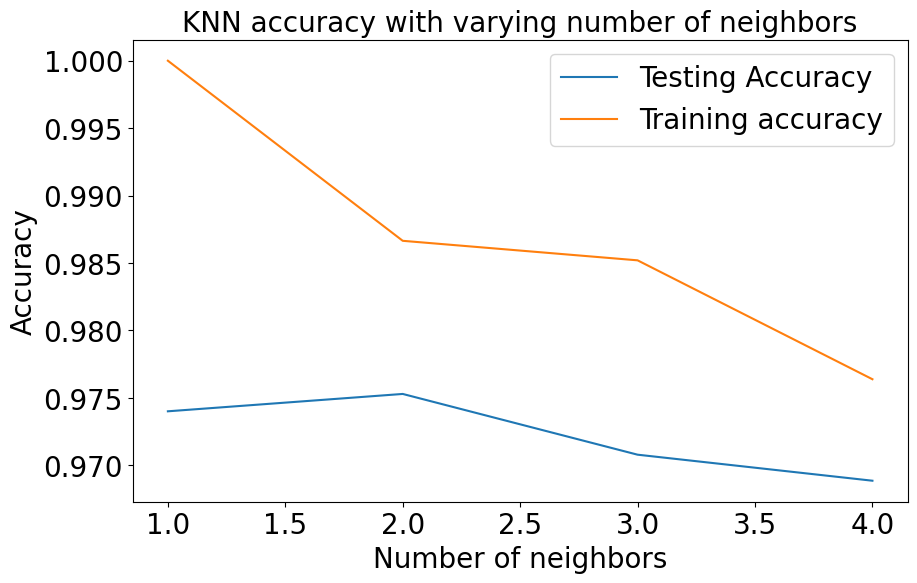

In [136]:
# Delcare the size of the array
plt.figure(figsize = (10, 6))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop = {'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [137]:
# Declare and initialise an object 'KNeighborsClassifier' with 3 neighbors
knn = KNeighborsClassifier(n_neighbors = 2)

# Fit the model
knn.fit(train_data, train_label)

# Compute accuracy on the training set
train_accuracy = knn.score(train_data, train_label)

# Compute accuracy on the test set
test_accuracy = knn.score(test_data, test_label)

/Users/somsteph/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

/Users/somsteph/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or Fa

In [138]:
# Display the test accuracy
print(test_accuracy)

0.9752927551151718


In [145]:
# One hot encode the categorical column
prod_enc = pd.get_dummies(product, columns=['Item'])

# Concatenate the one hot encoded column to the original DataFrame
df = pd.concat([product, prod_enc], axis=1)

prod_enc.drop(['Area', 'Unit', 'Flag Description', 'id', 'Origin'], axis=1, inplace=True)
prod_enc.head()

Element  Year  Value  Item_Butter of cow milk  \
0  Export Quantity  2012    0.0                        1   
1  Export Quantity  2013    0.0                        1   
2  Export Quantity  2014    0.0                        1   
3  Export Quantity  2015    0.0                        1   
4  Export Quantity  2016   32.0                        1   

   Item_Cheese from milk of sheep, fresh or processed  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   Item_Cheese from whole cow milk  Item_Cream, fresh  \
0                                0                  0   
1                                0                  0   
2                                0                  0   
3                                0                  0   
4                                0                  0   

   Item_Skim milk and whey powder  Item_Whole milk powder  \
0                               0                       0   
1                               0                       0   
2                               0                       0   
3                               0                       0   
4                               0                       0   

   Item_Whole milk, condensed  Item_Whole milk, evaporated  
0                           0                            0  
1                           0                            0  
2                           0                            0  
3                           0                            0  
4                           0                            0

In [183]:
X = prod_enc.iloc[:, [2, 3]].values
y = prod_enc.iloc[:, -1].values

In [184]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [185]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [186]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 5, random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [187]:
y_pred = classifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      9081
           1       1.00      0.00      0.00       877

    accuracy                           0.91      9958
   macro avg       0.96      0.50      0.48      9958
weighted avg       0.92      0.91      0.87      9958



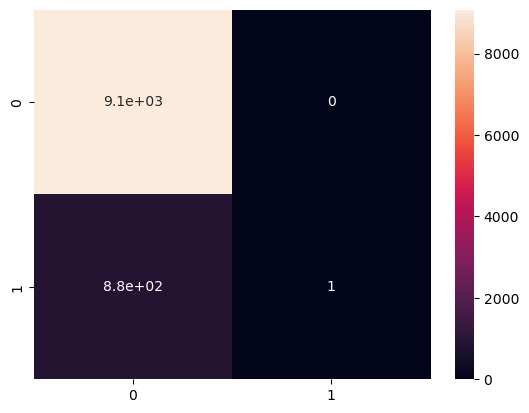

In [188]:
from sklearn.metrics import classification_report, confusion_matrix

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))

In [189]:
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9120305282185178


[Text(0.4583333333333333, 0.9166666666666666, 'X[1] <= 0.951\ngini = 0.162\nsamples = 29871\nvalue = [27212, 2659]'),
 Text(0.375, 0.75, 'X[0] <= -0.576\ngini = 0.189\nsamples = 25226\nvalue = [22567, 2659]'),
 Text(0.2916666666666667, 0.5833333333333334, 'gini = 0.257\nsamples = 3492\nvalue = [2963, 529]'),
 Text(0.4583333333333333, 0.5833333333333334, 'X[0] <= -0.57\ngini = 0.177\nsamples = 21734\nvalue = [19604, 2130]'),
 Text(0.25, 0.4166666666666667, 'X[0] <= -0.572\ngini = 0.208\nsamples = 3012\nvalue = [2656, 356]'),
 Text(0.16666666666666666, 0.25, 'X[0] <= -0.574\ngini = 0.2\nsamples = 2437\nvalue = [2163, 274]'),
 Text(0.08333333333333333, 0.08333333333333333, 'gini = 0.202\nsamples = 1600\nvalue = [1418, 182]'),
 Text(0.25, 0.08333333333333333, 'gini = 0.196\nsamples = 837\nvalue = [745, 92]'),
 Text(0.3333333333333333, 0.25, 'gini = 0.245\nsamples = 575\nvalue = [493, 82]'),
 Text(0.6666666666666666, 0.4166666666666667, 'X[0] <= 4.391\ngini = 0.172\nsamples = 18722\nvalue =

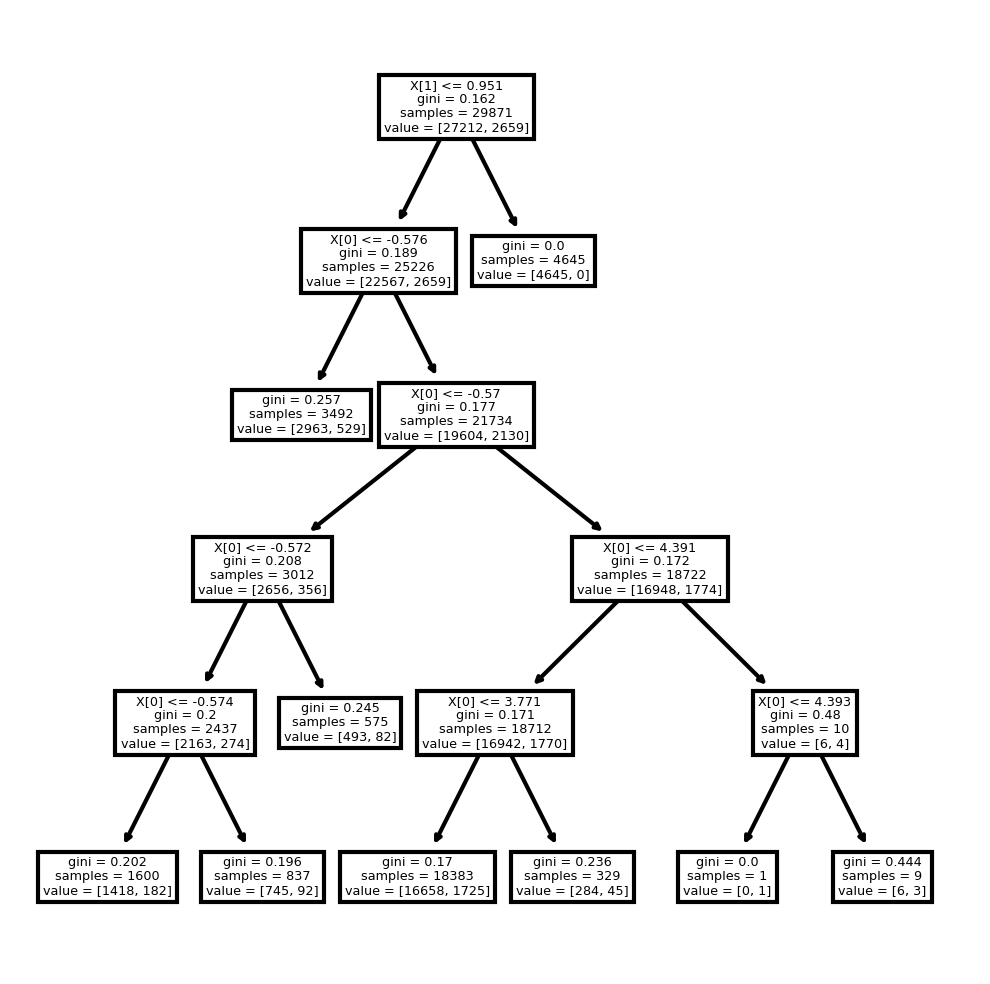

In [190]:
import matplotlib.pyplot as plt

plt.figure(figsize = (4,4), dpi=300)

from sklearn import tree

tree.plot_tree(classifier.fit(X_train, y_train)) 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


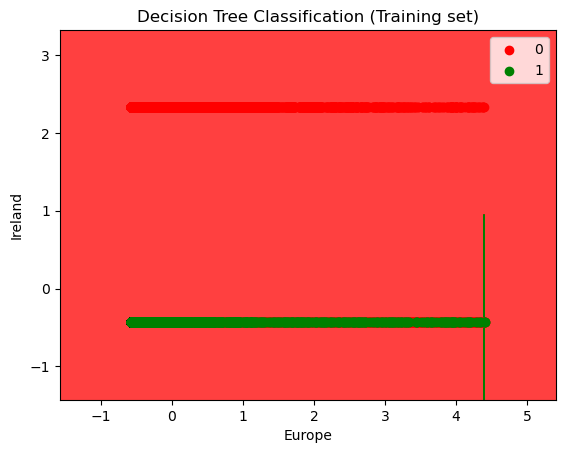

In [191]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Europe')
plt.ylabel('Ireland')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


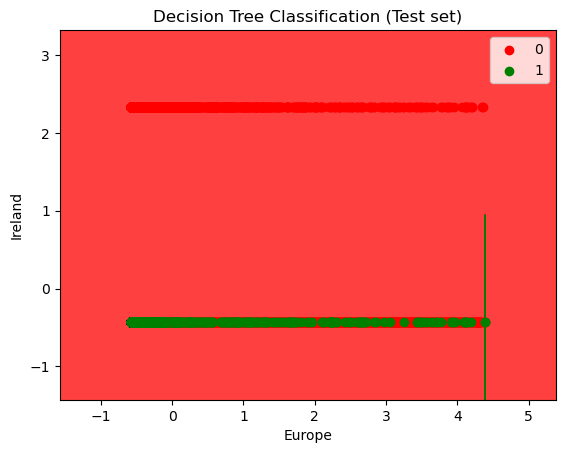

In [192]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Europe')
plt.ylabel('Ireland')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Element', ylabel='Item'>

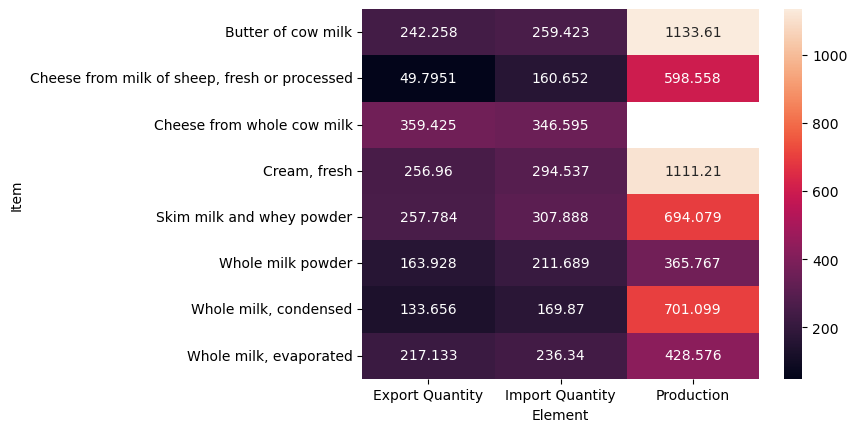

In [193]:
result_crosstab = pd.crosstab(index = product["Item"], 
                              columns=product["Element"], 
                              values = product["Value"], 
                              aggfunc=np.mean)
                              
sns.heatmap(result_crosstab, annot = True, fmt = 'g')

In [194]:
!pip install python-dotenv

In [195]:
from dotenv import dotenv_values

config = dotenv_values(".env")

In [196]:
!pip install requests

In [197]:
def get_text_processing(text):
    stpword = stopwords.words('english')
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

In [198]:
import requests
import json

In [199]:
bearer_token = "AAAAAAAAAAAAAAAAAAAAAKAllAEAAAAAFVWYkFjqgPPtg3jI5WrxFld9shk%3DjFdrHRwAVjXTmeFpFznF0KeYJQJUZGxAA1g4ejUiWpqbQpsCVf"

search_url = "https://api.twitter.com/2/tweets/search/recent"

query_params = {
    # Escaping the character \"
    'query' : "\" price\" milk\" dairy\" lang:en",
    'max_results' : '100',
    'tweet.fields': 'author_id',
    'user.fields': 'name'
}

def bearer_oauth(r):
    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2RecentSearchPython"
    return r

def connect_to_endpoint(url, params):
    response = requests.get(url, auth=bearer_oauth, params=params)
    return response.json()

json_response = connect_to_endpoint(search_url, query_params)

parsedRes = json.dumps(json_response, indent=4, ensure_ascii=False)
print(parsedRes)

{
    "data": [
        {
            "text": "@JPCastlin Cadbury Dairy Milk bars -&gt; NPD: Dairy Milk with __ (eg, Caramel) bars. \n- Same price for smaller bars / less expensive ingredients. \n-&gt; Increased penetration &amp; £AWP = incremental business (Rev &amp; Profit)",
            "id": "1613009485953368066",
            "author_id": "873164952047153152",
            "edit_history_tweet_ids": [
                "1613009485953368066"
            ]
        },
        {
            "text": "@RobertCawood2 Robert with all the rain the farmers have had I would imagine their having trouble supplying the processors with raw milk. There in lies the basis for a shortage, which results in price increases. Time to get your own dairy cow for the back yard, fresh dairy, law mowing in one.🤔",
            "id": "1612997792661934080",
            "author_id": "1536604343843291136",
            "edit_history_tweet_ids": [
                "1612997792661934080"
            ]
        },
        {


In [203]:
tweets = pd.read_csv('tweets.csv')

In [204]:
tweets['review'] = tweets['tweet'].apply(get_text_processing)
tweets.head()

Unnamed: 0                                              tweet  \
0           0  People out here complaining about the price of...   
1           1  @iamcardib Giiiirrrrrrrl.... here in Puerto Ri...   
2           2  @_princessdj I’m about to start selling feet p...   
3           3  @vuser888 @siomoCTV Very true. I was just goin...   
4           4  @ndavher @iamkoshiek Was telling a friend earl...   

                                              review  
0  People complaining price milk eggs cant pick d...  
1  iamcardib Giiiirrrrrrrl Puerto Rico price Gall...  
2  princessdj I’m start selling feet pics breast ...  
3  vuser888 siomoCTV true going say Vancouver 4 f...  
4  ndavher iamkoshiek telling friend earlier toda...

In [205]:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in tweets.review)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

NameError: name 'STOPWORDS' is not defined

In [206]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

tweets['Polarity'] = tweets['review'].apply(lambda x: getPolarity(x))

def TweetAnalysis(score):
    if score < 0:
        return'negative'
    elif score ==0:
        return 'neutral'
    else:
        return 'positive'
    
tweets['tsent'] = tweets['Polarity'].apply(TweetAnalysis)

#X = tweets['review']

#sentiment_ordering = ['negative', 'neutral', 'positive']

#y = y.apply(lambda x: sentiment_ordering.index(x))

In [207]:
tweets.head()

Unnamed: 0                                              tweet  \
0           0  People out here complaining about the price of...   
1           1  @iamcardib Giiiirrrrrrrl.... here in Puerto Ri...   
2           2  @_princessdj I’m about to start selling feet p...   
3           3  @vuser888 @siomoCTV Very true. I was just goin...   
4           4  @ndavher @iamkoshiek Was telling a friend earl...   

                                              review  Polarity     tsent  
0  People complaining price milk eggs cant pick d... -0.500000  negative  
1  iamcardib Giiiirrrrrrrl Puerto Rico price Gall...  0.000000   neutral  
2  princessdj I’m start selling feet pics breast ... -0.042857  negative  
3  vuser888 siomoCTV true going say Vancouver 4 f... -0.089062  negative  
4  ndavher iamkoshiek telling friend earlier toda... -0.066667  negative

In [208]:
tweets = tweets[['review', 'tsent']]
tweets.head()

review     tsent
0  People complaining price milk eggs cant pick d...  negative
1  iamcardib Giiiirrrrrrrl Puerto Rico price Gall...   neutral
2  princessdj I’m start selling feet pics breast ...  negative
3  vuser888 siomoCTV true going say Vancouver 4 f...  negative
4  ndavher iamkoshiek telling friend earlier toda...  negative

In [209]:
tweets.shape

(1940, 2)

<AxesSubplot:xlabel='tsent', ylabel='count'>

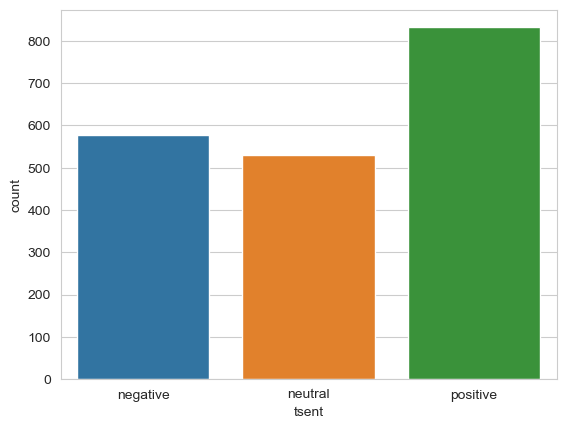

In [210]:
sns.set_style('whitegrid')
sns.countplot(x='tsent',data=tweets)

In [211]:
one_hot_tsent = pd.get_dummies(tweets["tsent"])
tweets.drop(['tsent'],axis=1,inplace=True)
dfoh = pd.concat([tweets,one_hot_tsent],axis=1)
dfoh.head()

review  negative  neutral  \
0  People complaining price milk eggs cant pick d...         1        0   
1  iamcardib Giiiirrrrrrrl Puerto Rico price Gall...         0        1   
2  princessdj I’m start selling feet pics breast ...         1        0   
3  vuser888 siomoCTV true going say Vancouver 4 f...         1        0   
4  ndavher iamkoshiek telling friend earlier toda...         1        0   

   positive  
0         0  
1         0  
2         0  
3         0  
4         0

In [212]:
X = dfoh['review'].values
y = dfoh.drop('review', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [213]:
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [214]:
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

In [1]:
model = Sequential()

model.add(Dense(units=12673,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=4000,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=500,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=3, activation='softmax'))

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

NameError: name 'Sequential' is not defined

In [ ]:
model.fit(x=X_train, y=y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1)

In [ ]:
df = df[['review', 'Polarity_Rating']]
df.head()

In [ ]:
tweets = tweets.drop(['Unnamed: 0'], axis=1)
tweets.dropna(inplace=True)